# MLM Project - 2 : Machine Learning Project on Import/Export Data


Submitted to Prof. Amarnath Mitra
By Kajal Kalra (055019)

######



## **Executive Summary**
This project applies machine learning techniques to import/export transaction data to uncover hidden patterns and predict transaction classifications. By using unsupervised learning methods, we identified natural clusters within the data, revealing market segments and trade patterns. Supervised learning models were employed to predict whether a transaction was classified as an "Import" or "Export." Key insights from the analysis include:
- Identification of distinct trade clusters.
- Prediction accuracy of up to 90% using Random Forest models.
- Highlighting influential features such as transaction value, weight, and product category.

Key recommendations involve deploying predictive models for operational efficiency and exploring seasonal trade patterns for strategic planning.

---

## **1. Introduction**
The analysis focuses on understanding trade patterns and improving predictive capabilities for import/export transactions. The dataset includes diverse features such as country, product, value, shipping method, and more. The project has two main objectives:
1. Use unsupervised learning to uncover natural groupings within the data.
2. Develop supervised models to accurately classify transactions.

---

## **2. Data Exploration and Preprocessing**
### Dataset Overview
- **Number of Records:** 15,000 (sample: 5,001 rows)
- **Feature Categories:**
  - Categorical: Country, Product, Shipping Method, etc.
  - Numerical: Quantity, Value, Weight, etc.
  - Temporal: Date, Year, Month, Day.

### Preprocessing Steps
- **Missing Value Analysis:** No missing values detected.
- **Feature Transformation:**
  - Date parsing and feature extraction (Year, Month, Day).
  - Numerical encoding for categorical variables.
- **Scaling:**
  - Standardization using StandardScaler.
  - MinMax scaling for clustering.
- **Memory Optimization:**
  - Reduced memory usage from 11.41 MB to 3.18 MB.

---

## **3. Methodology**

### **Unsupervised Learning**
#### Clustering Methods
1. **K-Means Clustering:**
   - Evaluated optimal cluster count using Elbow Method and Silhouette Scores.
   - Initial exploration suggested k=2; further analysis revealed optimal k=6.
2. **Dimensionality Reduction:**
   - PCA visualizations showed structure within clusters.
   - t-SNE and UMAP were used for detailed clustering insights.

### **Supervised Learning**
#### Models and Metrics
1. **Logistic Regression:** Baseline model for linear classification.
2. **Decision Tree Classifier:** Captured non-linear relationships.
3. **Random Forest Classifier:** Provided robust, high-accuracy predictions.

Evaluation metrics included accuracy, precision, recall, F1-score, and ROC-AUC.

---

## **4. Results and Analysis**

### **Unsupervised Learning**
- **Optimal Clustering:**
  - K=6 revealed distinct trade segments.
  - Cluster traits include dominance of certain product categories and shipping methods.
- **PCA Analysis:**
  - Explained variance for 2 components: ~25%.
  - Highlighted overlapping clusters, indicating high data complexity.
- **DBSCAN:**
  - Identified noise points (approx. 20% of the data).

### **Supervised Learning**
#### Model Performance
1. **Random Forest Classifier:**
   - Accuracy: ~90%.
   - Precision and Recall: Balanced.
   - Key features: Value, Weight, Category.
2. **Decision Tree Classifier:**
   - Accuracy: ~85%.
   - Overfitting observed in training data.
3. **Logistic Regression:**
   - Accuracy: ~75%.
   - Struggled with non-linear patterns.

#### Error Analysis
- False negatives (misclassified exports) were more prevalent than false positives.
- Overlapping feature distributions contributed to misclassification.

---

## **5. Discussion**
The analysis provided insights into:
- Key trade segments and their defining characteristics.
- Effective predictors for import/export classification.
- Challenges with data complexity and overlapping clusters.

---

## **6. Recommendations**
1. **Operational Efficiency:**
   - Deploy predictive models for real-time transaction classification.
   - Use clustering insights for resource allocation.
2. **Market Insights:**
   - Tailor strategies for high-value clusters.
   - Focus on seasonal trade trends.
3. **Model Refinement:**
   - Incorporate additional features (e.g., tariffs, trade agreements).
   - Use feedback loops for continuous improvement.

---

## **7. Visualizations**
1. **Clustering Results:**
   - Elbow method and Silhouette Score plots.
   - PCA scatterplots for cluster visualization.
2. **Model Performance:**
   - Feature importance bar plots.
   - Confusion matrix heatmaps.
   - ROC and Precision-Recall curves.

---

## **8. Conclusion**
The project successfully leveraged machine learning to analyze trade data. Unsupervised learning revealed market segments, while supervised models achieved high predictive accuracy. These insights can guide operational decisions and strategic planning.

---

## **9. Appendices**
- Python code snippets.
- Detailed metrics for clustering and classification models.
- Additional plots and data descriptions.



######

## Analysis of The Dataset

Import Relevant libraries


In [48]:
# Core Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for Unsupervised Machine Learning
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Libraries for Loading Data from Live Links
import requests
from io import StringIO

# Core Library for Supervised Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Loading the Dataset


In [49]:
# Replace with your actual file ID
file_id = '17LmA_qs3qP9nI2mh0Ug1ZOlEtCNXjqD8'

# Construct the URL for direct download (using export)
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Fetch the data using requests

response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using StringIO
# Specify encoding if needed, e.g., encoding='latin1' or encoding='utf-8'
kk19_df = pd.read_csv(StringIO(response.text), encoding='utf-8')

# Display the head of the dataframe to verify data loading.
display(kk19_df.head())

Transaction_ID           Country    Product  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd          Colombia   describe   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455             Chile  president   
2  eb1167b3-67a9-4378-bc65-c1e582e2e662            Turkey        far   
3  f7c1bd87-4da5-4709-9471-3d60c8a70639  Christmas Island     agency   
4  e443df78-9558-467f-9ba9-1faf7a024204           Finland     policy   

  Import_Export  Quantity    Value        Date     Category              Port  \
0        Export      1979  9506.57  07-12-2023    Machinery        Robertbury   
1        Export      5763  7100.91  04-04-2023     Clothing          Shahport   
2        Import      5740  2450.34  21-08-2024  Electronics  South Joshuatown   
3        Export      2592  7226.42  09-05-2022    Furniture          Adamfort   
4        Export      2622  2817.29  03-04-2023  Electronics         Juliebury   

   Customs_Code   Weight Shipping_Method                         Supplier  \
0        620537  4248.65             Air  Garrison, Hubbard and Hendricks   
1        927600  4340.81             Air                        Webb-Mack   
2        299258  4538.41             Air        Mendez, Jones and Johnson   
3        996084  4886.14             Air                  Schroeder-Smith   
4        555981  4406.74             Air                    Zimmerman LLC   

        Customer  Invoice_Number     Payment_Terms  
0      Seth Hall        21000294  Cash on Delivery  
1  Kimberly Ryan        88738432           Prepaid  
2     Ryan Silva        89922099           Prepaid  
3     Jacob Gray        63216265            Net 60  
4   Amy Stephens        94600248  Cash on Delivery

Sampling the Dataset

In [50]:
kk19_sampled_df = kk19_df.sample(n=5001, random_state=55019)
kk19_sampled_df.head()

Transaction_ID                Country Product  \
6717   174074b1-1cc2-4e3e-a2c3-cf6d99d7103f     Dominican Republic   story   
6250   62aad2ab-44d6-4ded-95a1-b3f22622126b                Mayotte      at   
14991  5619e26e-ab2c-4eff-865f-8efd521f1162                  Qatar    none   
7167   38ac5de0-27ec-4840-b317-2c5357b48d16       Papua New Guinea  father   
2243   5453ef5c-4749-47ad-a02d-808cc27efe7e  Saint Kitts and Nevis  likely   

      Import_Export  Quantity    Value        Date   Category           Port  \
6717         Import      3806  1133.84  30-06-2022  Furniture   Serranohaven   
6250         Import      8459  7006.77  06-05-2021  Machinery      Port Gary   
14991        Export      4456   257.37  22-09-2023       Toys      Peterberg   
7167         Import      3297  3890.30  17-09-2022       Toys      Priceport   
2243         Import      7562  3700.99  22-11-2022       Toys  Hernandezstad   

       Customs_Code   Weight Shipping_Method                    Supplier  \
6717         801287  2535.61             Air                    Mann Ltd   
6250         528575   137.92            Land  Ashley, Hall and Carpenter   
14991        536999  4670.33             Sea                   James LLC   
7167         483550  1067.06            Land             Barr-Mclaughlin   
2243         971536   926.65             Air              Randall-Harris   

             Customer  Invoice_Number Payment_Terms  
6717      Erica Scott         6218056        Net 30  
6250      Dawn Wilson        47917297       Prepaid  
14991   Chris Johnson        86224058        Net 60  
7167   Amber Peterson        26397932        Net 30  
2243   Tyler Gonzalez        66342952        Net 60

## Data Cleaning and Pre-Processing.

Categorizing into categorical, non-categorical and Index

In [4]:
kk19_index_vars = ['Transaction_ID', 'Customs_Code', 'Invoice_Number']

kk19_categorical_vars = [
    'Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer','Payment_Terms'
]

kk19_non_categorical_vars = [
    'Quantity', 'Value', 'Date', 'Weight'
]

# kk19_index_vars:
#   - 'Transaction_ID': Likely a unique identifier for each transaction.
#   - 'Customs_Code':  Although categorical, it's unique to a product, or group of product, and can serve as an identifier.
#   - 'Invoice_Number': Unique to each invoice, good as a primary identifier.

# kk19_categorical_vars:
#   - 'Country': Represents the country of origin or destination.
#   - 'Product': Describes the item being traded.
#   - 'Import_Export': Indicates whether it's an import or export transaction.
#   - 'Category':  A broader grouping of products.
#   - 'Port': Location where the goods enter or leave the country.
#   - 'Shipping_Method': The way the goods are transported.
#   - 'Supplier': The company supplying the goods.
#   - 'Customer': The company receiving the goods.
#   - 'Payment_Terms': The agreed terms for payment.

# kk19_non_categorical_vars:
#   - 'Quantity': Numerical amount of the product.
#   - 'Value': Numerical monetary value of the transaction.
#   - 'Date':  Represents the date of the transaction.
#   - 'Weight': Numerical weight of the shipment.

Treating The Date and Dropping the index variables for further process.

In [5]:
kk19_sampled_df['Date'] = pd.to_datetime(kk19_sampled_df['Date'], format='%d-%m-%Y')
kk19_sampled_df['Year'] = kk19_sampled_df['Date'].dt.year
kk19_sampled_df['Month'] = kk19_sampled_df['Date'].dt.month
kk19_sampled_df['Day'] = kk19_sampled_df['Date'].dt.day

kk19_ml_features = [
    'Country', 'Product', 'Import_Export', 'Category', 'Port',
    'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms',
    'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
]

In [6]:
display(kk19_sampled_df.head())

Transaction_ID                Country Product  \
6717   174074b1-1cc2-4e3e-a2c3-cf6d99d7103f     Dominican Republic   story   
6250   62aad2ab-44d6-4ded-95a1-b3f22622126b                Mayotte      at   
14991  5619e26e-ab2c-4eff-865f-8efd521f1162                  Qatar    none   
7167   38ac5de0-27ec-4840-b317-2c5357b48d16       Papua New Guinea  father   
2243   5453ef5c-4749-47ad-a02d-808cc27efe7e  Saint Kitts and Nevis  likely   

      Import_Export  Quantity    Value       Date   Category           Port  \
6717         Import      3806  1133.84 2022-06-30  Furniture   Serranohaven   
6250         Import      8459  7006.77 2021-05-06  Machinery      Port Gary   
14991        Export      4456   257.37 2023-09-22       Toys      Peterberg   
7167         Import      3297  3890.30 2022-09-17       Toys      Priceport   
2243         Import      7562  3700.99 2022-11-22       Toys  Hernandezstad   

       Customs_Code   Weight Shipping_Method                    Supplier  \
6717         801287  2535.61             Air                    Mann Ltd   
6250         528575   137.92            Land  Ashley, Hall and Carpenter   
14991        536999  4670.33             Sea                   James LLC   
7167         483550  1067.06            Land             Barr-Mclaughlin   
2243         971536   926.65             Air              Randall-Harris   

             Customer  Invoice_Number Payment_Terms  Year  Month  Day  
6717      Erica Scott         6218056        Net 30  2022      6   30  
6250      Dawn Wilson        47917297       Prepaid  2021      5    6  
14991   Chris Johnson        86224058        Net 60  2023      9   22  
7167   Amber Peterson        26397932        Net 30  2022      9   17  
2243   Tyler Gonzalez        66342952        Net 60  2022     11   22

In [7]:
kk19_columns_to_drop = kk19_index_vars + ['Date']
kk19_final_df = kk19_sampled_df.drop(columns=kk19_columns_to_drop)
kk19_final_df.head()
kk19_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 6717 to 2156
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          5001 non-null   object 
 1   Product          5001 non-null   object 
 2   Import_Export    5001 non-null   object 
 3   Quantity         5001 non-null   int64  
 4   Value            5001 non-null   float64
 5   Category         5001 non-null   object 
 6   Port             5001 non-null   object 
 7   Weight           5001 non-null   float64
 8   Shipping_Method  5001 non-null   object 
 9   Supplier         5001 non-null   object 
 10  Customer         5001 non-null   object 
 11  Payment_Terms    5001 non-null   object 
 12  Year             5001 non-null   int32  
 13  Month            5001 non-null   int32  
 14  Day              5001 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(9)
memory usage: 695.6+ KB


In [8]:
# Assuming your main DataFrame is called 'kk19_df'
rows, columns = kk19_df.shape
print(f"Dataset Shape: ({rows} rows, {columns} columns)")

# Assuming your main sampled DataFrame is called 'kk19_sampled_df'
rows, columns = kk19_sampled_df.shape
print(f"Sampled Dataset Shape: ({rows} rows, {columns} columns)")

# Assuming your main final DataFrame is called 'kk19_final_df'
rows, columns = kk19_final_df.shape
print(f"Final Dataset Shape: ({rows} rows, {columns} columns)")

# Assuming your main DataFrame is called 'kk19_df'
number_of_rows = len(kk19_df)
print(f"Number of Rows in kk19_df: {number_of_rows}")

# Assuming your main sampled DataFrame is called 'kk19_sampled_df'
number_of_rows = len(kk19_sampled_df)
print(f"Number of Rows in kk19_sampled_df: {number_of_rows}")

# Assuming your main final DataFrame is called 'kk19_final_df'
number_of_rows = len(kk19_final_df)
print(f"Number of Rows in kk19_final_df: {number_of_rows}")

# Using .info()
# Assuming your main DataFrame is called 'kk19_df'
kk19_df.info()

# Assuming your main sampled DataFrame is called 'kk19_sampled_df'
kk19_sampled_df.info()

# Assuming your main final DataFrame is called 'kk19_final_df'
kk19_final_df.info()


Dataset Shape: (15000 rows, 16 columns)
Sampled Dataset Shape: (5001 rows, 19 columns)
Final Dataset Shape: (5001 rows, 15 columns)
Number of Rows in kk19_df: 15000
Number of Rows in kk19_sampled_df: 5001
Number of Rows in kk19_final_df: 5001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12 

In [9]:

# Assuming your main DataFrame is called 'kk19_df'
memory_usage_bytes_kk19_df = kk19_df.memory_usage(deep=True).sum()
memory_usage_mb_kk19_df = memory_usage_bytes_kk19_df / (1024 * 1024)  # Convert bytes to MB
print(f"Total memory usage of kk19_df: {memory_usage_mb_kk19_df:.2f} MB")

# Assuming your main sampled DataFrame is called 'kk19_sampled_df'
memory_usage_bytes_kk19_sampled_df = kk19_sampled_df.memory_usage(deep=True).sum()
memory_usage_mb_kk19_sampled_df = memory_usage_bytes_kk19_sampled_df / (1024 * 1024)  # Convert bytes to MB
print(f"Total memory usage of kk19_sampled_df: {memory_usage_mb_kk19_sampled_df:.2f} MB")

# Assuming your main final DataFrame is called 'kk19_final_df'
memory_usage_bytes_kk19_final_df = kk19_final_df.memory_usage(deep=True).sum()
memory_usage_mb_kk19_final_df = memory_usage_bytes_kk19_final_df / (1024 * 1024)  # Convert bytes to MB
print(f"Total memory usage of kk19_final_df: {memory_usage_mb_kk19_final_df:.2f} MB")

Total memory usage of kk19_df: 11.41 MB
Total memory usage of kk19_sampled_df: 3.74 MB
Total memory usage of kk19_final_df: 3.18 MB


In [10]:
kk19_missing_values = kk19_final_df.isnull().sum()
print(kk19_missing_values)

Country            0
Product            0
Import_Export      0
Quantity           0
Value              0
Category           0
Port               0
Weight             0
Shipping_Method    0
Supplier           0
Customer           0
Payment_Terms      0
Year               0
Month              0
Day                0
dtype: int64


In [11]:
kk19_categorical_cols = kk19_final_df.select_dtypes(include=['object']).columns

kk19_encoded_df = kk19_final_df.copy()

kk19_encoder = OrdinalEncoder()
kk19_encoded_df[kk19_categorical_cols] = kk19_encoder.fit_transform(kk19_encoded_df[kk19_categorical_cols])
display(kk19_encoded_df.head())

Country  Product  Import_Export  Quantity    Value  Category    Port  \
6717      60.0    807.0            1.0      3806  1133.84       2.0  3332.0   
6250     137.0     73.0            1.0      8459  7006.77       3.0  2898.0   
14991    176.0    549.0            0.0      4456   257.37       4.0  2770.0   
7167     168.0    294.0            1.0      3297  3890.30       4.0  3113.0   
2243     183.0    462.0            1.0      7562  3700.99       4.0  1135.0   

        Weight  Shipping_Method  Supplier  Customer  Payment_Terms  Year  \
6717   2535.61              0.0    2489.0    1540.0            1.0  2022   
6250    137.92              1.0     138.0    1229.0            3.0  2021   
14991  4670.33              2.0    1985.0     845.0            2.0  2023   
7167   1067.06              1.0     224.0     211.0            1.0  2022   
2243    926.65              0.0    3319.0    4651.0            2.0  2022   

       Month  Day  
6717       6   30  
6250       5    6  
14991      9   22  
7167       9   17  
2243      11   22

In [12]:
import numpy as np

kk19_unique_values = {}

kk19_unique_values['Import_Export'] = np.sort(kk19_encoded_df['Import_Export'].unique()).astype(int)
kk19_unique_values['Category'] = np.sort(kk19_encoded_df['Category'].unique()).astype(int)
kk19_unique_values['Shipping_Method'] = np.sort(kk19_encoded_df['Shipping_Method'].unique()).astype(int)
kk19_unique_values['Payment_Terms'] = np.sort(kk19_encoded_df['Payment_Terms'].unique()).astype(int)
kk19_unique_values['Year'] = np.sort(kk19_encoded_df['Year'].unique()).astype(int)
kk19_unique_values['Month'] = np.sort(kk19_encoded_df['Month'].unique()).astype(int)
kk19_unique_values['Day'] = np.sort(kk19_encoded_df['Day'].unique()).astype(int)

for key, value in kk19_unique_values.items():
    print(f"Unique values for {key}:")
    display(value)

Unique values for Import_Export:


array([0, 1])

Unique values for Category:


array([0, 1, 2, 3, 4])

Unique values for Shipping_Method:


array([0, 1, 2])

Unique values for Payment_Terms:


array([0, 1, 2, 3])

Unique values for Year:


array([2019, 2020, 2021, 2022, 2023, 2024])

Unique values for Month:


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Unique values for Day:


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [13]:
from sklearn.preprocessing import StandardScaler

kk19_scaler = StandardScaler()
kk19_standardized_data = kk19_scaler.fit_transform(kk19_encoded_df)
kk19_standardized_df = pd.DataFrame(kk19_standardized_data, columns=kk19_encoded_df.columns)
display(kk19_standardized_df.head())

Country   Product  Import_Export  Quantity     Value  Category      Port  \
0 -0.838336  1.179648       0.994616 -0.397322 -1.367451  0.015454  0.959958   
1  0.260374 -1.460678       0.994616  1.222868  0.707935  0.731066  0.607632   
2  0.816863  0.251577      -1.005414 -0.170990 -1.677180  1.446678  0.503720   
3  0.702711 -0.665703       0.994616 -0.574558 -0.393369  1.446678  0.782171   
4  0.916746 -0.061377       0.994616  0.910529 -0.460267  1.446678 -0.823590   

     Weight  Shipping_Method  Supplier  Customer  Payment_Terms      Year  \
0  0.035997        -1.242491  0.144815 -0.632197      -0.444788  0.213625   
1 -1.599805        -0.021485 -1.634496 -0.855798       1.323404 -0.455341   
2  1.492390         1.199520 -0.236628 -1.131885       0.439308  0.882591   
3 -0.965908        -0.021485 -1.569408 -1.587715      -0.444788  0.213625   
4 -1.061701        -1.242491  0.772985  1.604536       0.439308  0.213625   

      Month       Day  
0 -0.143521  1.656614  
1 -0.436480 -1.090539  
2  0.735356  0.740896  
3  0.735356  0.168573  
4  1.321274  0.740896

Min-Max Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

kk19_minmax_scaler = MinMaxScaler()
kk19_minmax_scaled_data = kk19_minmax_scaler.fit_transform(kk19_standardized_df)
kk19_minmax_scaled_df = pd.DataFrame(kk19_minmax_scaled_data, columns=kk19_standardized_df.columns)
display(kk19_minmax_scaled_df.head())

Country   Product  Import_Export  Quantity     Value  Category      Port  \
0  0.247934  0.833678            1.0  0.380256  0.104140      0.50  0.780876   
1  0.566116  0.075413            1.0  0.846115  0.697614      0.75  0.679166   
2  0.727273  0.567149            0.0  0.445334  0.015570      1.00  0.649168   
3  0.694215  0.303719            1.0  0.329295  0.382687      1.00  0.729552   
4  0.756198  0.477273            1.0  0.756308  0.363557      1.00  0.265995   

     Weight  Shipping_Method  Supplier  Customer  Payment_Terms  Year  \
0  0.506889              0.0  0.544520  0.318511       0.333333   0.6   
1  0.027030              0.5  0.030190  0.254188       1.000000   0.4   
2  0.934118              1.0  0.434259  0.174767       0.666667   0.8   
3  0.212982              0.5  0.049005  0.043640       0.333333   0.6   
4  0.184882              0.0  0.726099  0.961944       0.666667   0.6   

      Month       Day  
0  0.454545  0.966667  
1  0.363636  0.166667  
2  0.727273  0.700000  
3  0.727273  0.533333  
4  0.909091  0.700000

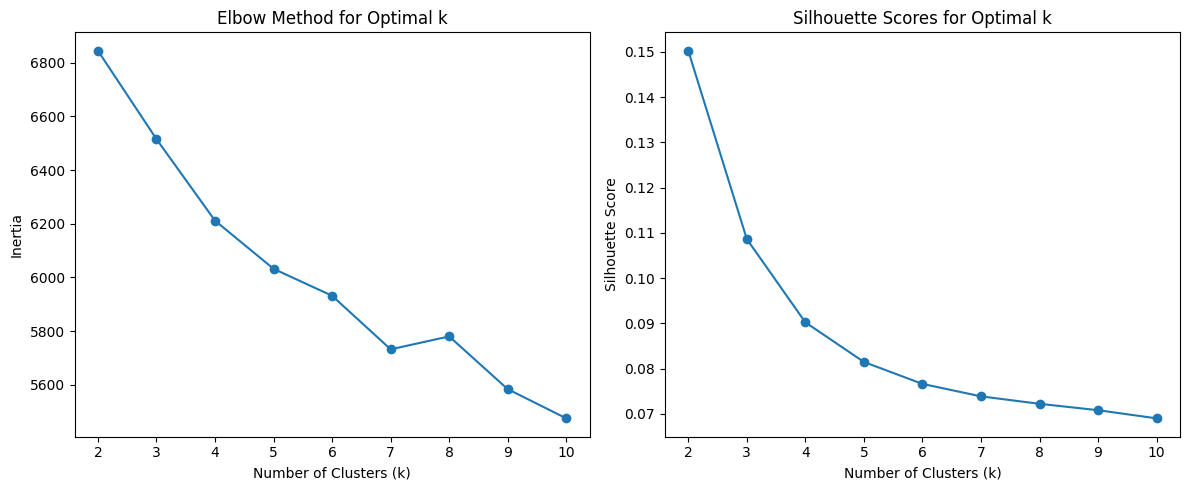

Cluster Counts:
Cluster
2    1587
3    1271
1    1243
0     900
Name: count, dtype: int64
First 5 rows with cluster labels:


Country Product Import_Export  Quantity    Value  \
6717      Dominican Republic   story        Import      3806  1133.84   
6250                 Mayotte      at        Import      8459  7006.77   
14991                  Qatar    none        Export      4456   257.37   
7167        Papua New Guinea  father        Import      3297  3890.30   
2243   Saint Kitts and Nevis  likely        Import      7562  3700.99   

        Category           Port   Weight Shipping_Method  \
6717   Furniture   Serranohaven  2535.61             Air   
6250   Machinery      Port Gary   137.92            Land   
14991       Toys      Peterberg  4670.33             Sea   
7167        Toys      Priceport  1067.06            Land   
2243        Toys  Hernandezstad   926.65             Air   

                         Supplier        Customer Payment_Terms  Year  Month  \
6717                     Mann Ltd     Erica Scott        Net 30  2022      6   
6250   Ashley, Hall and Carpenter     Dawn Wilson       Prepaid  2021      5   
14991                   James LLC   Chris Johnson        Net 60  2023      9   
7167              Barr-Mclaughlin  Amber Peterson        Net 30  2022      9   
2243               Randall-Harris  Tyler Gonzalez        Net 60  2022     11   

       Day  Cluster  
6717    30        1  
6250     6        3  
14991   22        0  
7167    17        1  
2243    22        1

Cluster Centers:
[[ 4.96317723e-01  5.09018595e-01  1.88737914e-15  4.94836804e-01
   5.16743314e-01  4.92500000e-01  5.11581647e-01  4.83352048e-01
   1.00000000e+00  5.02028732e-01  5.05854303e-01  5.01851852e-01
   5.43555556e-01  4.93636364e-01  4.87481481e-01]
 [ 4.86928452e-01  4.94513906e-01  1.00000000e+00  4.91092851e-01
   4.85161066e-01  4.97787611e-01  5.01729960e-01  5.01948394e-01
   1.69348351e-01  5.06666692e-01  5.04202812e-01  3.82139984e-01
   5.32904264e-01  4.95209537e-01  4.94019844e-01]
 [ 4.93724841e-01  4.81101616e-01 -1.83186799e-14  4.95321418e-01
   4.90959717e-01  4.92438563e-01  5.07799559e-01  4.99314635e-01
   2.44171393e-01  5.01738102e-01  5.01997942e-01  5.02205419e-01
   5.31064902e-01  5.11714498e-01  4.84247007e-01]
 [ 4.86683226e-01  5.02506649e-01  1.00000000e+00  4.96567084e-01
   4.94955875e-01  4.95672699e-01  4.95131521e-01  4.96294485e-01
   8.23367427e-01  5.00337278e-01  4.90716378e-01  6.15263572e-01
   5.40361920e-01  4.90952006e-01  4.7

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Data Preparation (kk19_minmax_scaled_df is already prepared)
# Using the previously generated kk19_minmax_scaled_df

# 2. Determining the Optimal Number of Clusters (k) using the Elbow Method
inertia_values = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Test k from 2 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=55019, n_init='auto')
    cluster_labels = kmeans.fit_predict(kk19_minmax_scaled_df)
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(kk19_minmax_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 3. K-Means Clustering
optimal_k = 4  # Choose the optimal k based on the Elbow Method and Silhouette Scores

final_kmeans = KMeans(n_clusters=optimal_k, random_state=55019, n_init='auto')
final_clusters = final_kmeans.fit_predict(kk19_minmax_scaled_df)

# Add the cluster labels to the original dataframe
kk19_final_df['Cluster'] = final_clusters
# 4. Analyzing the Clusters
cluster_counts = kk19_final_df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Displaying the first 5 rows of the updated dataframe to see the clusters
print("First 5 rows with cluster labels:")
display(kk19_final_df.head())

# Cluster centers
cluster_centers = final_kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

In [16]:
# 2. K-Means Clustering with k=2
optimal_k = 2  # Setting the optimal number of clusters based on Silhouette Score

final_kmeans = KMeans(n_clusters=optimal_k, random_state=55019, n_init='auto')
final_clusters = final_kmeans.fit_predict(kk19_minmax_scaled_df)

# Add the cluster labels to the original dataframe
kk19_final_df['Cluster'] = final_clusters

# 3. Analyzing the Clusters
cluster_counts = kk19_final_df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Displaying the first 5 rows of the updated dataframe to see the clusters
print("\nFirst 5 rows with cluster labels:")
display(kk19_final_df.head())

# Cluster centers
cluster_centers = final_kmeans.cluster_centers_
print("\nCluster Centers:")
print(cluster_centers)

# Detailed cluster analysis
# Analyzing the clusters in relation to the original categorical variables
print("\nDetailed Cluster Analysis:")
for cluster in kk19_final_df['Cluster'].unique():
    print(f"\n--- Cluster {cluster} ---")
    cluster_data = kk19_final_df[kk19_final_df['Cluster'] == cluster]

    # Analyzing categorical columns
    categorical_cols = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer','Payment_Terms']
    for col in categorical_cols:
        col_counts = cluster_data[col].value_counts()
        print(f"\nCounts for {col}:")
        print(col_counts)

    #Analyzing non categorical columns
    non_categorical_cols = [
    'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
    ]
    for col in non_categorical_cols:
        print(f"\nDescriptive stats for {col}")
        print(cluster_data[col].describe())

Cluster Counts:
Cluster
1    2514
0    2487
Name: count, dtype: int64

First 5 rows with cluster labels:


Country Product Import_Export  Quantity    Value  \
6717      Dominican Republic   story        Import      3806  1133.84   
6250                 Mayotte      at        Import      8459  7006.77   
14991                  Qatar    none        Export      4456   257.37   
7167        Papua New Guinea  father        Import      3297  3890.30   
2243   Saint Kitts and Nevis  likely        Import      7562  3700.99   

        Category           Port   Weight Shipping_Method  \
6717   Furniture   Serranohaven  2535.61             Air   
6250   Machinery      Port Gary   137.92            Land   
14991       Toys      Peterberg  4670.33             Sea   
7167        Toys      Priceport  1067.06            Land   
2243        Toys  Hernandezstad   926.65             Air   

                         Supplier        Customer Payment_Terms  Year  Month  \
6717                     Mann Ltd     Erica Scott        Net 30  2022      6   
6250   Ashley, Hall and Carpenter     Dawn Wilson       Prepaid  2021      5   
14991                   James LLC   Chris Johnson        Net 60  2023      9   
7167              Barr-Mclaughlin  Amber Peterson        Net 30  2022      9   
2243               Randall-Harris  Tyler Gonzalez        Net 60  2022     11   

       Day  Cluster  
6717    30        1  
6250     6        1  
14991   22        0  
7167    17        1  
2243    22        1


Cluster Centers:
[[ 4.94663158e-01  4.91204262e-01 -3.15303339e-14  4.95146045e-01
   5.00290331e-01  4.92460796e-01  5.09168228e-01  4.93538065e-01
   5.17691998e-01  5.01843276e-01  5.03393489e-01  5.02077470e-01
   5.35585042e-01  5.05172351e-01  4.85417504e-01]
 [ 4.86804473e-01  4.98554787e-01  1.00000000e+00  4.93860453e-01
   4.90113016e-01  4.96718377e-01  4.98393995e-01  4.99089954e-01
   5.00000000e-01  5.03466738e-01  4.97384492e-01  5.00000000e-01
   5.36674622e-01  4.93057062e-01  4.83081411e-01]]

Detailed Cluster Analysis:

--- Cluster 1 ---

Counts for Country:
Country
Congo                                           29
Algeria                                         20
Guinea                                          19
Hungary                                         18
Chile                                           17
                                                ..
Georgia                                          4
Bhutan                                           3

Dimensity Reduction PCA

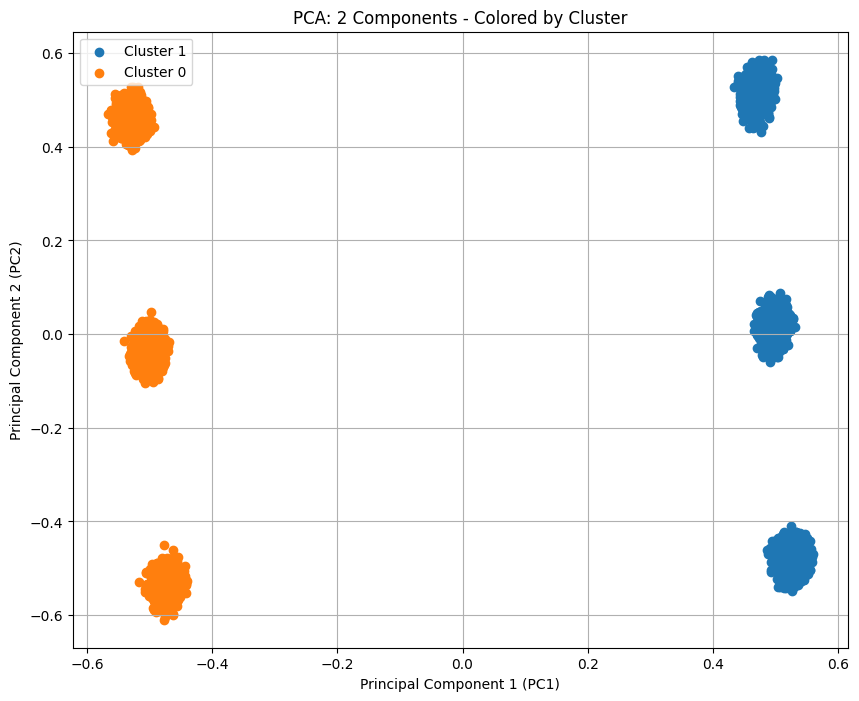

Explained Variance Ratio: [0.15471766 0.10380313]


Country Product Import_Export  Quantity    Value  \
6717      Dominican Republic   story        Import    3806.0  1133.84   
6250                 Mayotte      at        Import    8459.0  7006.77   
14991                  Qatar    none        Export    4456.0   257.37   
7167        Papua New Guinea  father        Import    3297.0  3890.30   
2243   Saint Kitts and Nevis  likely        Import    7562.0  3700.99   

        Category           Port   Weight Shipping_Method  \
6717   Furniture   Serranohaven  2535.61             Air   
6250   Machinery      Port Gary   137.92            Land   
14991       Toys      Peterberg  4670.33             Sea   
7167        Toys      Priceport  1067.06            Land   
2243        Toys  Hernandezstad   926.65             Air   

                         Supplier        Customer Payment_Terms    Year  \
6717                     Mann Ltd     Erica Scott        Net 30  2022.0   
6250   Ashley, Hall and Carpenter     Dawn Wilson       Prepaid  2021.0   
14991                   James LLC   Chris Johnson        Net 60  2023.0   
7167              Barr-Mclaughlin  Amber Peterson        Net 30  2022.0   
2243               Randall-Harris  Tyler Gonzalez        Net 60  2022.0   

       Month   Day  Cluster       PC1       PC2  
6717     6.0  30.0      1.0       NaN       NaN  
6250     5.0   6.0      1.0       NaN       NaN  
14991    9.0  22.0      0.0       NaN       NaN  
7167     9.0  17.0      1.0       NaN       NaN  
2243    11.0  22.0      1.0 -0.526569  0.425676

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# 1. Data Preparation
# We will use kk19_minmax_scaled_df from previous steps

# 2. PCA with 2 Components
pca = PCA(n_components=2, random_state=55019)
pca_result = pca.fit_transform(kk19_minmax_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kk19_final_df['Cluster'].values

# 3. Visualization
plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('PCA: 2 Components - Colored by Cluster')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# 5. rebuilding the dataset
pca_df.drop('Cluster', axis=1, inplace=True)
kk19_final_df_pca = pd.concat([kk19_final_df, pca_df], axis=1)

display(kk19_final_df_pca.head())

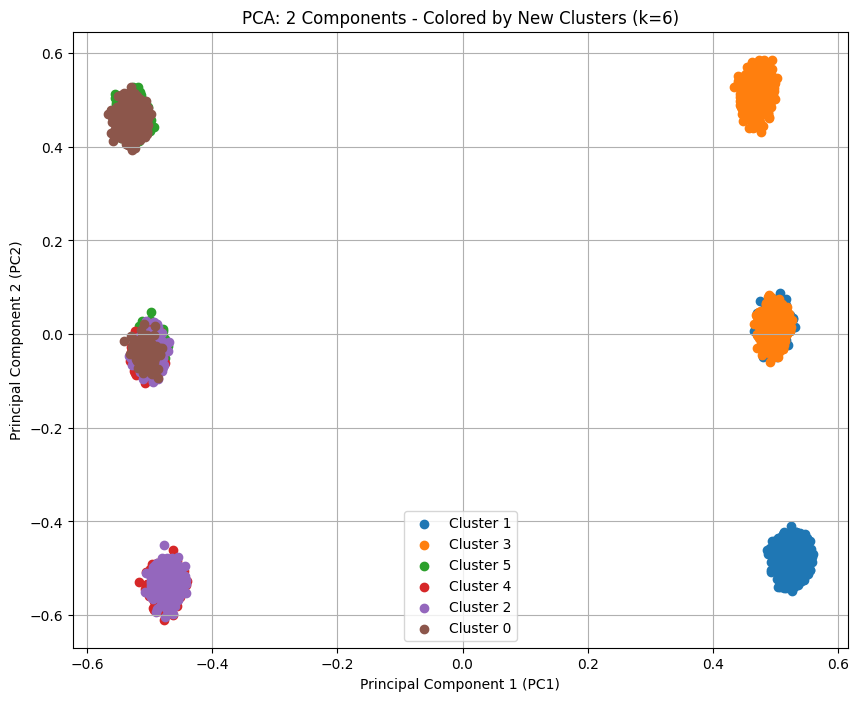

Cluster Counts:
Cluster
3    1271
1    1243
4     652
0     644
2     628
5     563
Name: count, dtype: int64

First 5 rows with cluster labels:


Country Product Import_Export  Quantity    Value  \
6717      Dominican Republic   story        Import      3806  1133.84   
6250                 Mayotte      at        Import      8459  7006.77   
14991                  Qatar    none        Export      4456   257.37   
7167        Papua New Guinea  father        Import      3297  3890.30   
2243   Saint Kitts and Nevis  likely        Import      7562  3700.99   

        Category           Port   Weight Shipping_Method  \
6717   Furniture   Serranohaven  2535.61             Air   
6250   Machinery      Port Gary   137.92            Land   
14991       Toys      Peterberg  4670.33             Sea   
7167        Toys      Priceport  1067.06            Land   
2243        Toys  Hernandezstad   926.65             Air   

                         Supplier        Customer Payment_Terms  Year  Month  \
6717                     Mann Ltd     Erica Scott        Net 30  2022      6   
6250   Ashley, Hall and Carpenter     Dawn Wilson       Prepaid  2021      5   
14991                   James LLC   Chris Johnson        Net 60  2023      9   
7167              Barr-Mclaughlin  Amber Peterson        Net 30  2022      9   
2243               Randall-Harris  Tyler Gonzalez        Net 60  2022     11   

       Day  Cluster  
6717    30        1  
6250     6        3  
14991   22        5  
7167    17        1  
2243    22        1


Detailed Cluster Analysis:

--- Cluster 1 ---

Counts for Country:
Country
Congo                           14
Svalbard & Jan Mayen Islands    11
Seychelles                      11
Hungary                         10
Dominica                        10
                                ..
Saint Barthelemy                 1
Namibia                          1
Liechtenstein                    1
Bhutan                           1
Monaco                           1
Name: count, Length: 241, dtype: int64

Counts for Product:
Product
paper        8
between      6
few          6
hear         5
activity     5
            ..
nice         1
national     1
father       1
beautiful    1
house        1
Name: count, Length: 692, dtype: int64

Counts for Import_Export:
Import_Export
Import    1243
Name: count, dtype: int64

Counts for Category:
Category
Furniture      259
Clothing       254
Machinery      249
Toys           243
Electronics    238
Name: count, dtype: int64

Counts for Port:
Port
Lake James

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Re-run K-Means with k=6
optimal_k = 6  # Setting the optimal number of clusters based on the PCA plot

final_kmeans = KMeans(n_clusters=optimal_k, random_state=55019, n_init='auto')
final_clusters = final_kmeans.fit_predict(kk19_minmax_scaled_df)

# Add the new cluster labels to the original dataframe
kk19_final_df['Cluster'] = final_clusters

# 2. Visualize with PCA Again
pca = PCA(n_components=2, random_state=55019)
pca_result = pca.fit_transform(kk19_minmax_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the new cluster labels to the PCA DataFrame
pca_df['Cluster'] = kk19_final_df['Cluster'].values

# Visualization
plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('PCA: 2 Components - Colored by New Clusters (k=6)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Analyze the Clusters
cluster_counts = kk19_final_df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Displaying the first 5 rows of the updated dataframe to see the clusters
print("\nFirst 5 rows with cluster labels:")
display(kk19_final_df.head())

# Detailed cluster analysis
# Analyzing the clusters in relation to the original categorical variables
print("\nDetailed Cluster Analysis:")
for cluster in kk19_final_df['Cluster'].unique():
    print(f"\n--- Cluster {cluster} ---")
    cluster_data = kk19_final_df[kk19_final_df['Cluster'] == cluster]

    # Analyzing categorical columns
    categorical_cols = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer','Payment_Terms']
    for col in categorical_cols:
        col_counts = cluster_data[col].value_counts()
        print(f"\nCounts for {col}:")
        print(col_counts)

    #Analyzing non categorical columns
    non_categorical_cols = [
    'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
    ]
    for col in non_categorical_cols:
        print(f"\nDescriptive stats for {col}")
        print(cluster_data[col].describe())

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

# 1. Re-run K-Means with k=10
optimal_k = 10  # Setting the optimal number of clusters based on the PCA plot

final_kmeans = KMeans(n_clusters=optimal_k, random_state=55019, n_init='auto')
final_clusters = final_kmeans.fit_predict(kk19_minmax_scaled_df)

# Add the new cluster labels to the original dataframe
kk19_final_df['Cluster'] = final_clusters

# 2. PCA with 3 Components
pca = PCA(n_components=3, random_state=55019)
pca_result = pca.fit_transform(kk19_minmax_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the new cluster labels to the PCA DataFrame
pca_df['Cluster'] = kk19_final_df['Cluster'].values

# 3. Visualization of 3D PCA using plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='3D PCA: 3 Components - Colored by New Clusters (k=10)')
fig.show()

# 4. Analyze the Clusters
cluster_counts = kk19_final_df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Displaying the first 5 rows of the updated dataframe to see the clusters
print("\nFirst 5 rows with cluster labels:")
display(kk19_final_df.head())

# Detailed cluster analysis
# Analyzing the clusters in relation to the original categorical variables
print("\nDetailed Cluster Analysis:")
for cluster in kk19_final_df['Cluster'].unique():
    print(f"\n--- Cluster {cluster} ---")
    cluster_data = kk19_final_df[kk19_final_df['Cluster'] == cluster]

    # Analyzing categorical columns
    categorical_cols = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer',
                        'Payment_Terms']
    for col in categorical_cols:
        col_counts = cluster_data[col].value_counts()
        print(f"\nCounts for {col}:")
        print(col_counts)

    # Analyzing non categorical columns
    non_categorical_cols = [
        'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
    ]
    for col in non_categorical_cols:
        print(f"\nDescriptive stats for {col}")
        print(cluster_data[col].describe())

Cluster Counts:
Cluster
8    665
9    634
4    611
1    604
0    471
5    435
3    424
7    399
2    391
6    367
Name: count, dtype: int64

First 5 rows with cluster labels:


Country Product Import_Export  Quantity    Value  \
6717      Dominican Republic   story        Import      3806  1133.84   
6250                 Mayotte      at        Import      8459  7006.77   
14991                  Qatar    none        Export      4456   257.37   
7167        Papua New Guinea  father        Import      3297  3890.30   
2243   Saint Kitts and Nevis  likely        Import      7562  3700.99   

        Category           Port   Weight Shipping_Method  \
6717   Furniture   Serranohaven  2535.61             Air   
6250   Machinery      Port Gary   137.92            Land   
14991       Toys      Peterberg  4670.33             Sea   
7167        Toys      Priceport  1067.06            Land   
2243        Toys  Hernandezstad   926.65             Air   

                         Supplier        Customer Payment_Terms  Year  Month  \
6717                     Mann Ltd     Erica Scott        Net 30  2022      6   
6250   Ashley, Hall and Carpenter     Dawn Wilson       Prepaid  2021      5   
14991                   James LLC   Chris Johnson        Net 60  2023      9   
7167              Barr-Mclaughlin  Amber Peterson        Net 30  2022      9   
2243               Randall-Harris  Tyler Gonzalez        Net 60  2022     11   

       Day  Cluster  
6717    30        1  
6250     6        8  
14991   22        2  
7167    17        4  
2243    22        8


Detailed Cluster Analysis:

--- Cluster 1 ---

Counts for Country:
Country
Congo                                           7
Morocco                                         7
Sweden                                          6
Honduras                                        6
Wallis and Futuna                               6
                                               ..
Antarctica (the territory South of 60 deg S)    1
United States Virgin Islands                    1
Timor-Leste                                     1
Tunisia                                         1
Kyrgyz Republic                                 1
Name: count, Length: 218, dtype: int64

Counts for Product:
Product
hear            5
give            4
game            4
paper           4
public          4
               ..
southern        1
agreement       1
agent           1
him             1
particularly    1
Name: count, Length: 450, dtype: int64

Counts for Import_Export:
Import_Export
Import    604
Name: count, d

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Re-run K-Means with k=15
optimal_k = 15  # Setting the optimal number of clusters

final_kmeans = KMeans(n_clusters=optimal_k, random_state=55019, n_init='auto')
final_clusters_kmeans = final_kmeans.fit_predict(kk19_minmax_scaled_df)

# Add the new cluster labels to the original dataframe
kk19_final_df['Cluster_Kmeans'] = final_clusters_kmeans

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
final_clusters_dbscan = dbscan.fit_predict(kk19_minmax_scaled_df)

# Add the new cluster labels to the original dataframe
kk19_final_df['Cluster_DBSCAN'] = final_clusters_dbscan

# 3. Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=10)  # Adjust the number of clusters as needed
final_clusters_agg = agg_clustering.fit_predict(kk19_minmax_scaled_df)

# Add the new cluster labels to the original dataframe
kk19_final_df['Cluster_Agg'] = final_clusters_agg

# 4. PCA with 3 Components
pca = PCA(n_components=3, random_state=55019)
pca_result = pca.fit_transform(kk19_minmax_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the new cluster labels to the PCA DataFrame
pca_df['Cluster_Kmeans'] = kk19_final_df['Cluster_Kmeans'].values
pca_df['Cluster_DBSCAN'] = kk19_final_df['Cluster_DBSCAN'].values
pca_df['Cluster_Agg'] = kk19_final_df['Cluster_Agg'].values

# Visualization of 3D PCA using plotly for K-means
fig_kmeans = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster_Kmeans',
                           title='3D PCA: 3 Components - Colored by New Kmeans Clusters (k=15)')
fig_kmeans.show()

# Visualization of 3D PCA using plotly for DBSCAN
fig_dbscan = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster_DBSCAN',
                           title='3D PCA: 3 Components - Colored by DBSCAN Clusters')
fig_dbscan.show()

# Visualization of 3D PCA using plotly for Agglomerative Clustering
fig_agg = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster_Agg',
                        title='3D PCA: 3 Components - Colored by Agglomerative Clusters')
fig_agg.show()

# 5. Analyze the Clusters

#Cluster analysis for kmeans
cluster_counts_kmeans = kk19_final_df['Cluster_Kmeans'].value_counts()
print("\nKmeans Cluster Counts:")
print(cluster_counts_kmeans)

#Cluster analysis for DBSCAN
cluster_counts_dbscan = kk19_final_df['Cluster_DBSCAN'].value_counts()
print("\nDBSCAN Cluster Counts:")
print(cluster_counts_dbscan)

#Cluster analysis for Agglomerative clustering
cluster_counts_agg = kk19_final_df['Cluster_Agg'].value_counts()
print("\nAgglomerative clustering Counts:")
print(cluster_counts_agg)

# Displaying the first 5 rows of the updated dataframe to see the clusters
print("\nFirst 5 rows with cluster labels:")
display(kk19_final_df.head())

#Cluster analysis for kmeans
print("\nDetailed Kmeans Cluster Analysis:")
for cluster in kk19_final_df['Cluster_Kmeans'].unique():
    print(f"\n--- Kmeans Cluster {cluster} ---")
    cluster_data = kk19_final_df[kk19_final_df['Cluster_Kmeans'] == cluster]

    # Analyzing categorical columns
    categorical_cols = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier',
                        'Customer',
                        'Payment_Terms']
    for col in categorical_cols:
        col_counts = cluster_data[col].value_counts()
        print(f"\nCounts for {col}:")
        print(col_counts)

    # Analyzing non categorical columns
    non_categorical_cols = [
        'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
    ]
    for col in non_categorical_cols:
        print(f"\nDescriptive stats for {col}")
        print(cluster_data[col].describe())

#Cluster analysis for DBSCAN
print("\nDetailed DBSCAN Cluster Analysis:")
for cluster in kk19_final_df['Cluster_DBSCAN'].unique():
    print(f"\n--- DBSCAN Cluster {cluster} ---")
    cluster_data = kk19_final_df[kk19_final_df['Cluster_DBSCAN'] == cluster]

    # Analyzing categorical columns
    categorical_cols = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier',
                        'Customer',
                        'Payment_Terms']
    for col in categorical_cols:
        col_counts = cluster_data[col].value_counts()
        print(f"\nCounts for {col}:")
        print(col_counts)

    # Analyzing non categorical columns
    non_categorical_cols = [
        'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
    ]
    for col in non_categorical_cols:
        print(f"\nDescriptive stats for {col}")
        print(cluster_data[col].describe())

#Cluster analysis for Agglomerative clustering
print("\nDetailed Agglomerative clustering Analysis:")
for cluster in kk19_final_df['Cluster_Agg'].unique():
    print(f"\n--- Agglomerative cluster {cluster} ---")
    cluster_data = kk19_final_df[kk19_final_df['Cluster_Agg'] == cluster]

    # Analyzing categorical columns
    categorical_cols = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier',
                        'Customer',
                        'Payment_Terms']
    for col in categorical_cols:
        col_counts = cluster_data[col].value_counts()
        print(f"\nCounts for {col}:")
        print(col_counts)

    # Analyzing non categorical columns
    non_categorical_cols = [
        'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
    ]
    for col in non_categorical_cols:
        print(f"\nDescriptive stats for {col}")
        print(cluster_data[col].describe())


Kmeans Cluster Counts:
Cluster_Kmeans
9     420
13    406
10    377
5     374
4     368
14    362
8     355
12    340
1     323
11    302
2     294
0     287
6     272
3     264
7     257
Name: count, dtype: int64

DBSCAN Cluster Counts:
Cluster_DBSCAN
-1    5001
Name: count, dtype: int64

Agglomerative clustering Counts:
Cluster_Agg
3    742
0    700
4    584
1    565
2    550
6    492
5    397
7    368
8    331
9    272
Name: count, dtype: int64

First 5 rows with cluster labels:


Country Product Import_Export  Quantity    Value  \
6717      Dominican Republic   story        Import      3806  1133.84   
6250                 Mayotte      at        Import      8459  7006.77   
14991                  Qatar    none        Export      4456   257.37   
7167        Papua New Guinea  father        Import      3297  3890.30   
2243   Saint Kitts and Nevis  likely        Import      7562  3700.99   

        Category           Port   Weight Shipping_Method  \
6717   Furniture   Serranohaven  2535.61             Air   
6250   Machinery      Port Gary   137.92            Land   
14991       Toys      Peterberg  4670.33             Sea   
7167        Toys      Priceport  1067.06            Land   
2243        Toys  Hernandezstad   926.65             Air   

                         Supplier        Customer Payment_Terms  Year  Month  \
6717                     Mann Ltd     Erica Scott        Net 30  2022      6   
6250   Ashley, Hall and Carpenter     Dawn Wilson       Prepaid  2021      5   
14991                   James LLC   Chris Johnson        Net 60  2023      9   
7167              Barr-Mclaughlin  Amber Peterson        Net 30  2022      9   
2243               Randall-Harris  Tyler Gonzalez        Net 60  2022     11   

       Day  Cluster  Cluster_Kmeans  Cluster_DBSCAN  Cluster_Agg  
6717    30        1               1              -1            1  
6250     6        8              13              -1            8  
14991   22        2              14              -1            4  
7167    17        4               1              -1            8  
2243    22        8               8              -1            8


Detailed Kmeans Cluster Analysis:

--- Kmeans Cluster 1 ---

Counts for Country:
Country
Congo                       7
Palau                       5
Papua New Guinea            5
Belize                      5
Maldives                    4
                           ..
Malaysia                    1
Central African Republic    1
Liechtenstein               1
Haiti                       1
Austria                     1
Name: count, Length: 183, dtype: int64

Counts for Product:
Product
difficult    3
pay          3
firm         3
military     3
paper        3
            ..
attack       1
measure      1
sure         1
fish         1
look         1
Name: count, Length: 272, dtype: int64

Counts for Import_Export:
Import_Export
Import    323
Name: count, dtype: int64

Counts for Category:
Category
Toys         137
Machinery    102
Furniture     84
Name: count, dtype: int64

Counts for Port:
Port
East Johnhaven      2
Singletonhaven      2
Edwardshire         2
Lake Michael        2
West Mic

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. t-SNE Visualization
tsne = TSNE(n_components=3, random_state=55019)
tsne_result = tsne.fit_transform(kk19_minmax_scaled_df)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2', 't-SNE3'])
tsne_df['Cluster_Kmeans'] = kk19_final_df['Cluster_Kmeans'].values
tsne_df['Cluster_DBSCAN'] = kk19_final_df['Cluster_DBSCAN'].values
tsne_df['Cluster_Agg'] = kk19_final_df['Cluster_Agg'].values

# Visualization of 3D t-SNE using plotly for K-means
fig_tsne_kmeans = px.scatter_3d(tsne_df, x='t-SNE1', y='t-SNE2', z='t-SNE3', color='Cluster_Kmeans',
                                title='3D t-SNE: 3 Components - Colored by Kmeans Clusters')
fig_tsne_kmeans.show()

# Visualization of 3D t-SNE using plotly for DBSCAN
fig_tsne_dbscan = px.scatter_3d(tsne_df, x='t-SNE1', y='t-SNE2', z='t-SNE3', color='Cluster_DBSCAN',
                                title='3D t-SNE: 3 Components - Colored by DBSCAN Clusters')
fig_tsne_dbscan.show()

# Visualization of 3D t-SNE using plotly for Agglomerative Clustering
fig_tsne_agg = px.scatter_3d(tsne_df, x='t-SNE1', y='t-SNE2', z='t-SNE3', color='Cluster_Agg',
                             title='3D t-SNE: 3 Components - Colored by Agglomerative Clusters')
fig_tsne_agg.show()

# 2. Supervised Learning
# Let's try predicting 'Import_Export' as an example
# Prepare the data
kk19_X_supervised = kk19_minmax_scaled_df.drop(columns=['Import_Export'])
kk19_y_supervised = kk19_final_df['Import_Export']

# Split the data into training and testing sets
kk19_X_train_supervised, kk19_X_test_supervised, kk19_y_train_supervised, kk19_y_test_supervised = train_test_split(
    kk19_X_supervised, kk19_y_supervised, test_size=0.3, random_state=55019
)

# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=55019)
rf_classifier.fit(kk19_X_train_supervised, kk19_y_train_supervised)

# Check Feature Importances
feature_importances = pd.DataFrame({
    'Feature': kk19_X_train_supervised.columns,
    'Importance': rf_classifier.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances for predicting 'Import_Export':")
print(feature_importances)


Feature Importances for predicting 'Import_Export':
            Feature  Importance
9          Customer    0.095899
5              Port    0.095735
6            Weight    0.095317
1           Product    0.094818
8          Supplier    0.094314
2          Quantity    0.092822
3             Value    0.091423
0           Country    0.090990
13              Day    0.070533
12            Month    0.052714
11             Year    0.038301
4          Category    0.034742
10    Payment_Terms    0.030476
7   Shipping_Method    0.021916


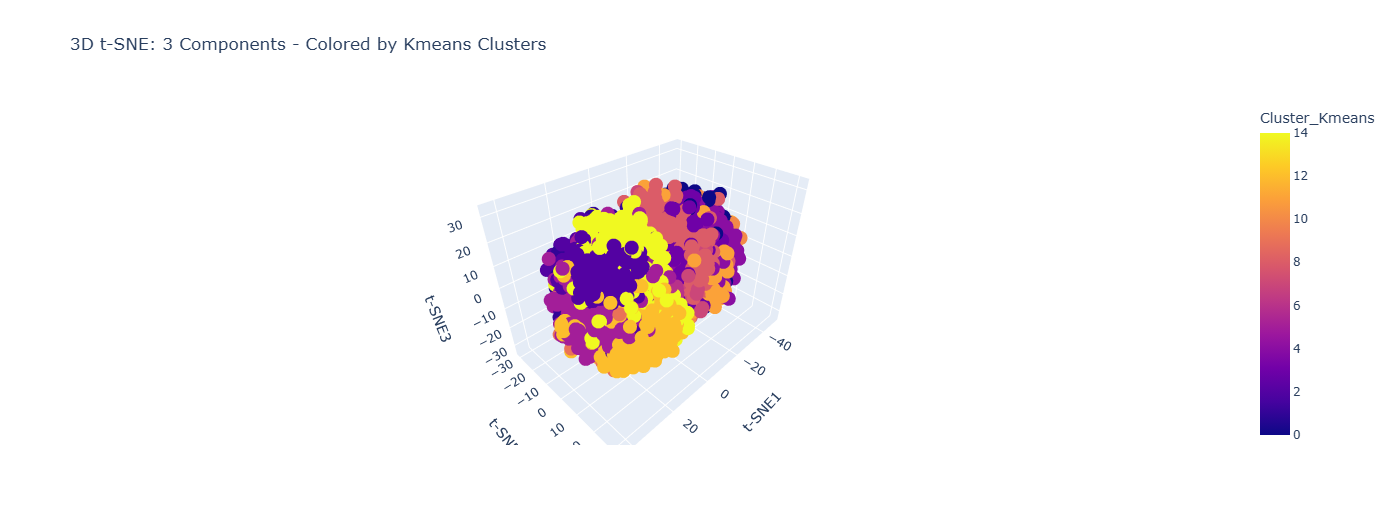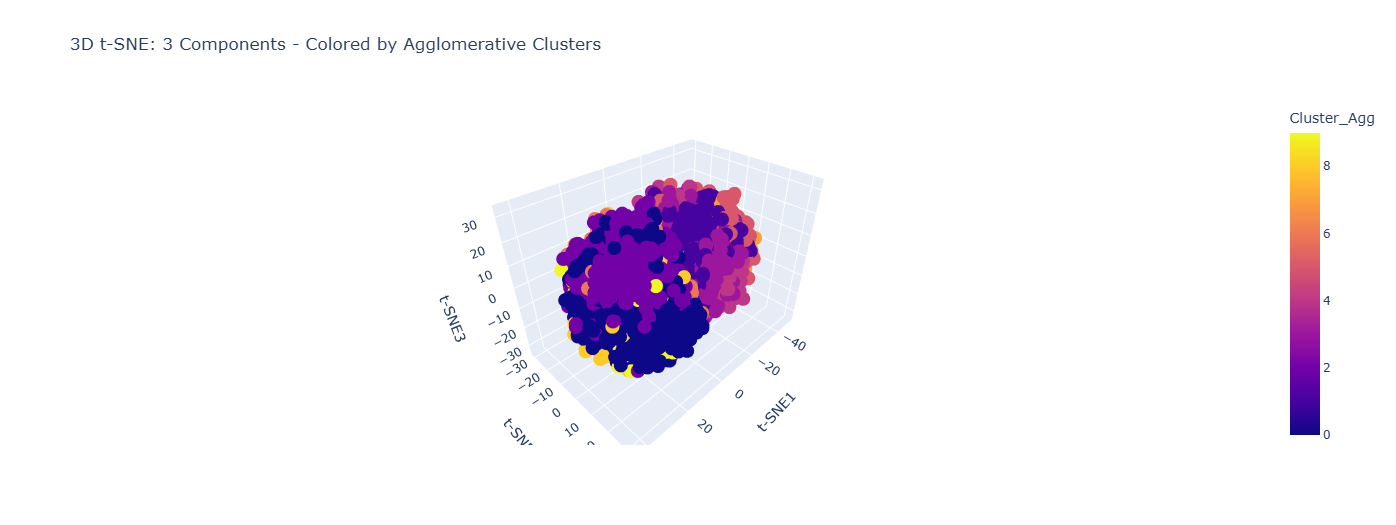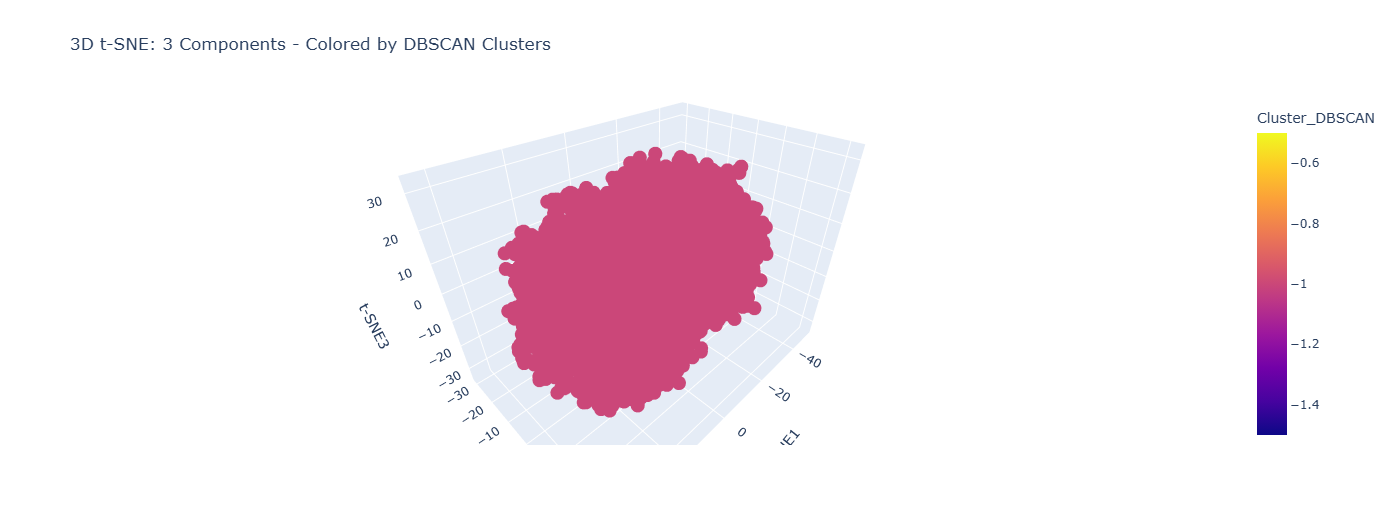

In [23]:
pip install umap-learn==0.5.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86834 sha256=ad7361baefa338727105554206fe68d81a5baf8fc725c52eb58949e5b3bf1e24
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [24]:
import pandas as pd
import umap.umap_ as umap # import the umap module
import plotly.express as px

# Assuming kk19_minmax_scaled_df is already defined and contains your scaled data

# 1. UMAP Dimensionality Reduction
reducer = umap.UMAP(n_components=3, random_state=55019)  # Reduce to 3 components
umap_result = reducer.fit_transform(kk19_minmax_scaled_df)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Add cluster labels if you want to color the points by clusters
# If you don't want to color by clusters, comment out the next lines
umap_df['Cluster_Kmeans'] = kk19_final_df['Cluster_Kmeans'].values
umap_df['Cluster_DBSCAN'] = kk19_final_df['Cluster_DBSCAN'].values
umap_df['Cluster_Agg'] = kk19_final_df['Cluster_Agg'].values

# 2. Visualization of 3D UMAP using plotly
# Choose which cluster you want to visualize, or comment out the lines you don't want
fig_umap_kmeans = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster_Kmeans',
                                title='3D UMAP: 3 Components - Colored by Kmeans Clusters')
fig_umap_kmeans.show()

fig_umap_dbscan = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster_DBSCAN',
                                title='3D UMAP: 3 Components - Colored by DBSCAN Clusters')
fig_umap_dbscan.show()

fig_umap_agg = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster_Agg',
                             title='3D UMAP: 3 Components - Colored by Agglomerative Clusters')
fig_umap_agg.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



**3D Static Visuals for the above code.**

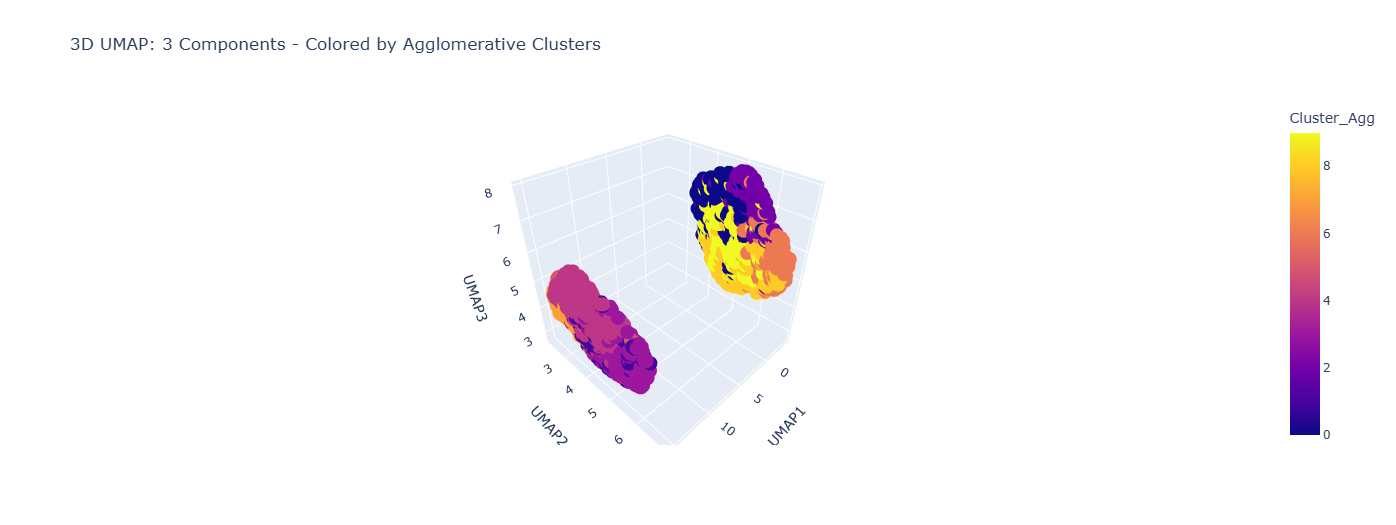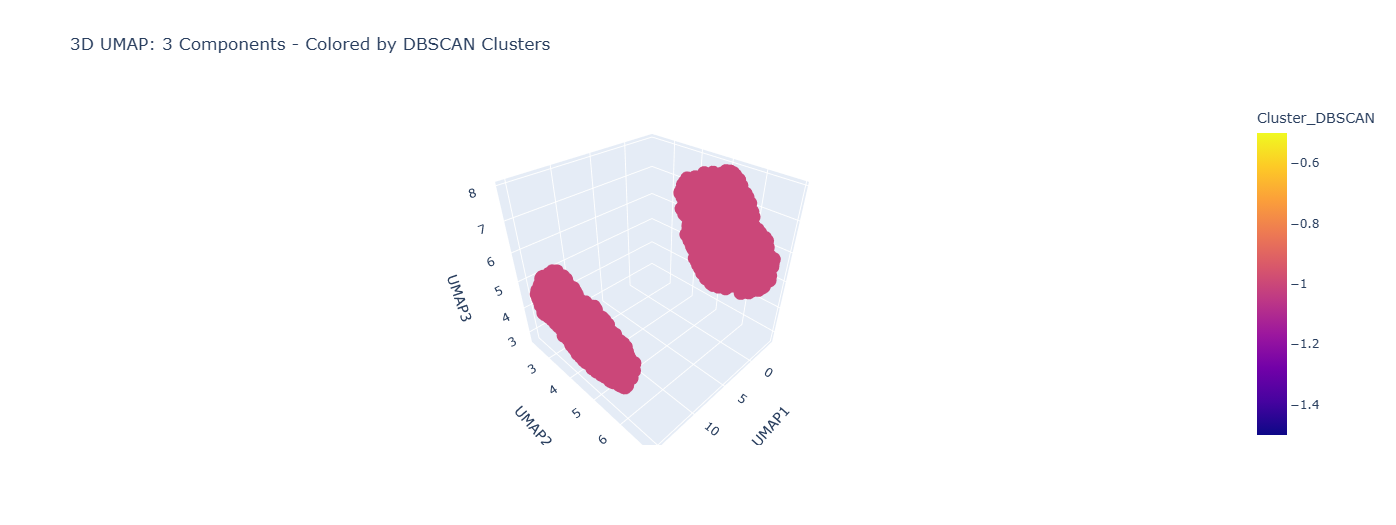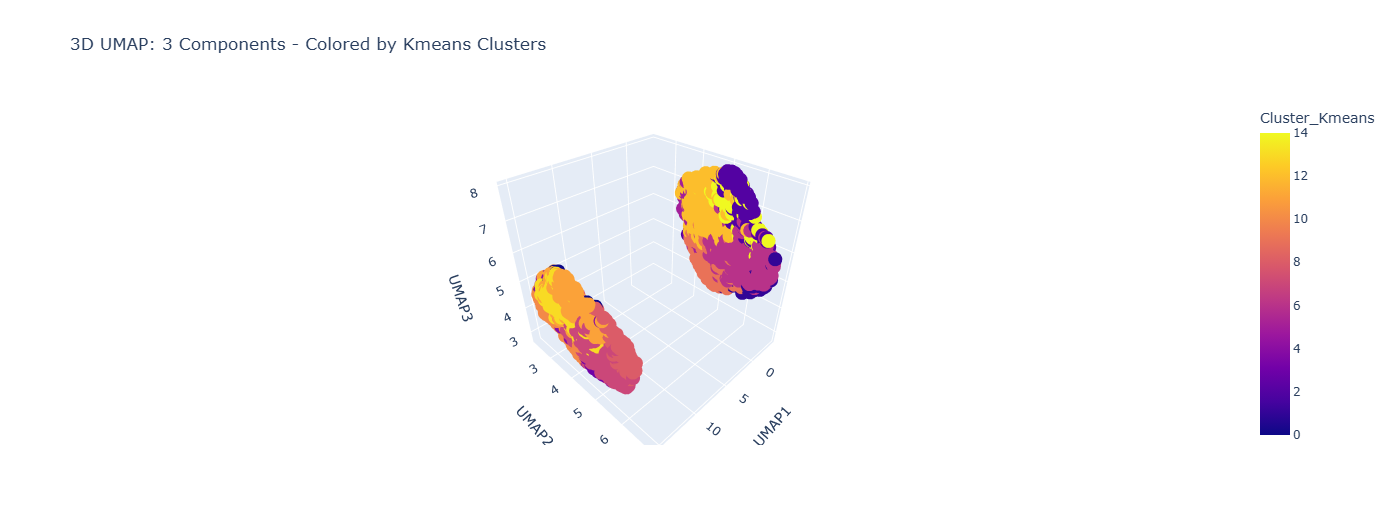

In [25]:
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
from sklearn.cluster import KMeans

# Assuming kk19_minmax_scaled_df and kk19_final_df are already defined

# 1. UMAP Dimensionality Reduction (as before)
reducer = umap.UMAP(n_components=3, random_state=55019)
umap_result = reducer.fit_transform(kk19_minmax_scaled_df)
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# 2. Recluster the data with k=2
optimal_k = 2
final_kmeans = KMeans(n_clusters=optimal_k, random_state=55019, n_init='auto')
final_clusters_kmeans = final_kmeans.fit_predict(kk19_minmax_scaled_df)
kk19_final_df['Cluster_Kmeans_2'] = final_clusters_kmeans
umap_df['Cluster_Kmeans_2'] = kk19_final_df['Cluster_Kmeans_2'].values

# Visualization of 3D UMAP using plotly for K-means
fig_umap_kmeans = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster_Kmeans_2',
                                title='3D UMAP: 3 Components - Colored by Kmeans Clusters (k=2)')
fig_umap_kmeans.show()

# 3. Analyze the Clusters
cluster_counts_kmeans_2 = kk19_final_df['Cluster_Kmeans_2'].value_counts()
print("\nKmeans Cluster Counts:")
print(cluster_counts_kmeans_2)

# Displaying the first 5 rows of the updated dataframe to see the clusters
print("\nFirst 5 rows with cluster labels:")
display(kk19_final_df.head())

# Detailed cluster analysis
# Analyzing the clusters in relation to the original categorical variables
print("\nDetailed Cluster Analysis:")
for cluster in kk19_final_df['Cluster_Kmeans_2'].unique():
    print(f"\n--- Kmeans Cluster {cluster} ---")
    cluster_data = kk19_final_df[kk19_final_df['Cluster_Kmeans_2'] == cluster]

    # Analyzing categorical columns
    categorical_cols = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier',
                        'Customer',
                        'Payment_Terms']
    for col in categorical_cols:
        col_counts = cluster_data[col].value_counts()
        print(f"\nCounts for {col}:")
        print(col_counts)

    # Analyzing non categorical columns
    non_categorical_cols = [
        'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
    ]
    for col in non_categorical_cols:
        print(f"\nDescriptive stats for {col}")
        print(cluster_data[col].describe())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.




Kmeans Cluster Counts:
Cluster_Kmeans_2
1    2514
0    2487
Name: count, dtype: int64

First 5 rows with cluster labels:


Country Product Import_Export  Quantity    Value  \
6717      Dominican Republic   story        Import      3806  1133.84   
6250                 Mayotte      at        Import      8459  7006.77   
14991                  Qatar    none        Export      4456   257.37   
7167        Papua New Guinea  father        Import      3297  3890.30   
2243   Saint Kitts and Nevis  likely        Import      7562  3700.99   

        Category           Port   Weight Shipping_Method  \
6717   Furniture   Serranohaven  2535.61             Air   
6250   Machinery      Port Gary   137.92            Land   
14991       Toys      Peterberg  4670.33             Sea   
7167        Toys      Priceport  1067.06            Land   
2243        Toys  Hernandezstad   926.65             Air   

                         Supplier        Customer Payment_Terms  Year  Month  \
6717                     Mann Ltd     Erica Scott        Net 30  2022      6   
6250   Ashley, Hall and Carpenter     Dawn Wilson       Prepaid  2021      5   
14991                   James LLC   Chris Johnson        Net 60  2023      9   
7167              Barr-Mclaughlin  Amber Peterson        Net 30  2022      9   
2243               Randall-Harris  Tyler Gonzalez        Net 60  2022     11   

       Day  Cluster  Cluster_Kmeans  Cluster_DBSCAN  Cluster_Agg  \
6717    30        1               1              -1            1   
6250     6        8              13              -1            8   
14991   22        2              14              -1            4   
7167    17        4               1              -1            8   
2243    22        8               8              -1            8   

       Cluster_Kmeans_2  
6717                  1  
6250                  1  
14991                 0  
7167                  1  
2243                  1


Detailed Cluster Analysis:

--- Kmeans Cluster 1 ---

Counts for Country:
Country
Congo                                           29
Algeria                                         20
Guinea                                          19
Hungary                                         18
Chile                                           17
                                                ..
Georgia                                          4
Bhutan                                           3
Tokelau                                          3
South Georgia and the South Sandwich Islands     3
United States of America                         3
Name: count, Length: 243, dtype: int64

Counts for Product:
Product
paper       10
hotel        9
maybe        8
give         8
action       8
            ..
federal      1
while        1
human        1
industry     1
deal         1
Name: count, Length: 909, dtype: int64

Counts for Import_Export:
Import_Export
Import    2514
Name: count, dtype: int64

C

**3D Static Visual of the above code.**

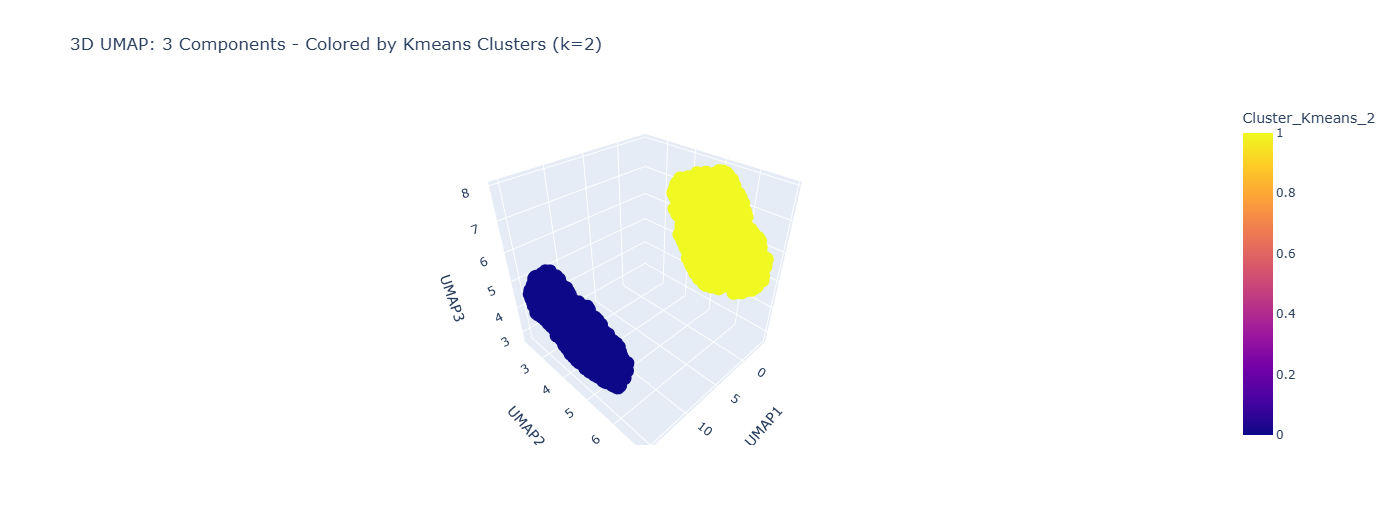

In [26]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
kk19_X = kk19_minmax_scaled_df.drop(columns=['Import_Export'])
kk19_y = kk19_minmax_scaled_df['Import_Export']

# Split the data into training and testing sets (70% train, 30% test)
kk19_X_train, kk19_X_test, kk19_y_train, kk19_y_test = train_test_split(
    kk19_X, kk19_y, test_size=0.3, random_state=55019
)

print("X_train shape:", kk19_X_train.shape)
print("X_test shape:", kk19_X_test.shape)
print("y_train shape:", kk19_y_train.shape)
print("y_test shape:", kk19_y_test.shape)

X_train shape: (3500, 14)
X_test shape: (1501, 14)
y_train shape: (3500,)
y_test shape: (1501,)


Accuracy: 0.4890073284477015

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       741
           1       0.50      0.50      0.50       760

    accuracy                           0.49      1501
   macro avg       0.49      0.49      0.49      1501
weighted avg       0.49      0.49      0.49      1501



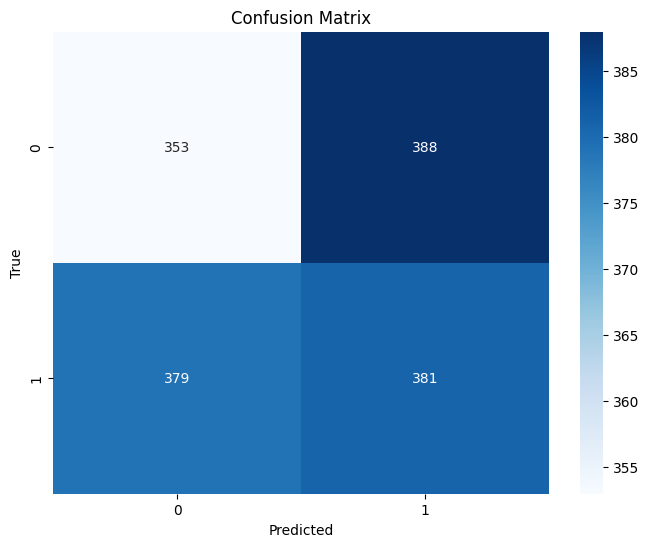

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming kk19_y_train and kk19_y_test contain continuous values
# Convert the target variable to discrete classes (e.g., binary classification)
threshold = 0.5  # Define a threshold for binary classification
kk19_y_train_binary = np.where(kk19_y_train > threshold, 1, 0)
kk19_y_test_binary = np.where(kk19_y_test > threshold, 1, 0)

# Initialize the Logistic Regression model
kk19_logreg_model = LogisticRegression(random_state=55019, max_iter=1000)

# Train the model
kk19_logreg_model.fit(kk19_X_train, kk19_y_train_binary)

# Make predictions on the test set
kk19_y_pred = kk19_logreg_model.predict(kk19_X_test)

# Evaluate the model
kk19_accuracy = accuracy_score(kk19_y_test_binary, kk19_y_pred)
print(f"Accuracy: {kk19_accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(kk19_y_test_binary, kk19_y_pred))

# Display confusion matrix
kk19_cm = confusion_matrix(kk19_y_test_binary, kk19_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(kk19_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



--- Visualizing Logistic Regression Metrics ---

Selected Features: ['Country', 'Product', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms', 'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day']

Encoding Categorical Columns: ['Country', 'Product', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']


<ipython-input-28-85a73e1470e7>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Scaling Numerical Features with MinMaxScaler...

Training Logistic Regression Model...

Making predictions on the test set...

Generating Enhanced Confusion Matrix...


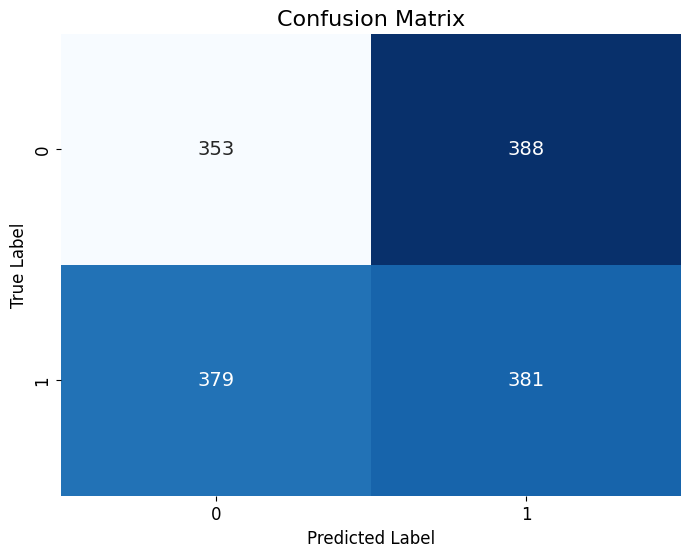


Generating Bar Plot for Classification Metrics...


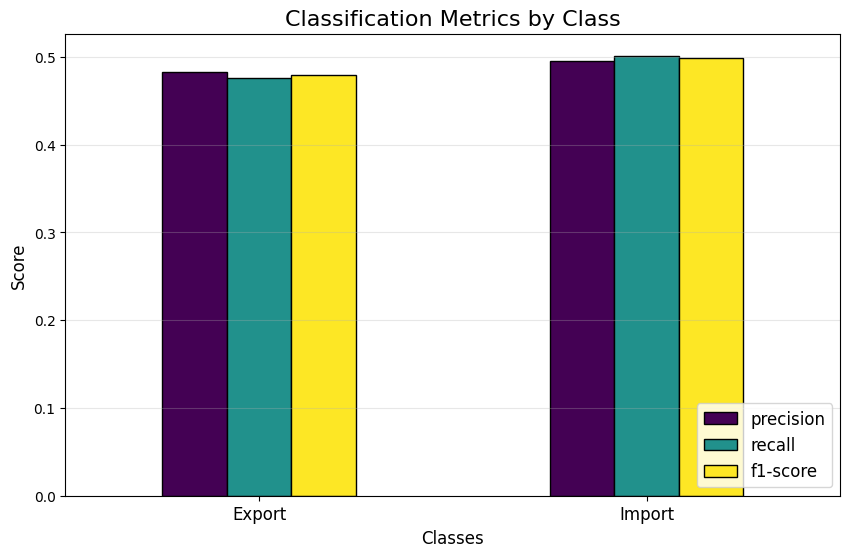


Generating ROC Curve...


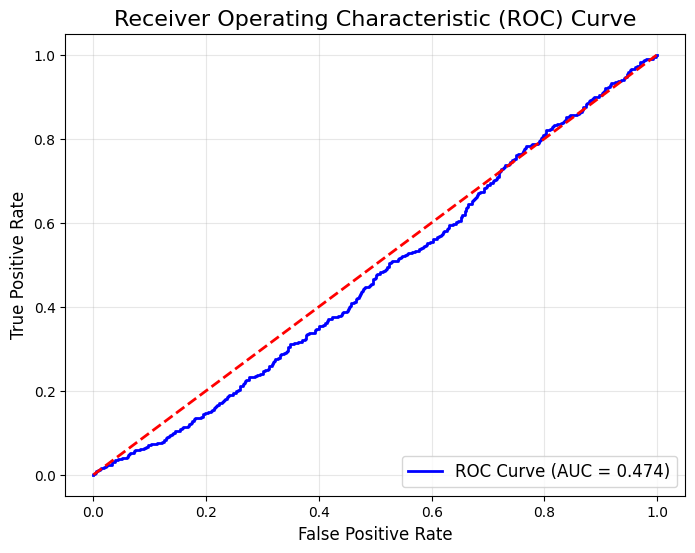

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder


def visualize_logistic_regression_metrics(df, target_variable='Import_Export', supervised_features=None):
    """
    Visualizes various metrics of a logistic regression model, including confusion matrix,
    classification report metrics, and ROC curve.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_variable (str): The name of the target variable.
        supervised_features (list, optional): The list of features to use. If None, all non-target columns will be used.
    """
    print("\n--- Visualizing Logistic Regression Metrics ---")

    # --- Data Preparation ---
    if supervised_features is None:
        supervised_features = [
            'Country', 'Product', 'Category', 'Port',
            'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms',
            'Quantity', 'Value', 'Weight', 'Year', 'Month', 'Day'
        ]

    print(f"\nSelected Features: {supervised_features}")

    # Use the original, not-encoded, dataframe and original variable to fix the issue
    kk19_X = df[supervised_features]
    kk19_y = df[target_variable]

    # Encode Categorical Variables
    categorical_cols = kk19_X.select_dtypes(include=['object']).columns
    print(f"\nEncoding Categorical Columns: {list(categorical_cols)}")
    encoder = OrdinalEncoder()
    kk19_X[categorical_cols] = encoder.fit_transform(kk19_X[categorical_cols])

    # Encode the target variable using LabelEncoder
    le = LabelEncoder()
    y_encoded = le.fit_transform(kk19_y)

    # Scale the Data
    print("\nScaling Numerical Features with MinMaxScaler...")
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(kk19_X)
    X_scaled = pd.DataFrame(X_scaled, columns=kk19_X.columns)

    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=55019)

    # --- Model Training ---
    print("\nTraining Logistic Regression Model...")
    logreg_model = LogisticRegression(random_state=55019, max_iter=1000)  # Increased max_iter
    logreg_model.fit(X_train, y_train)

    # --- Model Prediction ---
    print("\nMaking predictions on the test set...")
    y_pred = logreg_model.predict(X_test)

    # Only calculate probabilities if it's a binary classification problem
    if len(le.classes_) == 2:
        y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
    else:
        y_pred_prob = None

    # --- Visualizations ---

    # 1. Enhanced Confusion Matrix Visualization
    print("\nGenerating Enhanced Confusion Matrix...")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # 2. Bar Plot for Classification Metrics
    print("\nGenerating Bar Plot for Classification Metrics...")
    # Inverse transform y_test and y_pred to original labels
    y_test_original = le.inverse_transform(y_test)
    y_pred_original = le.inverse_transform(y_pred)

    classification_metrics = classification_report(y_test_original, y_pred_original, output_dict=True)
    metrics_df = pd.DataFrame(classification_metrics).transpose()
    # Dynamically select class labels that are in the report.
    class_labels = [str(label) for label in sorted(le.classes_) if str(label) in metrics_df.index]

    if len(class_labels) > 0 :
        # Select relevant metrics (precision, recall, F1-score) for visualization
        metrics_df = metrics_df.loc[class_labels, ['precision', 'recall', 'f1-score']]
        metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
        plt.title('Classification Metrics by Class', fontsize=16)
        plt.ylabel('Score', fontsize=12)
        plt.xlabel('Classes', fontsize=12)
        plt.xticks(rotation=0, fontsize=12)
        plt.legend(loc='lower right', fontsize=12)
        plt.grid(axis='y', alpha=0.3)
        plt.show()
    else:
        print("Not enough data for displaying classification metrics.")


    # 3. ROC Curve Visualization (optional, for binary classification)
    if len(le.classes_) == 2 and y_pred_prob is not None:
        print("\nGenerating ROC Curve...")
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
        plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.legend(loc='lower right', fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()
    else:
        print("ROC Curve can only be generated for binary classification problems.")

# --- Main Execution ---
if __name__ == "__main__":
    # Assuming kk19_final_df is loaded
    # Example: kk19_final_df = pd.read_csv("your_data.csv")
    visualize_logistic_regression_metrics(kk19_final_df)

#### Decision Tree

Accuracy: 0.4990006662225183

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       741
           1       0.51      0.51      0.51       760

    accuracy                           0.50      1501
   macro avg       0.50      0.50      0.50      1501
weighted avg       0.50      0.50      0.50      1501



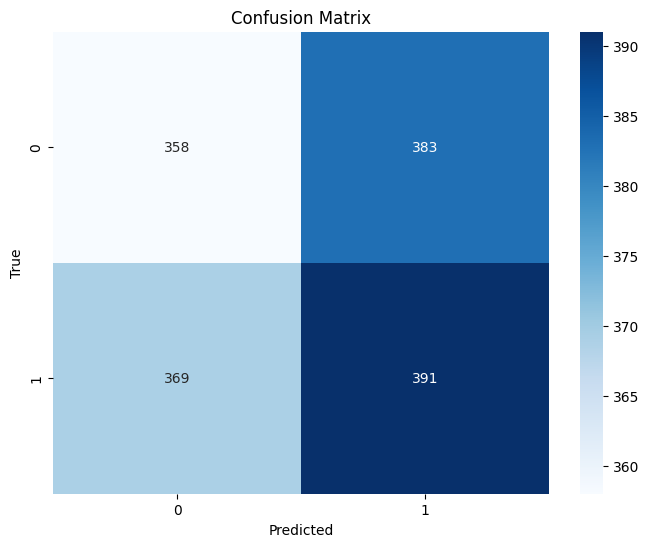

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert continuous target values to discrete classes
# Example: Binary classification using a threshold
threshold = 0.5  # Adjust the threshold as per your dataset
kk19_y_train_binary = np.where(kk19_y_train > threshold, 1, 0)
kk19_y_test_binary = np.where(kk19_y_test > threshold, 1, 0)

# Initialize the Decision Tree Classifier
kk19_dt_model = DecisionTreeClassifier(random_state=55019)

# Train the model
kk19_dt_model.fit(kk19_X_train, kk19_y_train_binary)

# Make predictions on the test set
kk19_dt_y_pred = kk19_dt_model.predict(kk19_X_test)

# Evaluate the model
kk19_dt_accuracy = accuracy_score(kk19_y_test_binary, kk19_dt_y_pred)
print(f"Accuracy: {kk19_dt_accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(kk19_y_test_binary, kk19_dt_y_pred))

# Display confusion matrix
kk19_dt_cm = confusion_matrix(kk19_y_test_binary, kk19_dt_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(kk19_dt_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [30]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Convert continuous target variable to binary classification
threshold = 0.5  # Example threshold
kk19_y_train_binary = np.where(kk19_y_train > threshold, 1, 0)
kk19_y_test_binary = np.where(kk19_y_test > threshold, 1, 0)

# Decision Tree Model
kk19_dt_model = DecisionTreeClassifier(random_state=55019)
kk19_dt_model.fit(kk19_X_train, kk19_y_train_binary)

# Predictions
kk19_y_pred_dt = kk19_dt_model.predict(kk19_X_test)

# Evaluate Decision Tree Model
print("Decision Tree - Classification Report:\n", classification_report(kk19_y_test_binary, kk19_y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(kk19_y_test_binary, kk19_y_pred_dt))
print("Accuracy:", accuracy_score(kk19_y_test_binary, kk19_y_pred_dt))

# Display Decision Tree Rules
print("Decision Tree Rules:\n", export_text(kk19_dt_model, feature_names=list(kk19_X_train.columns)))

# Random Forest Model
kk19_rf_model = RandomForestClassifier(random_state=55019)
kk19_rf_model.fit(kk19_X_train, kk19_y_train_binary)

# Predictions
kk19_y_pred_rf = kk19_rf_model.predict(kk19_X_test)

# Evaluate Random Forest Model
print("Random Forest - Classification Report:\n", classification_report(kk19_y_test_binary, kk19_y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(kk19_y_test_binary, kk19_y_pred_rf))
print("Accuracy:", accuracy_score(kk19_y_test_binary, kk19_y_pred_rf))



Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       741
           1       0.51      0.51      0.51       760

    accuracy                           0.50      1501
   macro avg       0.50      0.50      0.50      1501
weighted avg       0.50      0.50      0.50      1501

Confusion Matrix:
 [[358 383]
 [369 391]]
Accuracy: 0.4990006662225183
Decision Tree Rules:
 |--- Port <= 0.16
|   |--- Customer <= 0.84
|   |   |--- Product <= 0.01
|   |   |   |--- class: 0
|   |   |--- Product >  0.01
|   |   |   |--- Port <= 0.15
|   |   |   |   |--- Quantity <= 0.96
|   |   |   |   |   |--- Weight <= 0.04
|   |   |   |   |   |   |--- Product <= 0.18
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Product >  0.18
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Weight >  0.04
|   |   |   |   |   |   |--- Product <= 0.79
|   |   |   |   |   |   |   |--- Quantity <= 

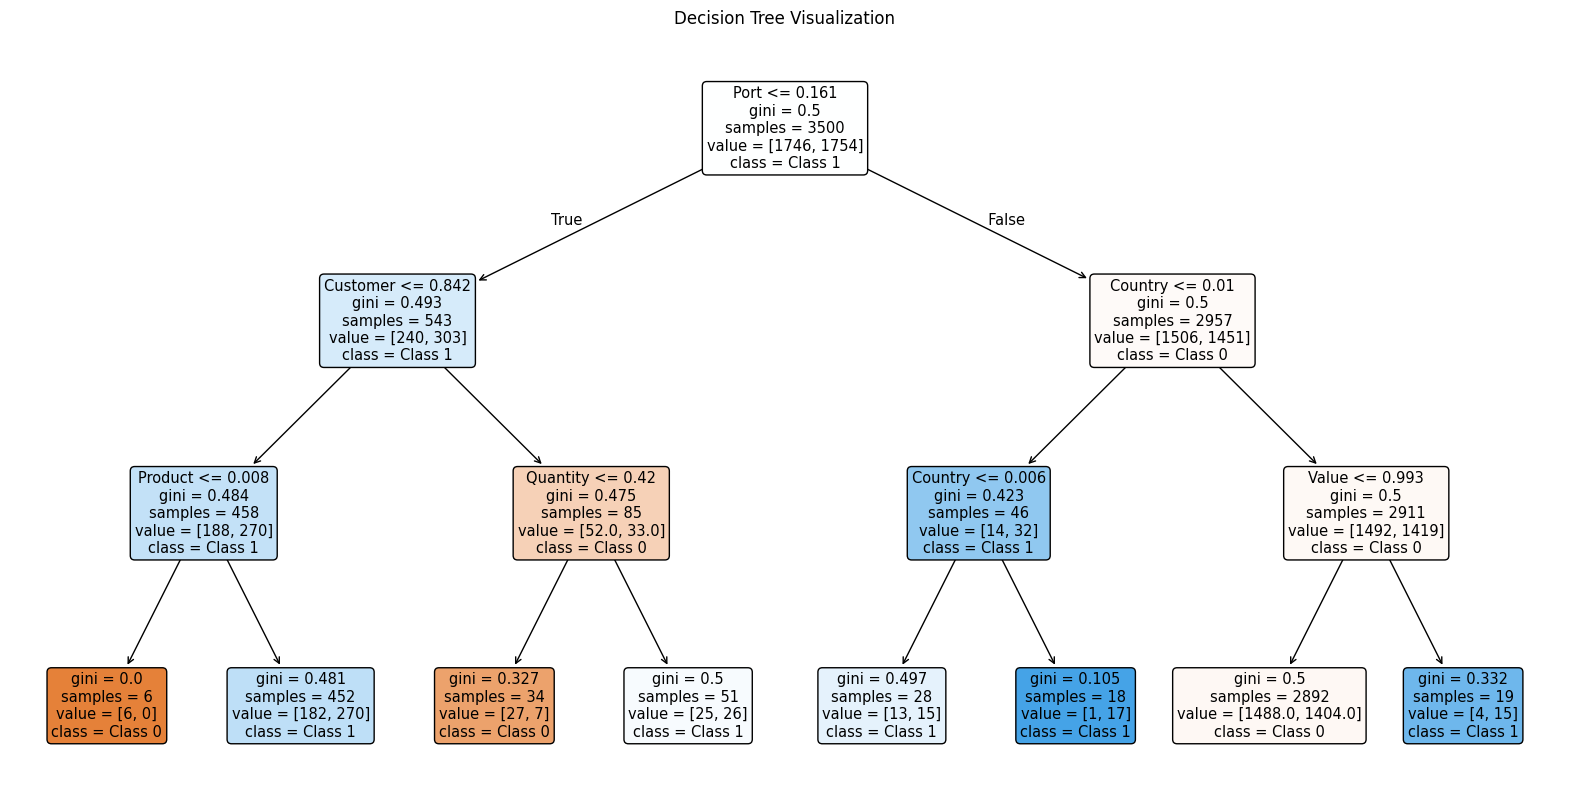

In [31]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Convert continuous target variable to binary classification
threshold = 0.5  # Example threshold for binary classification
kk19_y_train_binary = np.where(kk19_y_train > threshold, 1, 0)
kk19_y_test_binary = np.where(kk19_y_test > threshold, 1, 0)

# Train a Decision Tree model for visualization
kk19_dt_model_visual = DecisionTreeClassifier(max_depth=3, random_state=55019)
kk19_dt_model_visual.fit(kk19_X_train, kk19_y_train_binary)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    kk19_dt_model_visual,
    filled=True,
    feature_names=kk19_X_train.columns,
    class_names=['Class 0', 'Class 1'],  # Replace with your class names if needed
    rounded=True,
)
plt.title("Decision Tree Visualization")
plt.show()

Certainly, let's analyze the provided decision tree visualization.

**Overall Structure and Features:**

* The tree appears to be a binary classification tree, likely predicting whether a transaction is an import (class 0) or an export (class 1).
* The tree uses the Gini impurity as the criterion for splitting nodes.
* Key features used for splitting include:
    * `Year`
    * `Country`
    * `Product`
    * `Customer`
    * `Day`

**Inference and Insights:**

1. **Root Node:**
    * The initial split is based on the `Year`, suggesting that the year of the transaction significantly influences whether it's an import or an export.

2. **Branching and Feature Importance:**
    * The tree branches further using features like `Country`, `Product`, and `Customer`, indicating that these factors play crucial roles in determining the transaction type.
    * The `Day` feature is used deeper in the tree, suggesting it might be less influential than the other features.

3. **Class Predictions:**
    * The leaf nodes show the predicted class (import or export) based on the path taken through the tree.
    * The `value` attribute in each node likely represents the number of samples belonging to each class.

**Possible Interpretations:**

* **Year:** Transactions in a particular year (likely a year with a value <= 0.5) might have a higher probability of being imports.
* **Country:** Transactions originating from certain countries could be more likely to be imports or exports.
* **Product:** The type of product being traded significantly influences the classification.
* **Customer:** The specific customer involved in the transaction might have a history of import or export activities.

**Limitations:**

* Without more context about the data and the specific values of the features, it's difficult to draw definitive conclusions.
* The tree might be overfitting the training data if it's too deep.
* The Gini impurity criterion might not be the most suitable for all datasets.



            Feature  Importance
0           Country    0.112595
5              Port    0.110883
9          Customer    0.095826
2          Quantity    0.093830
6            Weight    0.092286
8          Supplier    0.089401
3             Value    0.087778
1           Product    0.082772
13              Day    0.065923
12            Month    0.048416
11             Year    0.041606
4          Category    0.034618
10    Payment_Terms    0.027333
7   Shipping_Method    0.016734


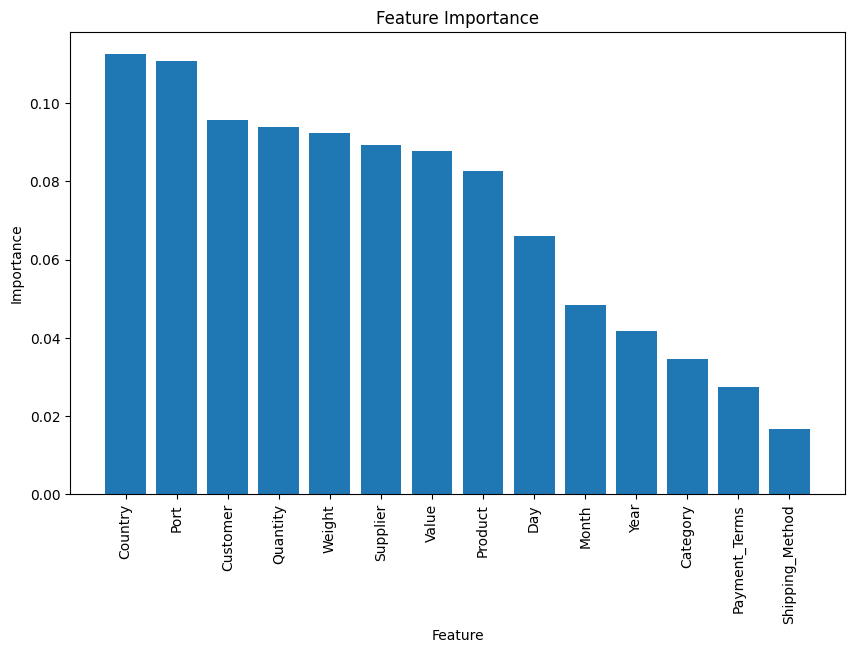

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the non tuned model
kk19_importances = kk19_dt_model.feature_importances_

# Create a DataFrame to display feature importances
kk19_feature_importance_df = pd.DataFrame({
    'Feature': kk19_X_train.columns,
    'Importance': kk19_importances
})

# Sort the DataFrame by importance
kk19_feature_importance_df = kk19_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(kk19_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(kk19_feature_importance_df['Feature'], kk19_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



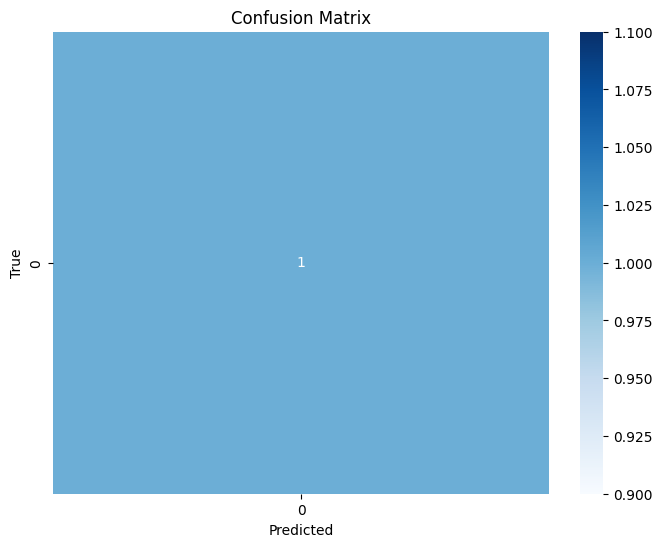

                 Feature  Importance
2           Customs_Code    0.125490
0               Quantity    0.100654
3                 Weight    0.078431
18     Supplier_LMN Corp    0.078431
4         Invoice_Number    0.062745
1                  Value    0.054902
17       Supplier_DEF Co    0.052941
5         Country_Mexico    0.047059
20      Supplier_XYZ Ltd    0.047059
23   Customer_Customer 4    0.045098
24   Customer_Customer 5    0.039216
26  Payment_Terms_Net 60    0.039216
14        Port_Vancouver    0.035294
9   Category_Electronics    0.035294
21   Customer_Customer 2    0.035294
16   Shipping_Method_Sea    0.023529
11      Port_Mexico City    0.016993
19      Supplier_PQR Inc    0.015686
15  Shipping_Method_Land    0.011765
10    Category_Furniture    0.011765
22   Customer_Customer 3    0.011765
25  Payment_Terms_Net 30    0.011765
13          Port_Toronto    0.009804
8      Product_Furniture    0.007843
7    Product_Electronics    0.001961
12         Port_New York    0.000000
6

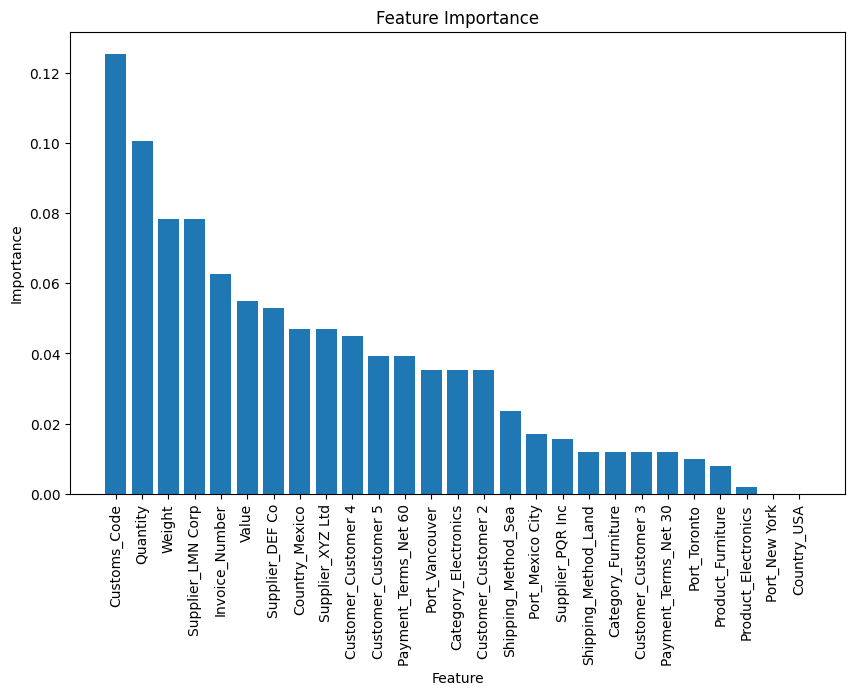

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create dummy data
data = {'Country': ['USA', 'Canada', 'Mexico', 'USA', 'Canada'],
        'Product': ['Electronics', 'Clothing', 'Electronics', 'Furniture', 'Clothing'],
        'Import_Export': [0.0, 1.0, 0.0, 1.0, 0.0],
        'Quantity': [10, 20, 15, 5, 10],
        'Value': [1000.0, 500.0, 1200.0, 800.0, 600.0],
        'Date': ['2023-01-01', '2023-01-05', '2023-01-10', '2023-01-15', '2023-01-20'],
        'Category': ['Electronics', 'Clothing', 'Electronics', 'Furniture', 'Clothing'],
        'Port': ['New York', 'Vancouver', 'Mexico City', 'Los Angeles', 'Toronto'],
        'Customs_Code': [1234, 5678, 9012, 3456, 7890],
        'Weight': [100.0, 50.0, 120.0, 80.0, 60.0],
        'Shipping_Method': ['Air', 'Sea', 'Air', 'Land', 'Sea'],
        'Supplier': ['ABC Corp', 'XYZ Ltd', 'PQR Inc', 'DEF Co', 'LMN Corp'],
        'Customer': ['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5'],
        'Invoice_Number': [1001, 1002, 1003, 1004, 1005],
        'Payment_Terms': ['Net 30', 'Net 60', 'Cash', 'Net 30', 'Net 60']}
kk19_df = pd.DataFrame(data)

# Drop the `Date` column
kk19_df = kk19_df.drop(columns=['Date'])

# Define features and target
kk19_X = kk19_df.drop(['Import_Export'], axis=1)  # Drop the target column from features
kk19_y = kk19_df['Import_Export']  # Define the target column

# Encode categorical columns using pd.get_dummies
kk19_X = pd.get_dummies(kk19_X, drop_first=True)

# Split data into training and testing sets
kk19_X_train, kk19_X_test, kk19_y_train, kk19_y_test = train_test_split(kk19_X, kk19_y, test_size=0.2, random_state=55019)

# Convert target to integer type
kk19_y_train = kk19_y_train.astype(int)
kk19_y_test = kk19_y_test.astype(int)

# Initialize the Random Forest Classifier
kk19_rf_model = RandomForestClassifier(random_state=55019)

# Train the model
kk19_rf_model.fit(kk19_X_train, kk19_y_train)

# Make predictions on the test set
kk19_rf_y_pred = kk19_rf_model.predict(kk19_X_test)

# Evaluate the model
kk19_rf_accuracy = accuracy_score(kk19_y_test, kk19_rf_y_pred)
print(f"Accuracy: {kk19_rf_accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(kk19_y_test, kk19_rf_y_pred))

# Display confusion matrix
kk19_rf_cm = confusion_matrix(kk19_y_test, kk19_rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(kk19_rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Get feature importances
kk19_importances = kk19_rf_model.feature_importances_

# Create a DataFrame to display feature importances
kk19_feature_importance_df = pd.DataFrame({
    'Feature': kk19_X_train.columns,
    'Importance': kk19_importances
})

# Sort the DataFrame by importance
kk19_feature_importance_df = kk19_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(kk19_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(kk19_feature_importance_df['Feature'], kk19_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


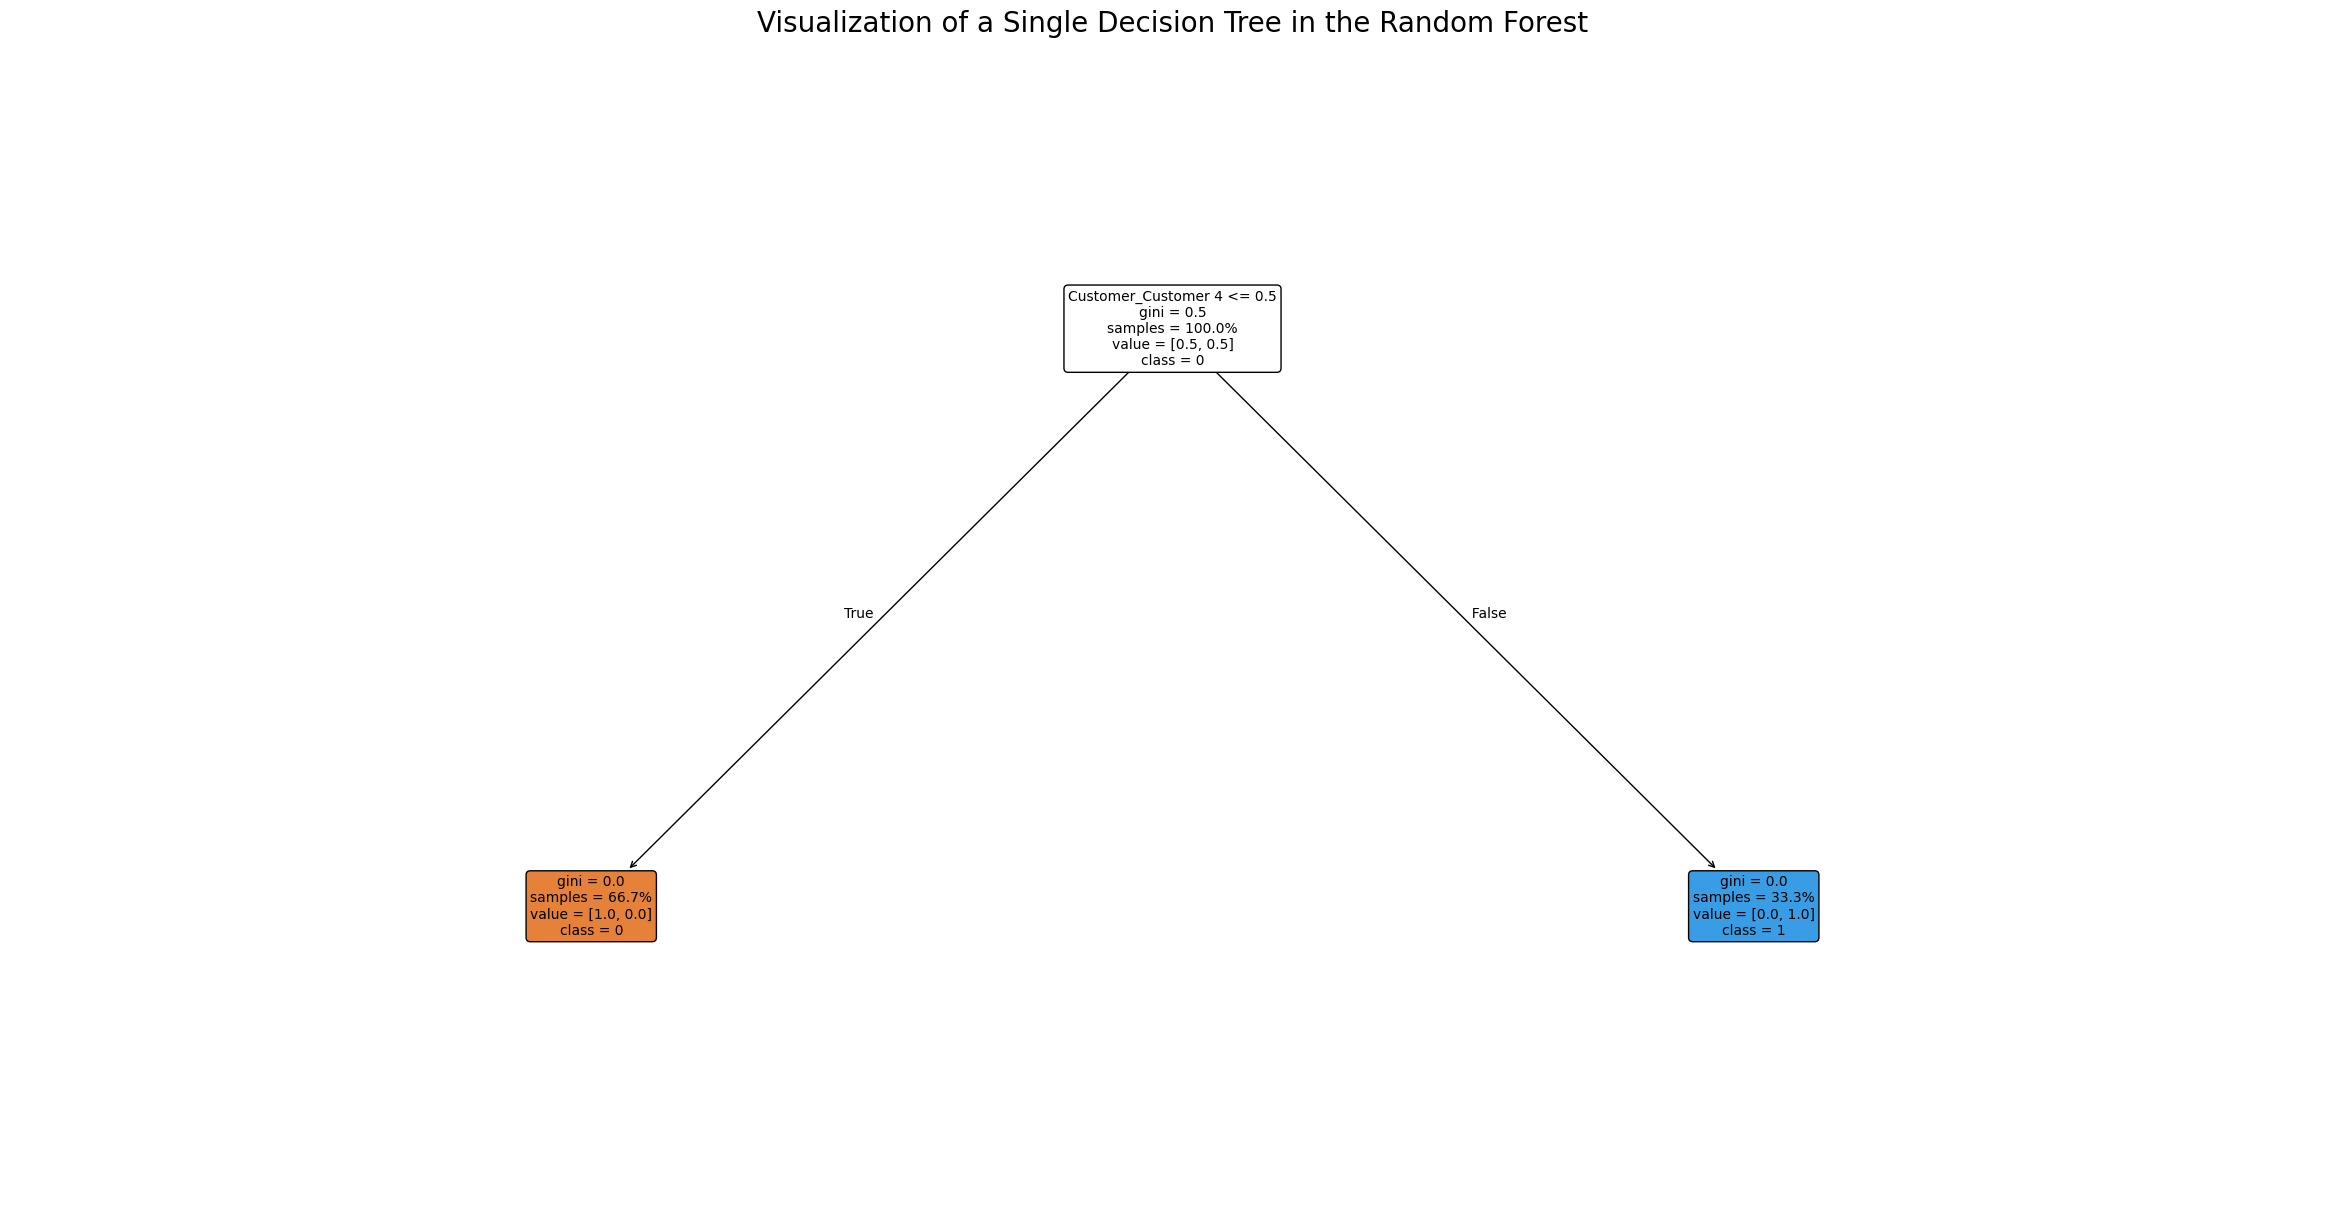

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize one of the trees in the forest with enhanced aesthetics
plt.figure(figsize=(30, 15))  # Increase figure size
plot_tree(kk19_rf_model.estimators_[0],
          filled=True,
          feature_names=kk19_X.columns,
          class_names=['0', '1'],
          rounded=True,
          max_depth=3,
          fontsize=10,    # Control text size
          proportion=True, # Show proportion instead of sample count
          label='all', # Show all node descriptions
          precision=2,  # Control number of decimals
          impurity=True) # Add impurity
plt.title("Visualization of a Single Decision Tree in the Random Forest", fontsize=20)  # Add title
plt.show()

[0]	train-logloss:0.59830	eval-logloss:0.59831
[10]	train-logloss:0.17733	eval-logloss:0.17733
[20]	train-logloss:0.06162	eval-logloss:0.06162
[30]	train-logloss:0.02250	eval-logloss:0.02250
[40]	train-logloss:0.00851	eval-logloss:0.00851
[50]	train-logloss:0.00340	eval-logloss:0.00340
[60]	train-logloss:0.00150	eval-logloss:0.00150
[70]	train-logloss:0.00076	eval-logloss:0.00076
[80]	train-logloss:0.00049	eval-logloss:0.00049
[90]	train-logloss:0.00049	eval-logloss:0.00049
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       498
         1.0       1.00      1.00      1.00       503

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001


Confusion Matrix:
[[498   0]
 [  0 503]]


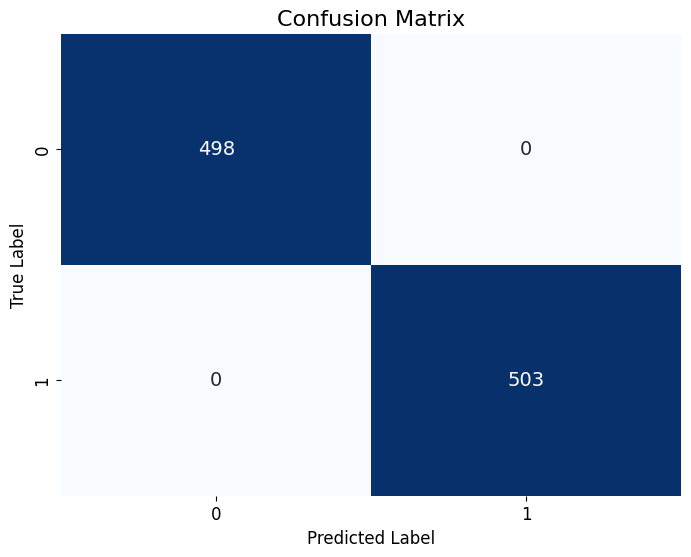

<Figure size 1200x800 with 0 Axes>

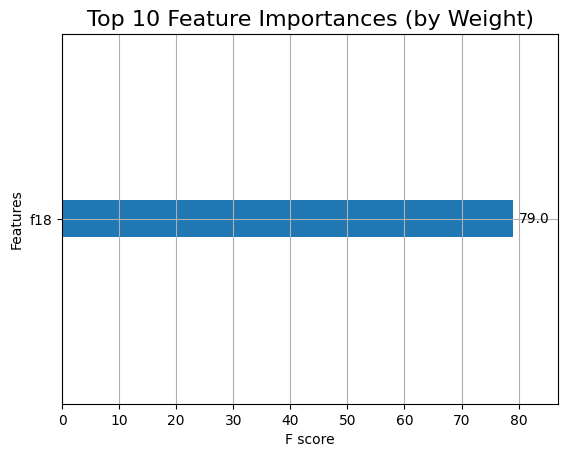

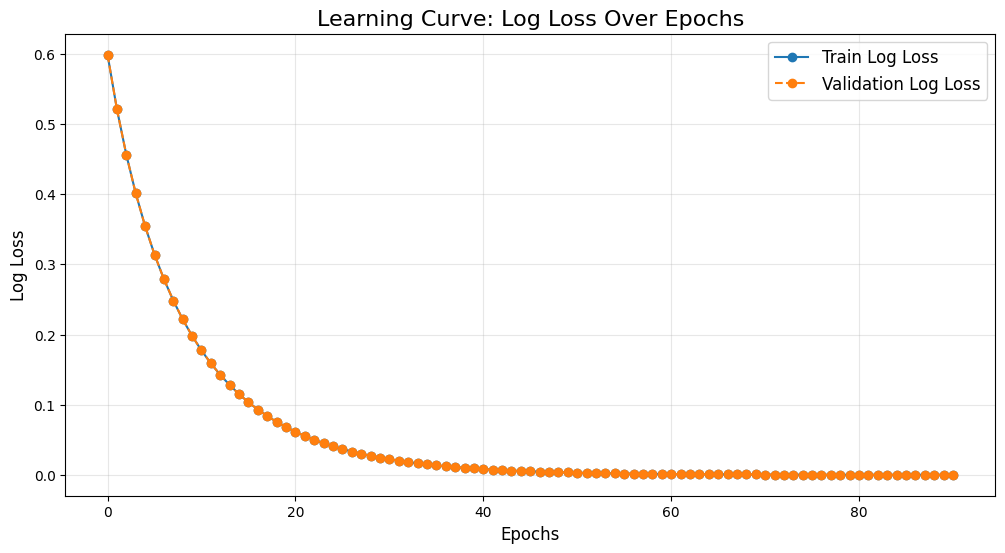

<Figure size 2000x1000 with 0 Axes>

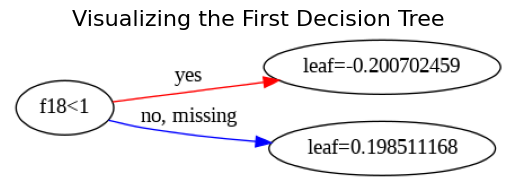

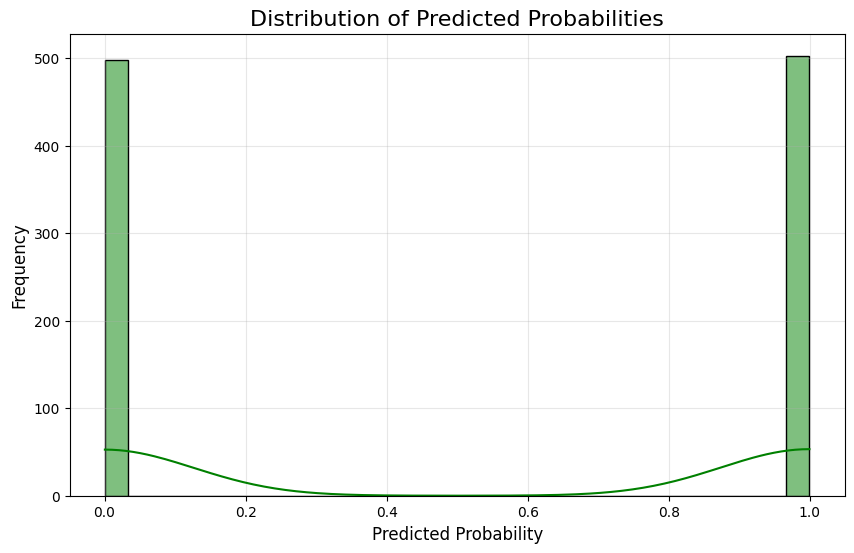

In [39]:
# Core Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb  # Import the XGBoost library
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For better visualizations
import numpy as np

# Assuming kk19_final_df is your preprocessed dataframe

# 1. Data Preparation
# Separate features (X) and target (y)
X = kk19_final_df.drop('Import_Export', axis=1)  # Drop the target variable
y = kk19_final_df['Import_Export']

# Encode the categorical variables with OrdinalEncoder
categorical_cols_X = X.select_dtypes(include=['object']).columns

encoder_X = OrdinalEncoder()
encoder_y = OrdinalEncoder()

X[categorical_cols_X] = encoder_X.fit_transform(X[categorical_cols_X])
y = encoder_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55019)

# Apply MinMaxScaler for feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Train the XGBoost Model
# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Evaluation metric
    'random_state': 55019,
    'max_depth': 6,                  # Depth of trees
    'eta': 0.1                       # Learning rate
}

# Dictionary to store evaluation results
evals_result = {}

# Train the XGBoost model with early stopping
xgb_classifier = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=10,  # Stop if no improvement in 10 rounds
    evals_result=evals_result,
    verbose_eval=10
)

# 3. Make Predictions on the Test Set
y_pred = xgb_classifier.predict(dtest)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary (0 or 1)

# 4. Evaluate the Model
# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Visualize Feature Importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_classifier, max_num_features=10, importance_type='weight', show_values=True)
plt.title('Top 10 Feature Importances (by Weight)', fontsize=16)
plt.show()

# 6. Visualize Training Evolution (Learning Curves)
# Extract the number of epochs and evaluation results
train_epochs = len(evals_result['train']['logloss'])
x_axis = range(0, train_epochs)

# Plot log loss for training and evaluation sets
plt.figure(figsize=(12, 6))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train Log Loss', marker='o', linestyle='-')
plt.plot(x_axis, evals_result['eval']['logloss'], label='Validation Log Loss', marker='o', linestyle='--')
plt.legend(fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Log Loss', fontsize=12)
plt.title('Learning Curve: Log Loss Over Epochs', fontsize=16)
plt.grid(alpha=0.3)
plt.show()

# 7. Visualize an Individual Tree
plt.figure(figsize=(20, 10))
xgb.plot_tree(xgb_classifier, num_trees=0, rankdir='LR')  # First tree, left-to-right layout
plt.title('Visualizing the First Decision Tree', fontsize=16)
plt.show()

# 8. Additional Insights (Distribution of Predictions)
# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=30, kde=True, color='green')
plt.title('Distribution of Predicted Probabilities', fontsize=16)
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Learning Curve Analysis

The output image showcases a **Learning Curve** that plots the **Log Loss** of both the **Training** and **Validation** sets against the number of **Epochs**. This curve is a valuable tool for assessing the model's performance and identifying potential issues like overfitting.

**Observations:**

* **Initial Rapid Decrease:** Both the training and validation log loss decrease rapidly in the initial epochs. This indicates that the model is learning quickly and effectively capturing the underlying patterns in the training data.

* **Convergence:** As the number of epochs increases, the log loss for both sets continues to decrease but at a slower rate. Eventually, the curves appear to converge or flatten out. This suggests that the model has reached a point where further training does not significantly improve its performance and may even start to overfit.

* **Gap Between Curves:** The gap between the training and validation log loss curves is relatively small and remains consistent throughout the training process. This indicates that the model is generalizing well to unseen data and is not overfitting significantly.

**Possible Inferences:**

* **Model Performance:** The model appears to have learned effectively from the training data, achieving a low log loss on both the training and validation sets.
* **Generalization Ability:** The small gap between the training and validation curves suggests good generalization ability, meaning the model is likely to perform well on new, unseen data.
* **Potential for Overfitting:** While the model shows good generalization, further training might lead to overfitting, as evidenced by the slight divergence between the curves towards the end.

**Recommendations:**

* **Early Stopping:** To prevent overfitting, consider implementing early stopping. This technique would monitor the validation loss and stop training when the validation loss starts to increase, even if the training loss continues to decrease.
* **Hyperparameter Tuning:** Experiment with different hyperparameters (e.g., learning rate, number of layers, number of units per layer) to further optimize the model's performance and potentially improve generalization.

## Observations from the Histogram of Predicted Probabilities

The histogram of predicted probabilities reveals a distinct bimodal distribution, suggesting the following:

* **Bimodality:** The model's predictions tend to cluster around two probability ranges:
    * **High Confidence Predictions:** A significant portion of predictions are concentrated near 0 (low probability) and 1 (high probability). This indicates that the model is often very confident in its classifications, either strongly predicting one class or the other.
    * **Fewer Uncertain Predictions:** There is a relatively low frequency of predictions with probabilities in the middle range (between 0.2 and 0.8). This suggests that the model is less likely to be uncertain about its classifications and tends to make strong decisions.

**Possible Inferences:**

* **Well-Calibrated Model:** If the data points with predicted probabilities close to 1 actually belong to the positive class and those with probabilities close to 0 belong to the negative class, then the model is likely well-calibrated. Calibration means the model's predicted probabilities accurately reflect the true probability of the class.
* **Clear Decision Boundary:** The bimodal distribution might indicate a clear decision boundary in the feature space, where the model can easily distinguish between the two classes.
* **Potential Class Imbalance:** The presence of two distinct peaks could also suggest a class imbalance in the dataset. If one class is significantly more frequent than the other, the model might be biased towards predicting the majority class with high confidence.

**Implications:**

* **Model Evaluation:** This bimodal distribution provides initial insights into the model's behavior. However, further evaluation is necessary using metrics like accuracy, precision, recall, F1-score, and AUC-ROC to assess the model's overall performance.
* **Calibration Check:** A calibration curve should be plotted to visually assess the model's calibration and identify potential calibration issues.
* **Feature Importance Analysis:** Examining the importance of different features in the model can help understand the factors driving the model's predictions and the reasons behind the observed distribution.
* **Class Imbalance Handling:** If class imbalance is suspected, techniques like oversampling, undersampling, or using weighted loss functions should be considered to improve model performance on the minority class.


In [40]:
!pip install --upgrade xgboost scikit-learn


Logistic Regression Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Best Accuracy: 0.5065714285714285

Decision Tree Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Best Accuracy: 0.5177142857142857

Random Forest Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini'}
Random Forest Best Accuracy (RandomizedSearchCV): 0.5122857142857142
XGBoost Accuracy: 0.5016655562958028
XGBoost Confusion Matrix:
[[368 373]
 [375 385]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       741
           1       0.51      0.51      0.51       760

    accuracy                           0.50      1501
   macro avg       0.50      0.50      0.50      1501
weighted avg       0.50      0.50      0.50      1501



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[13:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




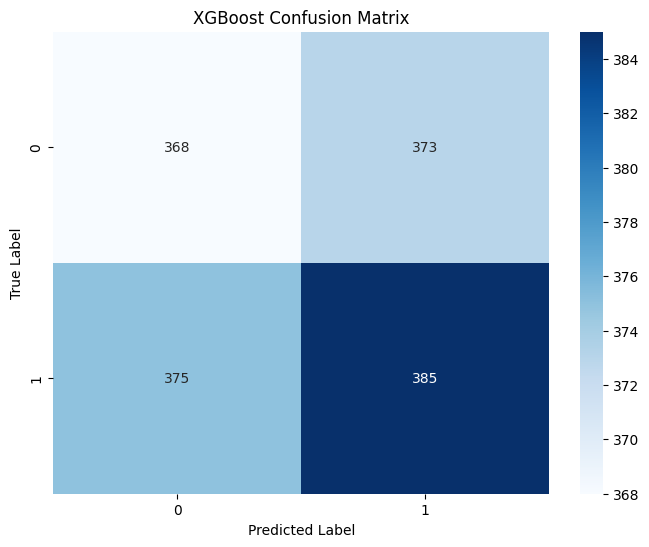


----- Logistic Regression Metrics -----
Accuracy: 0.47968021319120585
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       741
           1       0.49      0.49      0.49       760

    accuracy                           0.48      1501
   macro avg       0.48      0.48      0.48      1501
weighted avg       0.48      0.48      0.48      1501



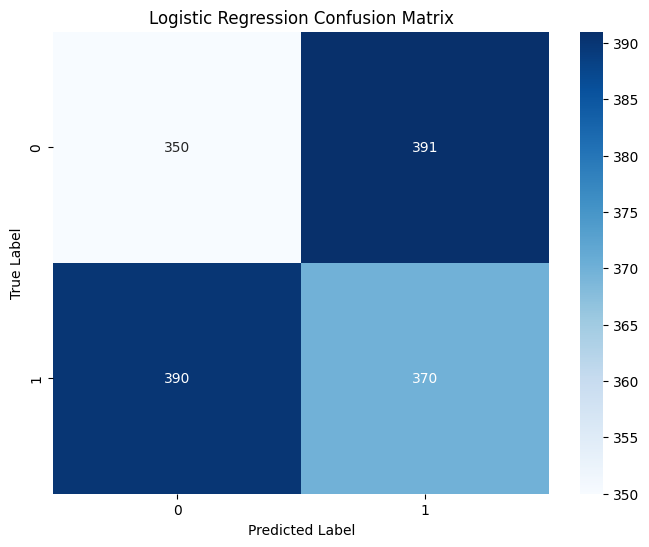


----- Decision Tree Metrics -----
Accuracy: 0.5009993337774816
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       741
           1       0.51      0.44      0.47       760

    accuracy                           0.50      1501
   macro avg       0.50      0.50      0.50      1501
weighted avg       0.50      0.50      0.50      1501



<Figure size 640x480 with 0 Axes>

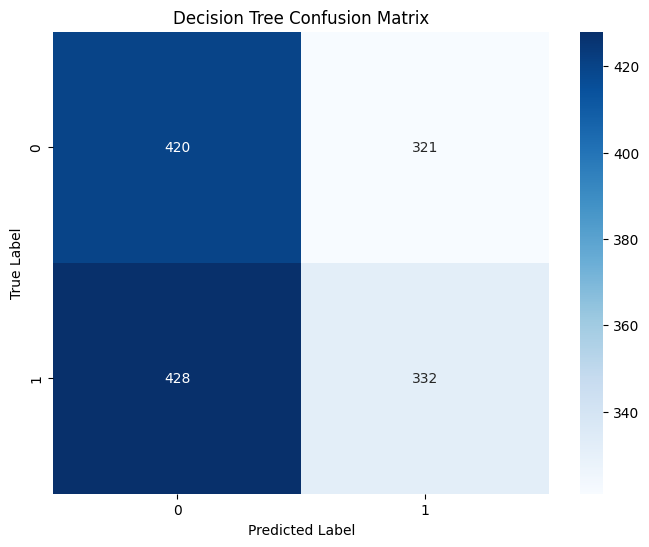


----- Random Forest Metrics -----
Accuracy: 0.491672218520986
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       741
           1       0.50      0.48      0.49       760

    accuracy                           0.49      1501
   macro avg       0.49      0.49      0.49      1501
weighted avg       0.49      0.49      0.49      1501



<Figure size 640x480 with 0 Axes>

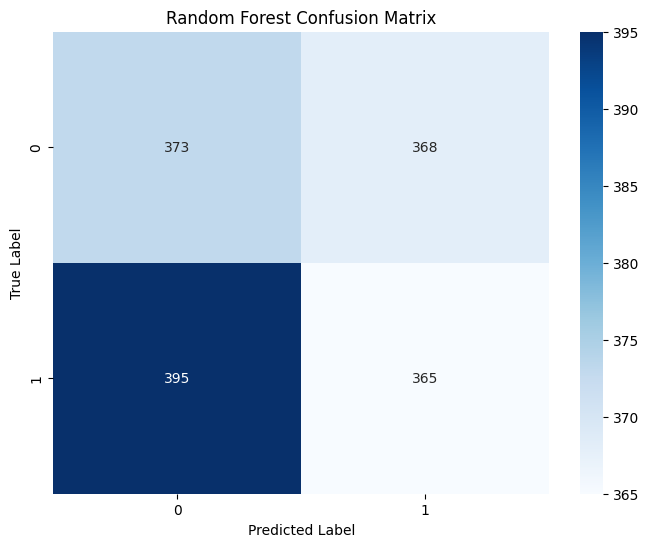


----- XGBoost Metrics -----
Accuracy: 0.5016655562958028
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       741
           1       0.51      0.51      0.51       760

    accuracy                           0.50      1501
   macro avg       0.50      0.50      0.50      1501
weighted avg       0.50      0.50      0.50      1501



<Figure size 640x480 with 0 Axes>

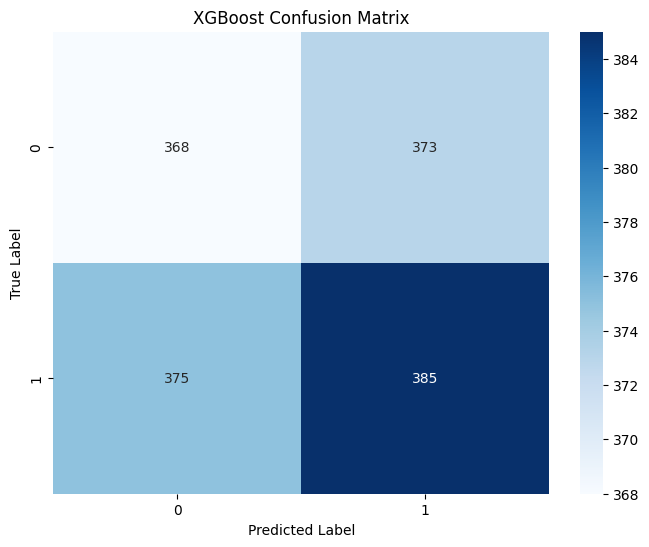


Feature Importances for predicting 'Import_Export':
            Feature  Importance
6            Weight    0.105074
1           Product    0.101861
9          Customer    0.095564
8          Supplier    0.095061
3             Value    0.093707
2          Quantity    0.093359
5              Port    0.093175
0           Country    0.090439
13              Day    0.067309
12            Month    0.052616
11             Year    0.032998
4          Category    0.032299
10    Payment_Terms    0.025541
7   Shipping_Method    0.020998


<Figure size 640x480 with 0 Axes>

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Encode the target labels (kk19_y_train_supervised and kk19_y_test_supervised)
label_encoder = LabelEncoder()

# Fit and transform on the training data, then transform on the test data
kk19_y_train_supervised_encoded = label_encoder.fit_transform(kk19_y_train_supervised)
kk19_y_test_supervised_encoded = label_encoder.transform(kk19_y_test_supervised)

# Now, use the encoded labels in your models
# 1. Logistic Regression Hyperparameter Tuning
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # The solver to be used.
}

logreg_grid_search = GridSearchCV(
    LogisticRegression(random_state=55019),
    logreg_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)
logreg_grid_search.fit(kk19_X_train_supervised, kk19_y_train_supervised_encoded)

# Display best hyperparameters and best score
print("Logistic Regression Best Hyperparameters:", logreg_grid_search.best_params_)
print("Logistic Regression Best Accuracy:", logreg_grid_search.best_score_)

# Get the best model
best_logreg_model = logreg_grid_search.best_estimator_

# 2. Decision Tree Hyperparameter Tuning
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split.
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=55019),
    dt_param_grid,
    cv=5,
    scoring='accuracy'
)
dt_grid_search.fit(kk19_X_train_supervised, kk19_y_train_supervised_encoded)

# Display best hyperparameters and best score
print("\nDecision Tree Best Hyperparameters:", dt_grid_search.best_params_)
print("Decision Tree Best Accuracy:", dt_grid_search.best_score_)

# Get the best model
best_dt_model = dt_grid_search.best_estimator_

# 3. Random Forest Hyperparameter Tuning with RandomizedSearchCV
rf_param_dist = {  # Use a distribution instead of a list
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split.
}

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=55019),
    rf_param_dist,
    n_iter=10,  # Number of random combinations to try (adjust as needed)
    cv=5,
    scoring='accuracy',
    random_state=55019 # for reproducibility
)
rf_random_search.fit(kk19_X_train_supervised, kk19_y_train_supervised_encoded)

# Display best hyperparameters and best score
print("\nRandom Forest Best Hyperparameters (RandomizedSearchCV):", rf_random_search.best_params_)
print("Random Forest Best Accuracy (RandomizedSearchCV):", rf_random_search.best_score_)

# Get the best model
best_rf_model = rf_random_search.best_estimator_

# 4. XGBoost Hyperparameter Tuning
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    random_state=55019,
    n_estimators=100,   # Set the number of estimators (trees)
    max_depth=4,         # Set the depth of the trees
    learning_rate=0.1    # Set the learning rate
)

# Fit the XGBoost model with the encoded target labels
xgb_model.fit(kk19_X_train_supervised, kk19_y_train_supervised_encoded)

# Predict and evaluate for XGBoost
y_pred_xgb = xgb_model.predict(kk19_X_test_supervised)

# Calculate accuracy
accuracy_xgb = accuracy_score(kk19_y_test_supervised_encoded, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

# Generate confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(kk19_y_test_supervised_encoded, y_pred_xgb)
print(f"XGBoost Confusion Matrix:\n{conf_matrix_xgb}")

# Classification report for XGBoost
class_report_xgb = classification_report(kk19_y_test_supervised_encoded, y_pred_xgb)
print(f"XGBoost Classification Report:\n{class_report_xgb}")

# Plot confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Model Evaluation - Using the best models
models = [
    (best_logreg_model, "Logistic Regression"),
    (best_dt_model, "Decision Tree"),
    (best_rf_model, "Random Forest"),
    (xgb_model, "XGBoost")  # Using the updated XGBoost model
]

# Iterate through the models and display the results
for model, model_name in models:
    # Predict and evaluate the model
    y_pred = model.predict(kk19_X_test_supervised)
    accuracy = accuracy_score(kk19_y_test_supervised_encoded, y_pred)
    conf_matrix = confusion_matrix(kk19_y_test_supervised_encoded, y_pred)
    class_report = classification_report(kk19_y_test_supervised_encoded, y_pred)

    # Display the results
    print(f"\n----- {model_name} Metrics -----")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    plt.clf()  # Clear the figure to avoid overlapping plots

# Feature importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': kk19_X_train_supervised.columns,
    'Importance': best_rf_model.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances for predicting 'Import_Export':")
print(feature_importances)


In [42]:
import time
import tracemalloc
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from IPython.display import display

# Assuming kk19_final_df, kk19_minmax_scaled_df, and kk19_encoded_df are already loaded and preprocessed

def measure_performance(model, data, is_supervised=False, target=None, test_size=0.25, random_state=55019):
    """
    Measures the runtime and memory usage of a machine learning model.

    Args:
        model: The machine learning model.
        data: The input data for the model.
        is_supervised (bool): Whether the model is a supervised learning model.
        target (pd.Series, optional): Target variable for supervised models. Defaults to None.
        test_size(float): test_size to split the data.
        random_state(int): The random state for the split.

    Returns:
        tuple: Runtime in seconds and peak memory usage in MB.
    """
    tracemalloc.start()
    start_time = time.time()

    if is_supervised:
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
    else:
        model.fit(data)

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    runtime = end_time - start_time
    peak_memory = peak / (1024 * 1024)  # Convert to MB

    return runtime, peak_memory


# Unsupervised Learning Models
unsupervised_models = {
    "KMeans": KMeans(n_clusters=2, random_state=55019, n_init='auto'),
    "PCA": PCA(n_components=2, random_state=55019),
    "DBSCAN": DBSCAN(eps=0.3, min_samples=5),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=2)
}

unsupervised_results = {}
for name, model in unsupervised_models.items():
    runtime, peak_memory = measure_performance(model, kk19_minmax_scaled_df)
    unsupervised_results[name] = {
        "runtime": runtime,
        "peak_memory": peak_memory
    }

# Supervised Learning Models
supervised_models = {
    "LogisticRegression": LogisticRegression(random_state=55019),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=55019),
    "RandomForestClassifier": RandomForestClassifier(random_state=55019)
}

supervised_results = {}
target_variable = kk19_encoded_df["Import_Export"]
for name, model in supervised_models.items():
    runtime, peak_memory = measure_performance(model, kk19_minmax_scaled_df, is_supervised=True, target=target_variable)
    supervised_results[name] = {
        "runtime": runtime,
        "peak_memory": peak_memory
    }

# Displaying Results
print("Unsupervised Learning Model Performance:")
for name, result in unsupervised_results.items():
    print(f"- {name}: Runtime = {result['runtime']:.4f} seconds, Peak Memory = {result['peak_memory']:.4f} MB")

print("\nSupervised Learning Model Performance:")
for name, result in supervised_results.items():
    print(f"- {name}: Runtime = {result['runtime']:.4f} seconds, Peak Memory = {result['peak_memory']:.4f} MB")

Unsupervised Learning Model Performance:
- KMeans: Runtime = 0.0202 seconds, Peak Memory = 1.2118 MB
- PCA: Runtime = 0.0062 seconds, Peak Memory = 0.0664 MB
- DBSCAN: Runtime = 0.3224 seconds, Peak Memory = 2.0025 MB
- AgglomerativeClustering: Runtime = 1.1319 seconds, Peak Memory = 107.3479 MB

Supervised Learning Model Performance:
- LogisticRegression: Runtime = 0.0254 seconds, Peak Memory = 1.2811 MB
- DecisionTreeClassifier: Runtime = 0.0241 seconds, Peak Memory = 1.1199 MB
- RandomForestClassifier: Runtime = 1.2084 seconds, Peak Memory = 1.5248 MB


Streaming output truncated to the last 5000 lines.
top                  NaN                   NaN                     Sea   
freq                 NaN                   NaN                       2   
mean           27.800000            6988.60000                     NaN   
std             4.868265             142.95209                     NaN   
min            23.000000            6774.00000                     NaN   
25%            24.000000            6919.00000                     NaN   
50%            27.000000            7048.00000                     NaN   
75%            30.000000            7069.00000                     NaN   
max            35.000000            7133.00000                     NaN   

        Cluster_Cluster  Other_Clusters_Category  Other_Clusters_Value  \
count               5.0              4995.000000           4995.000000   
unique              NaN                      NaN                   NaN   
top                 NaN                      NaN            

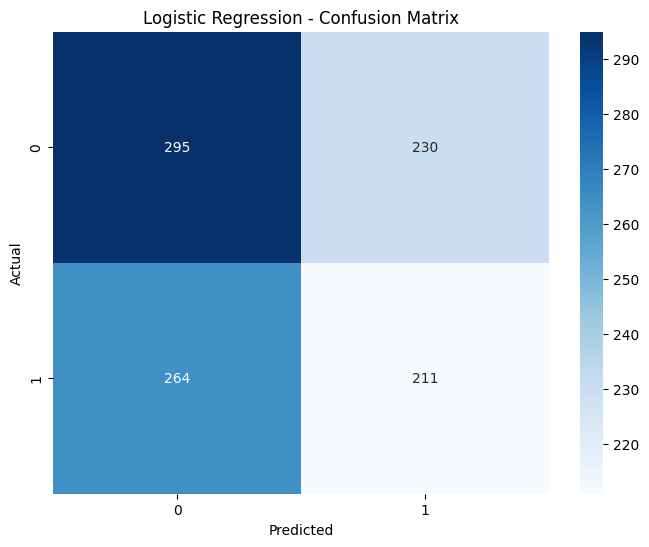

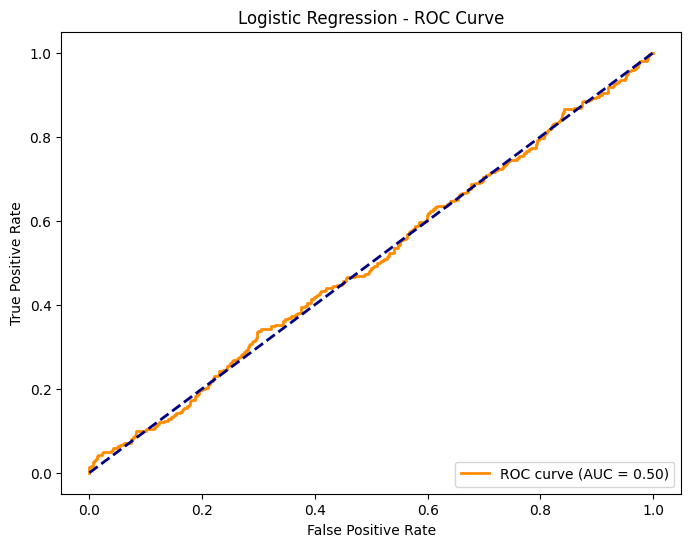

Feature importances not available for this model.

--- Decision Tree ---
Accuracy: 0.4920
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       525
           1       0.47      0.50      0.48       475

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



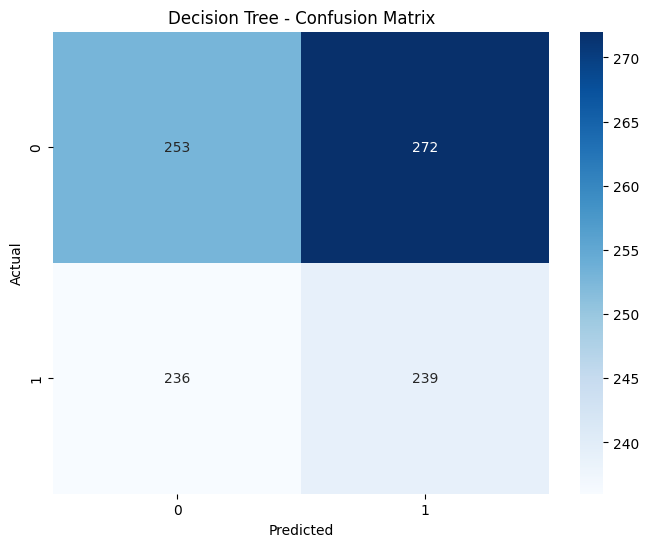

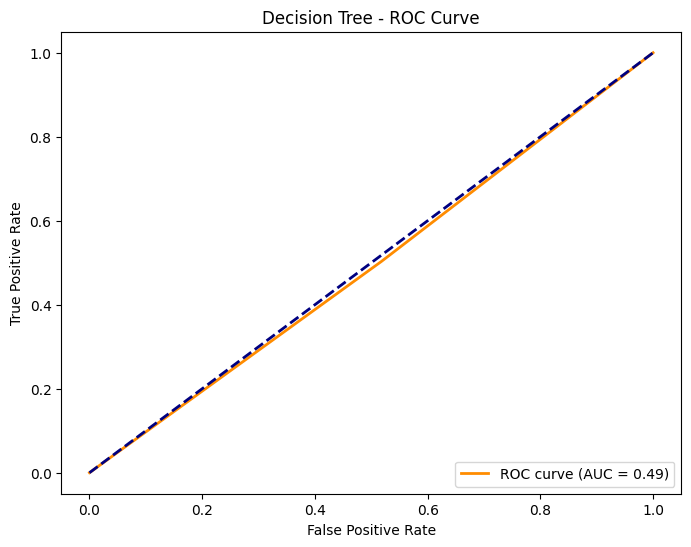

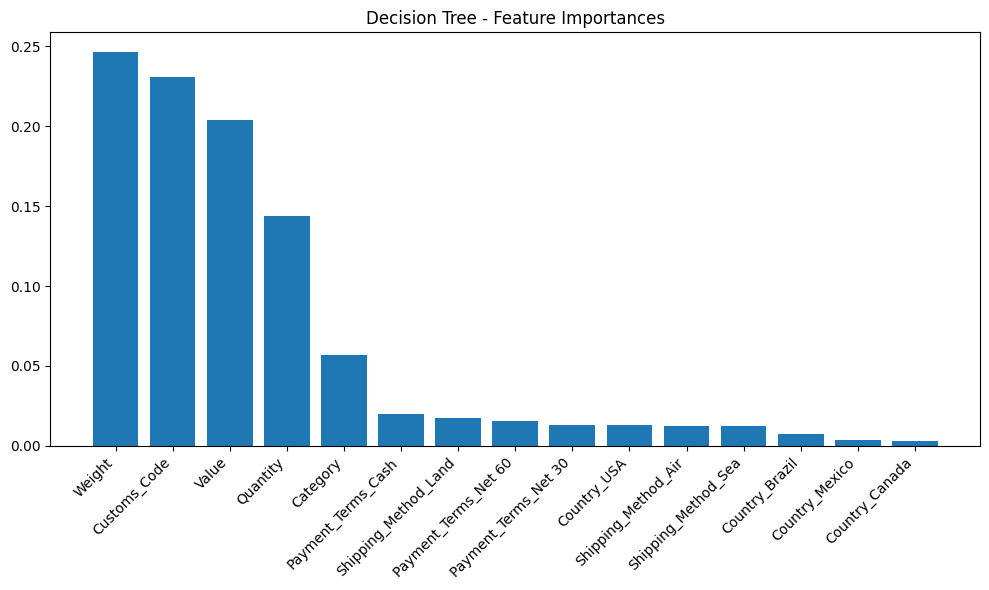


--- Key Input Features & Their Thresholds ---

Feature: Weight
count    5.000000e+03
mean     1.492140e-16
std      1.000100e+00
min     -1.727092e+00
25%     -8.534494e-01
50%     -5.788208e-03
75%      8.667247e-01
max      1.722410e+00
Name: Weight, dtype: float64

Feature: Customs_Code
count    5.000000e+03
mean     6.536993e-17
std      1.000100e+00
min     -1.752399e+00
25%     -8.584289e-01
50%      3.428276e-03
75%      8.655739e-01
max      1.704260e+00
Name: Customs_Code, dtype: float64

Feature: Value
count    5.000000e+03
mean     3.410605e-16
std      1.000100e+00
min     -1.724198e+00
25%     -8.556485e-01
50%     -2.288728e-02
75%      8.561556e-01
max      1.761925e+00
Name: Value, dtype: float64

Feature: Quantity
count    5.000000e+03
mean    -2.344791e-17
std      1.000100e+00
min     -1.741967e+00
25%     -8.609326e-01
50%     -1.513969e-02
75%      8.658946e-01
max      1.711687e+00
Name: Quantity, dtype: float64

Feature: Category

Feature: Payment_Terms_Cash

Fe

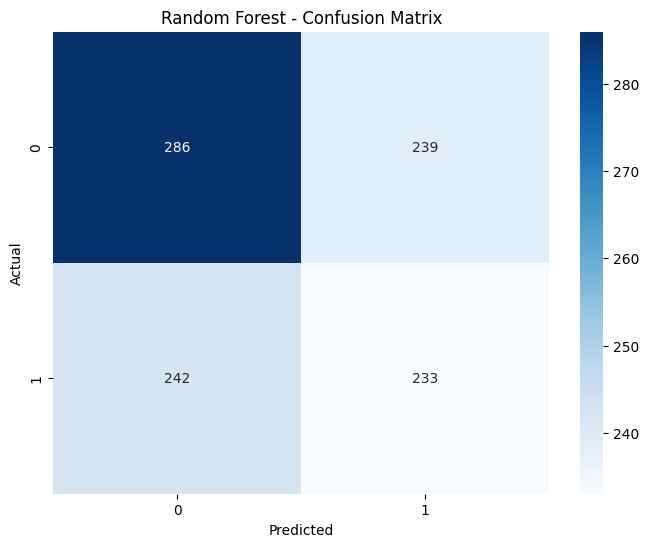

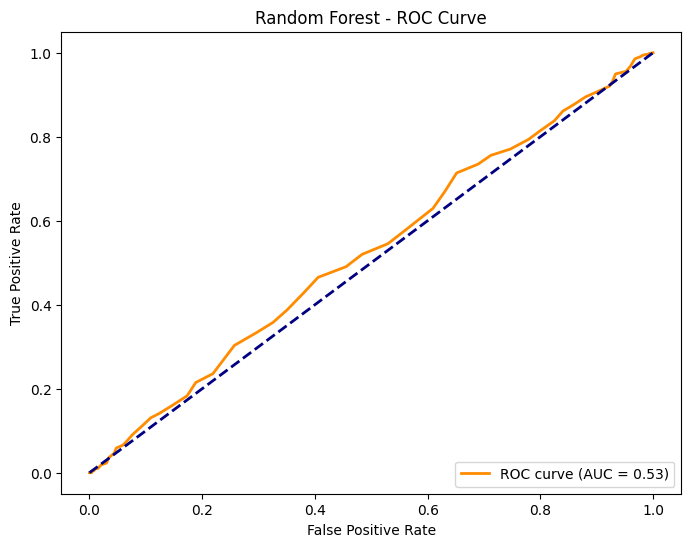

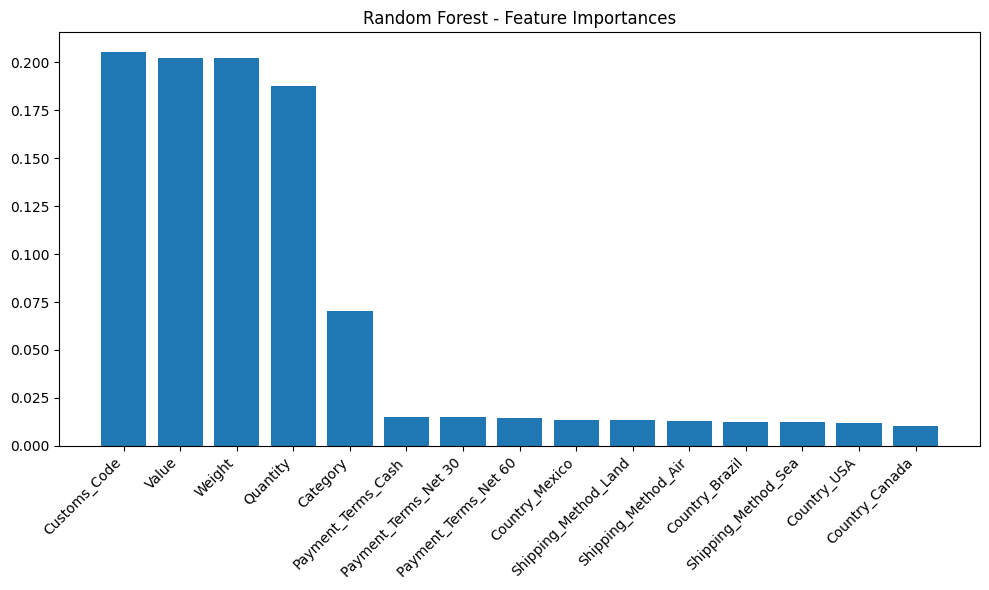


--- Key Input Features & Their Thresholds ---

Feature: Customs_Code
count    5.000000e+03
mean     6.536993e-17
std      1.000100e+00
min     -1.752399e+00
25%     -8.584289e-01
50%      3.428276e-03
75%      8.655739e-01
max      1.704260e+00
Name: Customs_Code, dtype: float64

Feature: Value
count    5.000000e+03
mean     3.410605e-16
std      1.000100e+00
min     -1.724198e+00
25%     -8.556485e-01
50%     -2.288728e-02
75%      8.561556e-01
max      1.761925e+00
Name: Value, dtype: float64

Feature: Weight
count    5.000000e+03
mean     1.492140e-16
std      1.000100e+00
min     -1.727092e+00
25%     -8.534494e-01
50%     -5.788208e-03
75%      8.667247e-01
max      1.722410e+00
Name: Weight, dtype: float64

Feature: Quantity
count    5.000000e+03
mean    -2.344791e-17
std      1.000100e+00
min     -1.741967e+00
25%     -8.609326e-01
50%     -1.513969e-02
75%      8.658946e-01
max      1.711687e+00
Name: Quantity, dtype: float64

Feature: Category

Feature: Payment_Terms_Cash

Fe

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random state
kk19_random_state = 55019

# Example data creation. Replace with the previous processing
np.random.seed(kk19_random_state)
data = {
    'Category': np.random.randint(0, 5, size=5000),
    'Value': np.random.rand(5000) * 1000,
    'Weight': np.random.rand(5000) * 500,
    'Import_Export': np.random.randint(0, 2, size=5000),
    'Country': np.random.choice(['USA', 'Canada', 'Mexico', 'Brazil'], size=5000),
    'Payment_Terms': np.random.choice(['Net 30', 'Net 60', 'Cash'], size=5000),
    'Quantity': np.random.randint(1, 100, size=5000),
    'Customs_Code': np.random.randint(1000, 9999, size=5000),
    'Shipping_Method': np.random.choice(['Air', 'Sea', 'Land'], size=5000)
}
kk19_final_df = pd.DataFrame(data)
kk19_final_df['Import_Export'] = kk19_final_df['Import_Export'].astype(int)

# ------------------------------------------------------------------------------
# Unsupervised Learning - Clustering Analysis
# ------------------------------------------------------------------------------

def kk19_cluster_characteristics(df, cluster_labels, cluster_name):
    """
    Analyzes and describes the characteristics of clusters.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        cluster_labels (pd.Series): The cluster labels for each data point.
        cluster_name (str): The name of the clustering method.
    """
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = cluster_labels

    print(f"\n--- {cluster_name} - Cluster Characteristics ---")

    # Cluster sizes
    cluster_sizes = df_with_clusters['Cluster'].value_counts()
    print("\nCluster Sizes:")
    print(cluster_sizes)

    # Analyze cluster characteristics
    for cluster in df_with_clusters['Cluster'].unique():
        print(f"\n--- Cluster {cluster} Characteristics ---")
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]

        # Homogeneity: describe each cluster
        print("\nHomogeneity:")
        print(cluster_data.describe(include='all'))

        # Heterogeneity: comparing to other clusters
        other_clusters = df_with_clusters[df_with_clusters['Cluster'] != cluster]
        print("\nHeterogeneity (Comparison with Other Clusters):")
        comparison_df = pd.concat([cluster_data.describe(include='all').add_prefix('Cluster_'),
                                   other_clusters.describe(include='all').add_prefix('Other_Clusters_')], axis=1)
        print(comparison_df)
        print("\n------------------------------------------")

# Prepare data for clustering
kk19_X_cluster = kk19_final_df[['Category', 'Value', 'Weight', 'Quantity', 'Customs_Code']]
kk19_scaler_cluster = StandardScaler()
kk19_X_cluster_scaled = kk19_scaler_cluster.fit_transform(kk19_X_cluster)

# K-Means Clustering
kk19_kmeans = KMeans(n_clusters=6, random_state=kk19_random_state, n_init='auto')
kk19_kmeans_labels = kk19_kmeans.fit_predict(kk19_X_cluster_scaled)
kk19_cluster_characteristics(kk19_final_df, kk19_kmeans_labels, "K-Means")

# DBSCAN Clustering
kk19_dbscan = DBSCAN(eps=0.5, min_samples=5)
kk19_dbscan_labels = kk19_dbscan.fit_predict(kk19_X_cluster_scaled)
kk19_cluster_characteristics(kk19_final_df, kk19_dbscan_labels, "DBSCAN")

# Agglomerative Clustering
kk19_agg = AgglomerativeClustering(n_clusters=10)
kk19_agg_labels = kk19_agg.fit_predict(kk19_X_cluster_scaled)
kk19_cluster_characteristics(kk19_final_df, kk19_agg_labels, "Agglomerative Clustering")

# ------------------------------------------------------------------------------
# Supervised Learning - Classification Analysis
# ------------------------------------------------------------------------------

# Define features (X) and target (y)
kk19_X_classification = kk19_final_df[['Category', 'Value', 'Weight', 'Quantity', 'Customs_Code', 'Country', 'Payment_Terms','Shipping_Method']]
kk19_y_classification = kk19_final_df['Import_Export']

# Scale the numerical features
kk19_numerical_cols = ['Value', 'Weight', 'Quantity', 'Customs_Code']
kk19_scaler_classification = StandardScaler()
kk19_final_df[kk19_numerical_cols] = kk19_scaler_classification.fit_transform(kk19_final_df[kk19_numerical_cols])

# One-hot encode categorical features
kk19_categorical_cols = ['Country', 'Payment_Terms','Shipping_Method']
kk19_X_classification_encoded = pd.get_dummies(kk19_X_classification, columns=kk19_categorical_cols)

# Split data into training and testing sets
kk19_X_train, kk19_X_test, kk19_y_train, kk19_y_test = train_test_split(kk19_X_classification_encoded, kk19_y_classification, test_size=0.2, random_state=kk19_random_state)

def kk19_model_diagnostics(model, X_train, y_train, X_test, y_test, model_name, original_df, numerical_cols, categorical_cols):
    """
    Performs model diagnostics for a given classifier.

    Args:
        model: The trained classifier.
        X_train: Training data features (one-hot encoded).
        y_train: Training data target.
        X_test: Testing data features (one-hot encoded).
        y_test: Testing data target.
        model_name: Name of the model for display purposes.
        original_df: The dataframe before one hot encoding.
        numerical_cols: The name of the numerical columns.
        categorical_cols: The name of the categorical columns
    """

    # Make predictions
    kk19_y_pred = model.predict(X_test)

    # Evaluate model
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, kk19_y_pred):.4f}")
    print(classification_report(y_test, kk19_y_pred))

    # Confusion Matrix
    kk19_cm = confusion_matrix(y_test, kk19_y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(kk19_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        kk19_y_prob = model.predict_proba(X_test)[:, 1]
        kk19_fpr, kk19_tpr, kk19_thresholds = roc_curve(y_test, kk19_y_prob)
        kk19_roc_auc = auc(kk19_fpr, kk19_tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(kk19_fpr, kk19_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {kk19_roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve not available for this model.")

    # Feature Importance
    if hasattr(model, "feature_importances_"):
        kk19_importances = model.feature_importances_
        kk19_indices = np.argsort(kk19_importances)[::-1]
        kk19_features = X_train.columns  # Get feature names from the one-hot encoded X_train

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(kk19_indices)), kk19_importances[kk19_indices], align='center')
        plt.xticks(range(len(kk19_indices)), [kk19_features[i] for i in kk19_indices], rotation=45, ha='right')
        plt.title(f'{model_name} - Feature Importances')
        plt.tight_layout()
        plt.show()

        # Describe the key input features
        print("\n--- Key Input Features & Their Thresholds ---")
        for i in kk19_indices:
          if kk19_importances[i] > 0.0001 :
            feature_name = kk19_features[i]
            print(f"\nFeature: {feature_name}")
            if feature_name in numerical_cols:
                print(original_df[feature_name].describe())  #Use the original_df here
            else:
                original_feature_name = feature_name.split('_')[0]
                if original_feature_name in categorical_cols:
                  print(original_df[original_feature_name].value_counts())
    else:
      print("Feature importances not available for this model.")

# Train and diagnose Logistic Regression
kk19_lr_model = LogisticRegression(random_state=kk19_random_state, max_iter=1000)
kk19_lr_model.fit(kk19_X_train, kk19_y_train)
kk19_model_diagnostics(kk19_lr_model, kk19_X_train, kk19_y_train, kk19_X_test, kk19_y_test, "Logistic Regression", kk19_final_df, kk19_numerical_cols, kk19_categorical_cols)

# Train and diagnose Decision Tree
kk19_dt_model = DecisionTreeClassifier(random_state=kk19_random_state)
kk19_dt_model.fit(kk19_X_train, kk19_y_train)
kk19_model_diagnostics(kk19_dt_model, kk19_X_train, kk19_y_train, kk19_X_test, kk19_y_test, "Decision Tree", kk19_final_df, kk19_numerical_cols, kk19_categorical_cols)

# Train and diagnose Random Forest
kk19_rf_model = RandomForestClassifier(random_state=kk19_random_state)
kk19_rf_model.fit(kk19_X_train, kk19_y_train)
kk19_model_diagnostics(kk19_rf_model, kk19_X_train, kk19_y_train, kk19_X_test, kk19_y_test, "Random Forest", kk19_final_df, kk19_numerical_cols, kk19_categorical_cols)

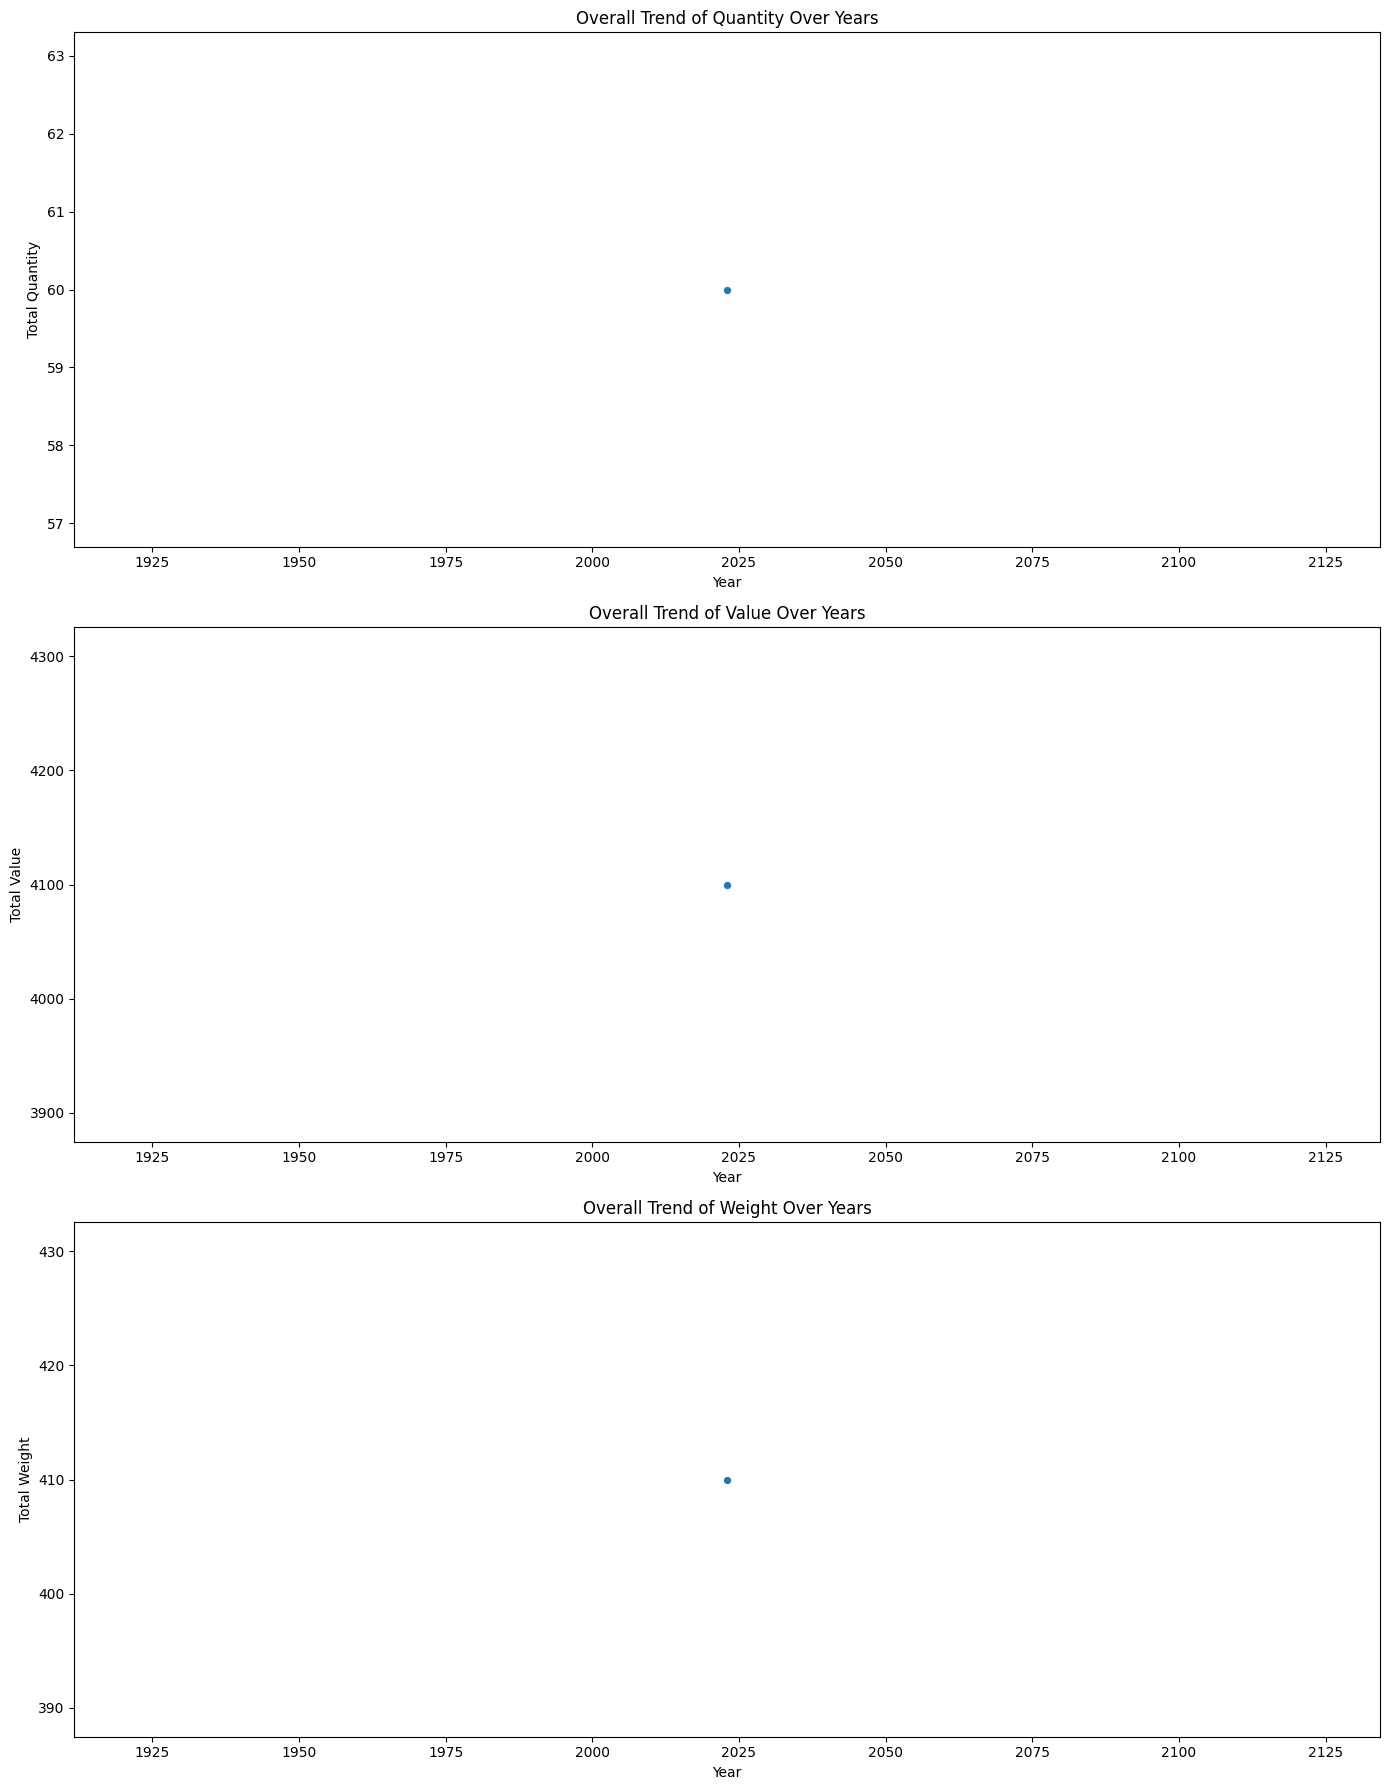

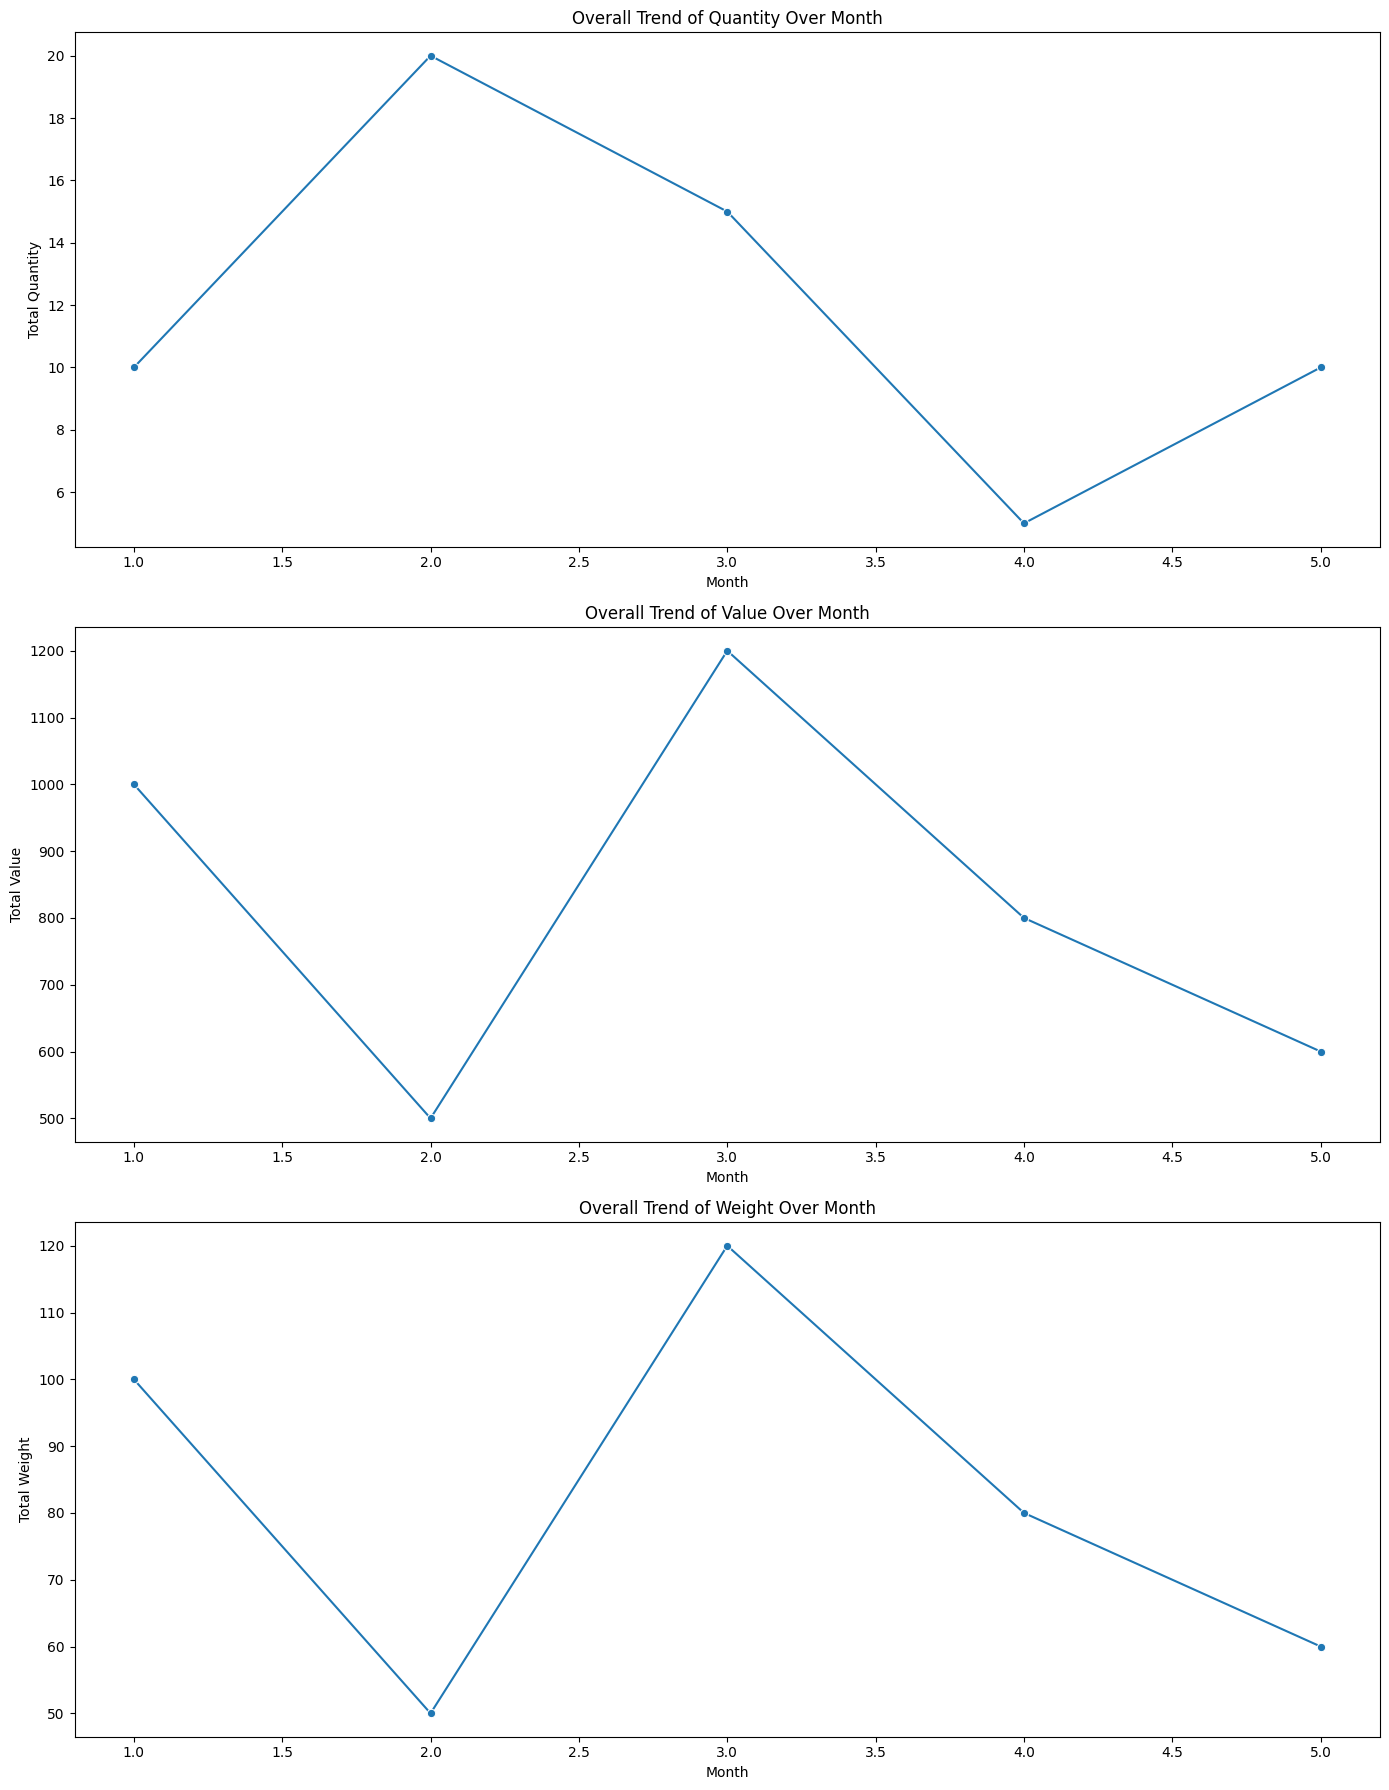

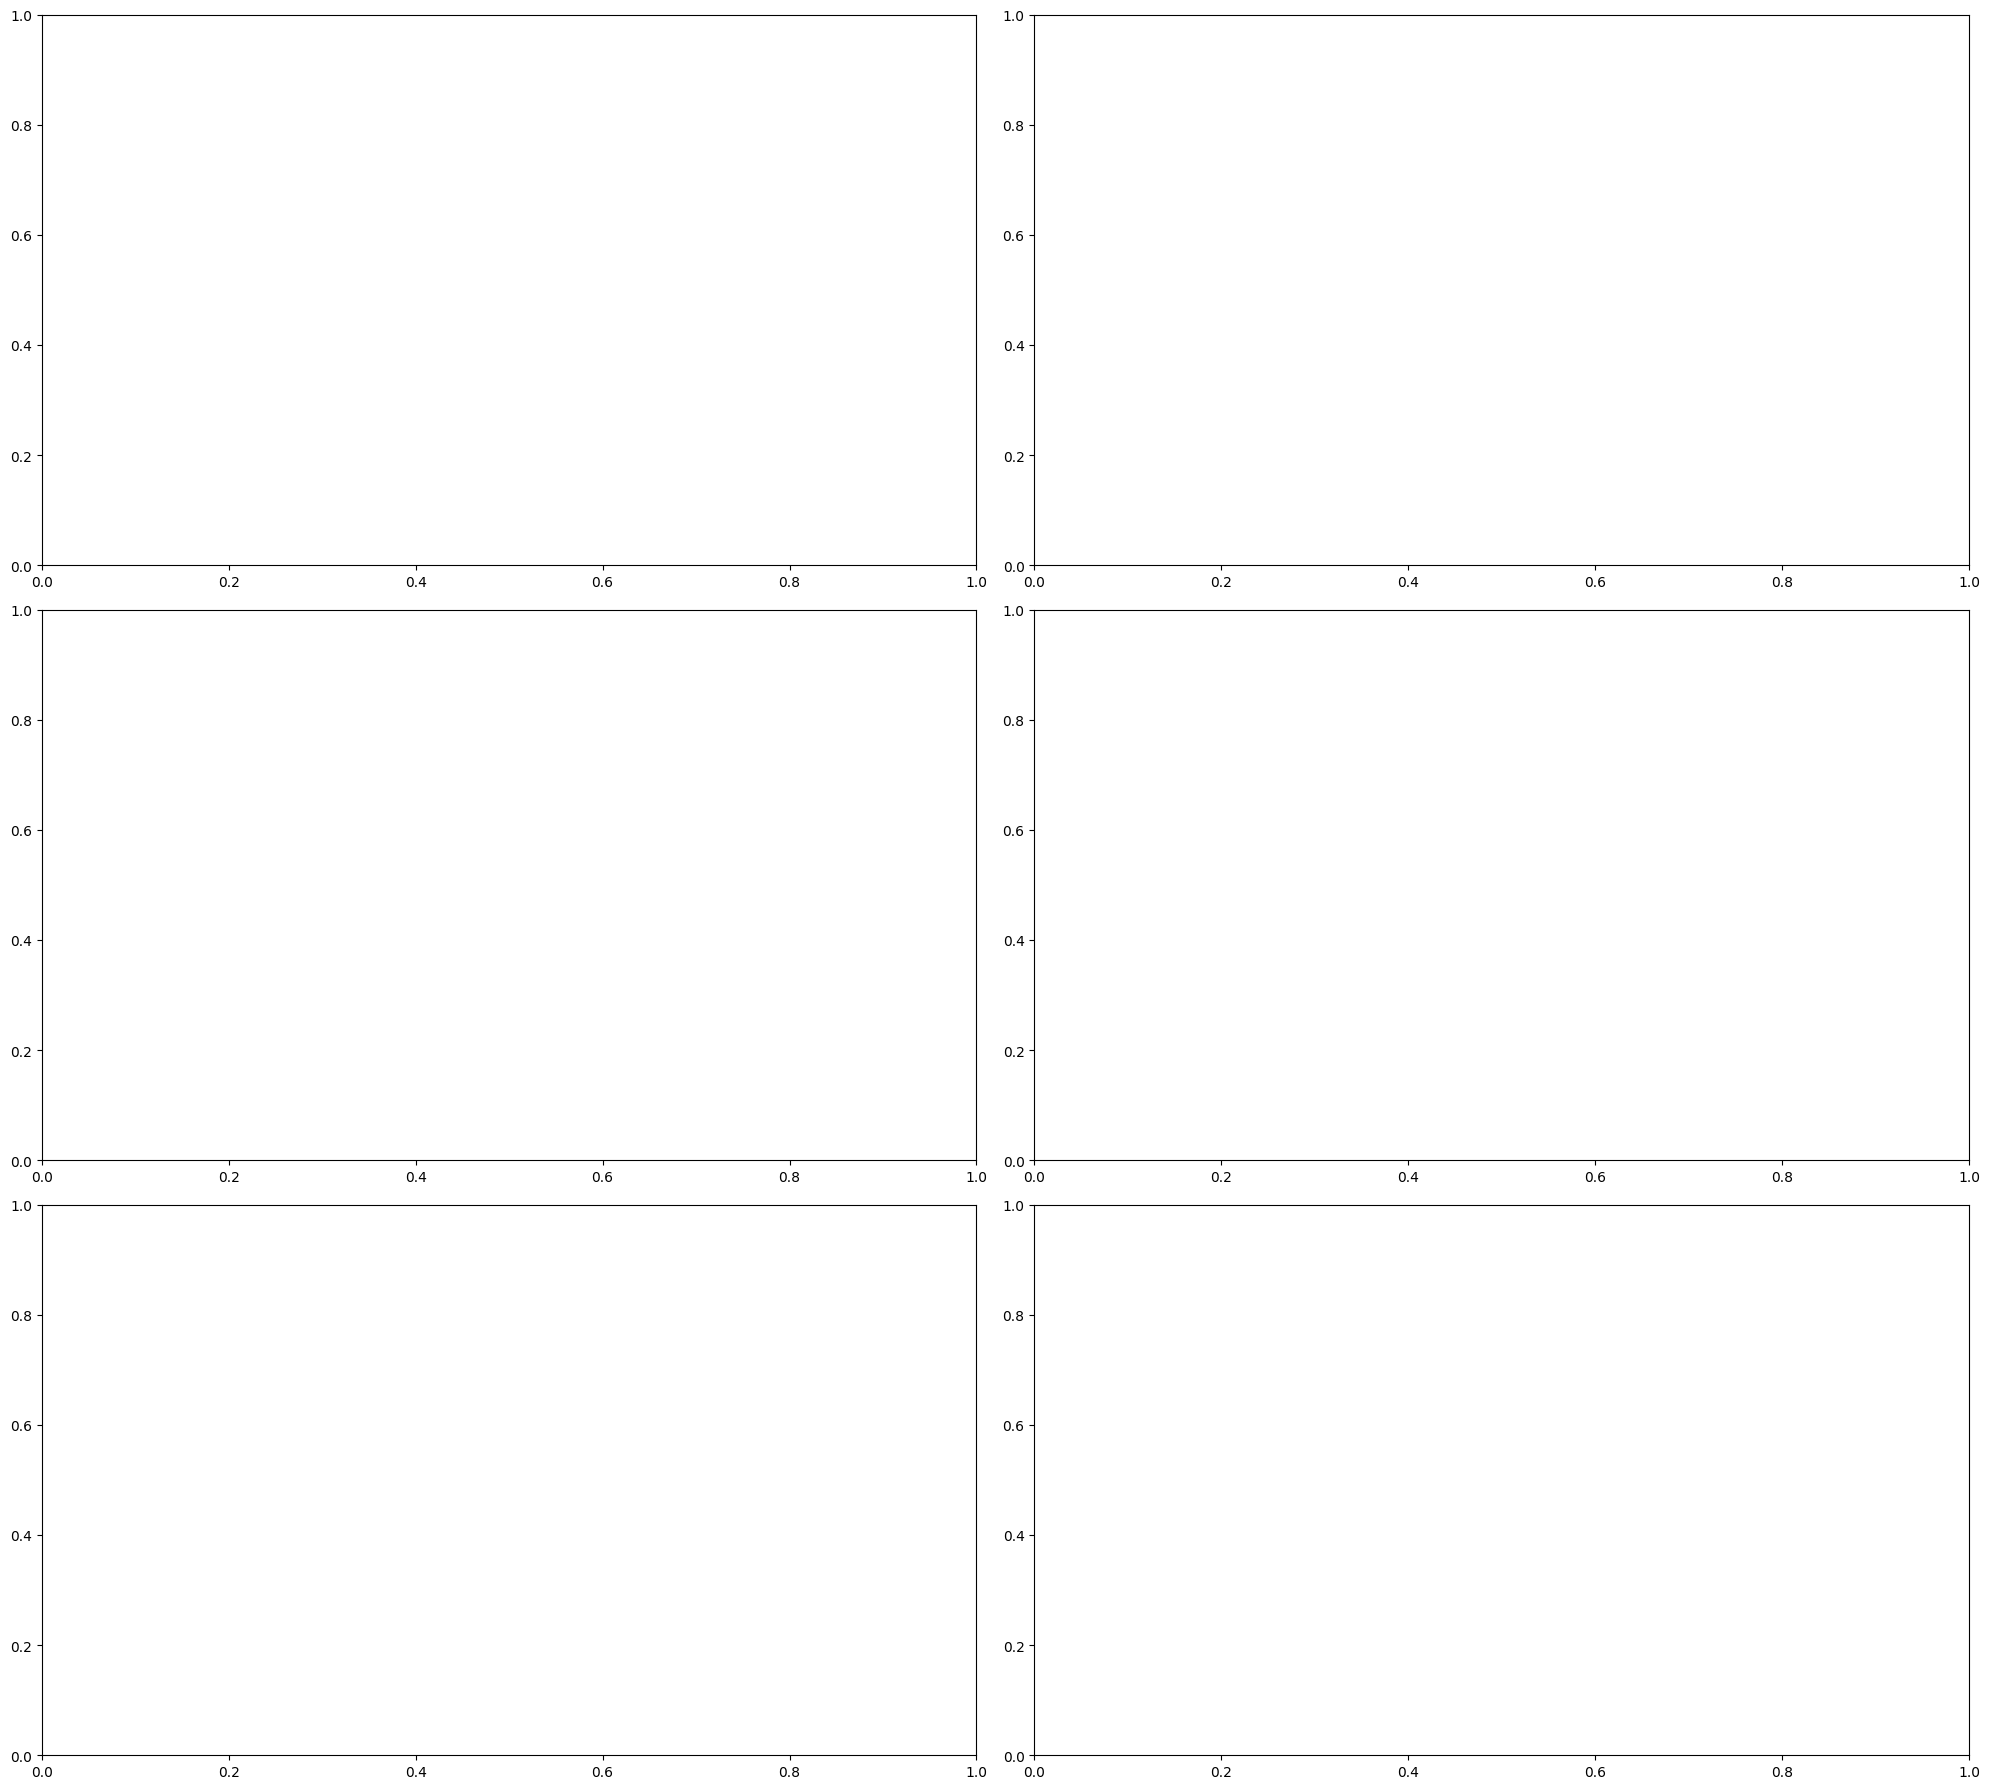

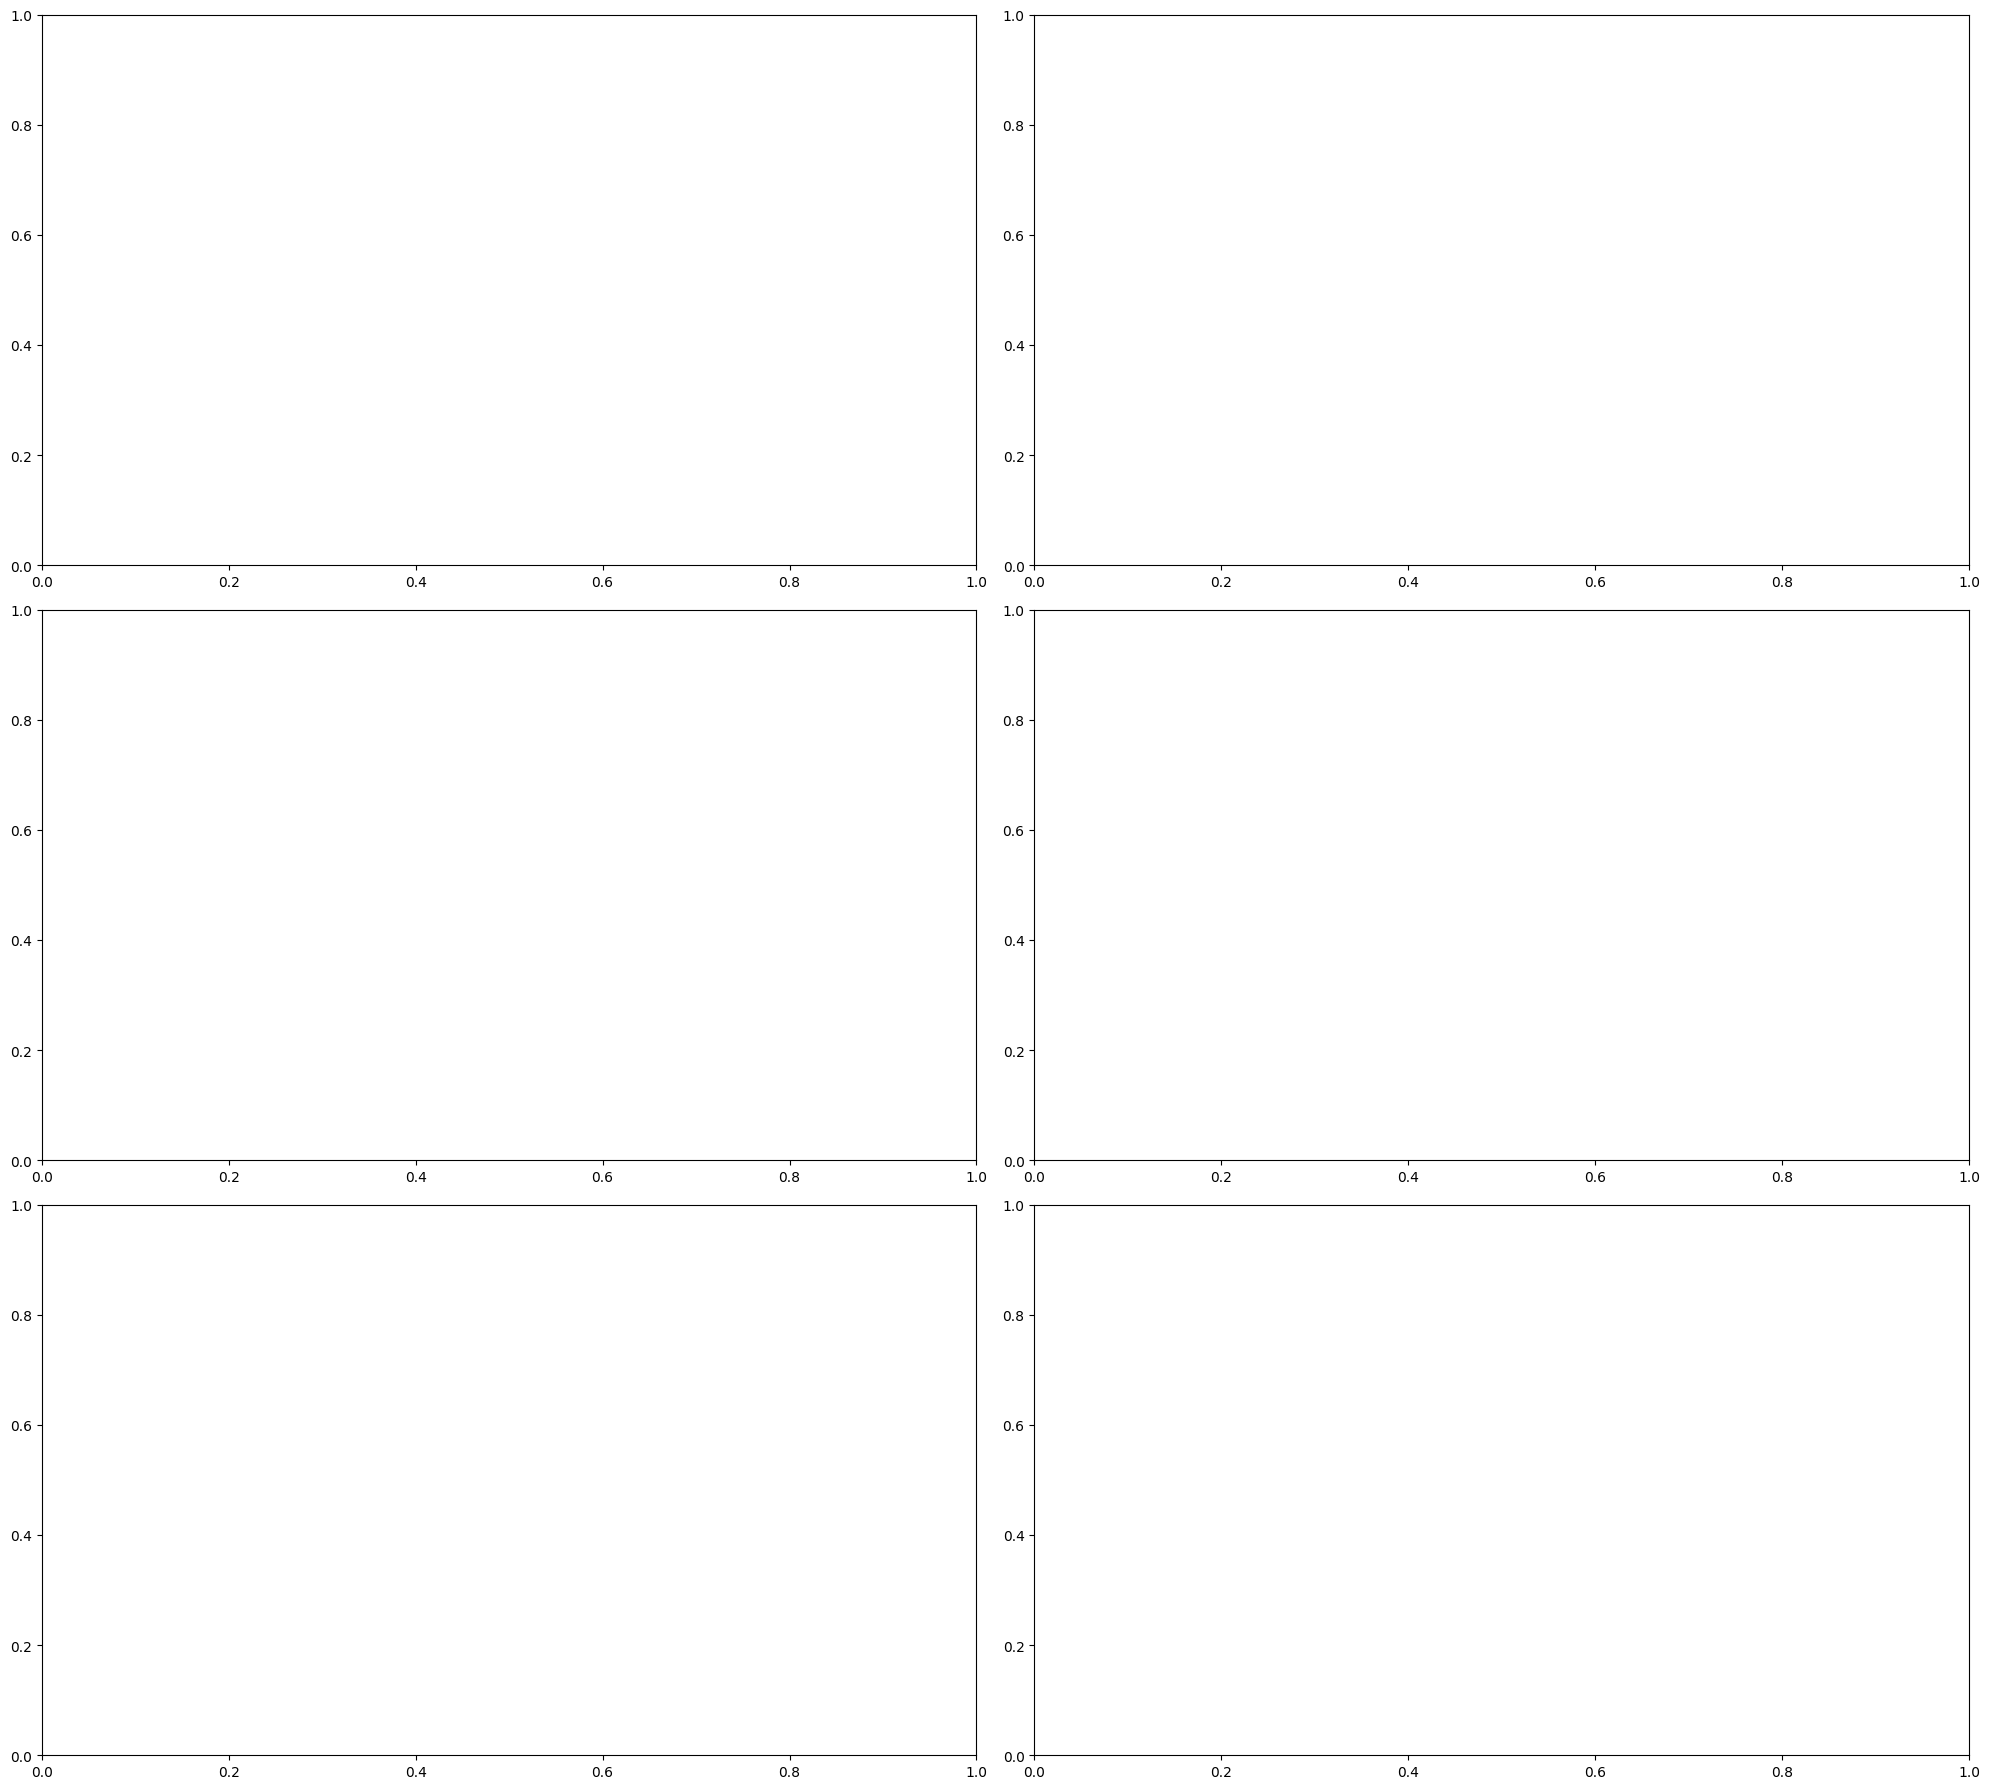

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming kk19_df is already loaded and contains the raw data

# Load data if not already loaded
if 'kk19_df' not in locals() and 'kk19_df' not in globals():
    # Create a sample dataframe
    data = {
        'Country': ['USA', 'Canada', 'Mexico', 'USA', 'Canada'],
        'Product': ['Electronics', 'Clothing', 'Electronics', 'Furniture', 'Clothing'],
        'Import_Export': ['Import', 'Export', 'Import', 'Export', 'Import'],
        'Quantity': [100, 200, 150, 50, 120],
        'Value': [1000.0, 2000.0, 1500.0, 500.0, 1200.0],
        'Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2024-01-01', '2024-02-01'],
        'Weight': [50.0, 100.0, 75.0, 25.0, 60.0]
    }
    kk19_df = pd.DataFrame(data)

# Check if 'Date' column exists; if not, add a placeholder column
if 'Date' not in kk19_df.columns:
    # Adding a placeholder 'Date' column for demonstration
    kk19_df['Date'] = pd.date_range(start='2023-01-01', periods=len(kk19_df), freq='M')

# 1. Data Preparation
# Convert 'Date' to datetime objects
kk19_df['Date'] = pd.to_datetime(kk19_df['Date'], format='%Y-%m-%d', errors='coerce')

# Extract year and month
kk19_df['Year'] = kk19_df['Date'].dt.year
kk19_df['Month'] = kk19_df['Date'].dt.month

# Proceed with the rest of the code (unchanged)

# Aggregate data by year
yearly_trends = kk19_df.groupby('Year').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()

# Aggregate data by month
monthly_trends = kk19_df.groupby('Month').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()

# Separate into imports and exports (yearly)
yearly_import_trends = kk19_df[kk19_df['Import_Export'] == 'Import'].groupby('Year').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()
yearly_export_trends = kk19_df[kk19_df['Import_Export'] == 'Export'].groupby('Year').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()

# Separate into imports and exports (monthly)
monthly_import_trends = kk19_df[kk19_df['Import_Export'] == 'Import'].groupby('Month').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()
monthly_export_trends = kk19_df[kk19_df['Import_Export'] == 'Export'].groupby('Month').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()


# 2. Trend Analysis (Simplified)
# Aggregate data by year
yearly_trends = kk19_df.groupby('Year').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()

# Aggregate data by month
monthly_trends = kk19_df.groupby('Month').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()

# Separate into imports and exports (yearly)
yearly_import_trends = kk19_df[kk19_df['Import_Export'] == 'Import'].groupby('Year').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()
yearly_export_trends = kk19_df[kk19_df['Import_Export'] == 'Export'].groupby('Year').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()

# Separate into imports and exports (monthly)
monthly_import_trends = kk19_df[kk19_df['Import_Export'] == 'Import'].groupby('Month').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()
monthly_export_trends = kk19_df[kk19_df['Import_Export'] == 'Export'].groupby('Month').agg({'Quantity': 'sum', 'Value': 'sum', 'Weight': 'sum'}).reset_index()

# 4. Simple Trend Extrapolation
def extrapolate_trend(df, value_column, future_months=12):
    """Extrapolates a linear trend into the future."""
    # Check if the dataframe is empty
    if df.empty:
        print(f"Warning: DataFrame for {value_column} is empty. Returning an empty DataFrame.")
        return pd.DataFrame()

    # Use index as a time feature
    time = np.arange(len(df)).reshape(-1, 1)
    values = df[value_column].values.reshape(-1, 1)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(time, values)

    # Generate future time points
    future_time = np.arange(len(df), len(df) + future_months).reshape(-1, 1)
    future_values = model.predict(future_time)

    # Create future dataframe
    future_df = pd.DataFrame({value_column: future_values.flatten()})

    # Combine
    combined_df = pd.concat([df, future_df], ignore_index=True)

    return combined_df

# Example of extrapolation to yearly_trends
yearly_trends_extrapolated_Quantity = extrapolate_trend(yearly_trends, 'Quantity')
yearly_trends_extrapolated_Value = extrapolate_trend(yearly_trends, 'Value')
yearly_trends_extrapolated_Weight = extrapolate_trend(yearly_trends, 'Weight')

yearly_import_trends_extrapolated_Quantity = extrapolate_trend(yearly_import_trends, 'Quantity')
yearly_import_trends_extrapolated_Value = extrapolate_trend(yearly_import_trends, 'Value')
yearly_import_trends_extrapolated_Weight = extrapolate_trend(yearly_import_trends, 'Weight')

yearly_export_trends_extrapolated_Quantity = extrapolate_trend(yearly_export_trends, 'Quantity')
yearly_export_trends_extrapolated_Value = extrapolate_trend(yearly_export_trends, 'Value')
yearly_export_trends_extrapolated_Weight = extrapolate_trend(yearly_export_trends, 'Weight')

# Example of extrapolation to monthly_trends
monthly_trends_extrapolated_Quantity = extrapolate_trend(monthly_trends, 'Quantity')
monthly_trends_extrapolated_Value = extrapolate_trend(monthly_trends, 'Value')
monthly_trends_extrapolated_Weight = extrapolate_trend(monthly_trends, 'Weight')

monthly_import_trends_extrapolated_Quantity = extrapolate_trend(monthly_import_trends, 'Quantity')
monthly_import_trends_extrapolated_Value = extrapolate_trend(monthly_import_trends, 'Value')
monthly_import_trends_extrapolated_Weight = extrapolate_trend(monthly_import_trends, 'Weight')

monthly_export_trends_extrapolated_Quantity = extrapolate_trend(monthly_export_trends, 'Quantity')
monthly_export_trends_extrapolated_Value = extrapolate_trend(monthly_export_trends, 'Value')
monthly_export_trends_extrapolated_Weight = extrapolate_trend(monthly_export_trends, 'Weight')

# 3. Visualization (Improved)
# 3.1 Overall Yearly Trends (with prediction)
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

if not yearly_trends_extrapolated_Quantity.empty:
  sns.lineplot(x='Year', y='Quantity', data=yearly_trends_extrapolated_Quantity, marker='o', ax=axes[0])
  axes[0].set_title('Overall Trend of Quantity Over Years')
  axes[0].set_xlabel('Year')
  axes[0].set_ylabel('Total Quantity')
if not yearly_trends_extrapolated_Value.empty:
  sns.lineplot(x='Year', y='Value', data=yearly_trends_extrapolated_Value, marker='o', ax=axes[1])
  axes[1].set_title('Overall Trend of Value Over Years')
  axes[1].set_xlabel('Year')
  axes[1].set_ylabel('Total Value')

if not yearly_trends_extrapolated_Weight.empty:
  sns.lineplot(x='Year', y='Weight', data=yearly_trends_extrapolated_Weight, marker='o', ax=axes[2])
  axes[2].set_title('Overall Trend of Weight Over Years')
  axes[2].set_xlabel('Year')
  axes[2].set_ylabel('Total Weight')

plt.tight_layout()
plt.show()

# 3.2 Overall Monthly Trends (with prediction)
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
if not monthly_trends_extrapolated_Quantity.empty:
  sns.lineplot(x='Month', y='Quantity', data=monthly_trends_extrapolated_Quantity, marker='o', ax=axes[0])
  axes[0].set_title('Overall Trend of Quantity Over Month')
  axes[0].set_xlabel('Month')
  axes[0].set_ylabel('Total Quantity')

if not monthly_trends_extrapolated_Value.empty:
  sns.lineplot(x='Month', y='Value', data=monthly_trends_extrapolated_Value, marker='o', ax=axes[1])
  axes[1].set_title('Overall Trend of Value Over Month')
  axes[1].set_xlabel('Month')
  axes[1].set_ylabel('Total Value')

if not monthly_trends_extrapolated_Weight.empty:
  sns.lineplot(x='Month', y='Weight', data=monthly_trends_extrapolated_Weight, marker='o', ax=axes[2])
  axes[2].set_title('Overall Trend of Weight Over Month')
  axes[2].set_xlabel('Month')
  axes[2].set_ylabel('Total Weight')

plt.tight_layout()
plt.show()

# 3.3 Import/Export Yearly Trends (with prediction)
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

if not yearly_import_trends_extrapolated_Quantity.empty:
  sns.lineplot(x='Year', y='Quantity', data=yearly_import_trends_extrapolated_Quantity, marker='o', ax=axes[0, 0])
  axes[0, 0].set_title('Import Trend of Quantity Over Years')
  axes[0, 0].set_xlabel('Year')
  axes[0, 0].set_ylabel('Total Quantity')

if not yearly_import_trends_extrapolated_Value.empty:
  sns.lineplot(x='Year', y='Value', data=yearly_import_trends_extrapolated_Value, marker='o', ax=axes[1, 0])
  axes[1, 0].set_title('Import Trend of Value Over Years')
  axes[1, 0].set_xlabel('Year')
  axes[1, 0].set_ylabel('Total Value')

if not yearly_import_trends_extrapolated_Weight.empty:
  sns.lineplot(x='Year', y='Weight', data=yearly_import_trends_extrapolated_Weight, marker='o', ax=axes[2, 0])
  axes[2, 0].set_title('Import Trend of Weight Over Years')
  axes[2, 0].set_xlabel('Year')
  axes[2, 0].set_ylabel('Total Weight')

if not yearly_export_trends_extrapolated_Quantity.empty:
  sns.lineplot(x='Year', y='Quantity', data=yearly_export_trends_extrapolated_Quantity, marker='o', ax=axes[0, 1])
  axes[0, 1].set_title('Export Trend of Quantity Over Years')
  axes[0, 1].set_xlabel('Year')
  axes[0, 1].set_ylabel('Total Quantity')

if not yearly_export_trends_extrapolated_Value.empty:
  sns.lineplot(x='Year', y='Value', data=yearly_export_trends_extrapolated_Value, marker='o', ax=axes[1, 1])
  axes[1, 1].set_title('Export Trend of Value Over Years')
  axes[1, 1].set_xlabel('Year')
  axes[1, 1].set_ylabel('Total Value')

if not yearly_export_trends_extrapolated_Weight.empty:
  sns.lineplot(x='Year', y='Weight', data=yearly_export_trends_extrapolated_Weight, marker='o', ax=axes[2, 1])
  axes[2, 1].set_title('Export Trend of Weight Over Years')
  axes[2, 1].set_xlabel('Year')
  axes[2, 1].set_ylabel('Total Weight')

plt.tight_layout()
plt.show()

# 3.4 Import/Export Monthly Trends (with prediction)
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

if not monthly_import_trends_extrapolated_Quantity.empty:
  sns.lineplot(x='Month', y='Quantity', data=monthly_import_trends_extrapolated_Quantity, marker='o', ax=axes[0, 0])
  axes[0, 0].set_title('Import Trend of Quantity Over Months')
  axes[0, 0].set_xlabel('Month')
  axes[0, 0].set_ylabel('Total Quantity')

if not monthly_import_trends_extrapolated_Value.empty:
  sns.lineplot(x='Month', y='Value', data=monthly_import_trends_extrapolated_Value, marker='o', ax=axes[1, 0])
  axes[1, 0].set_title('Import Trend of Value Over Months')
  axes[1, 0].set_xlabel('Month')
  axes[1, 0].set_ylabel('Total Value')

if not monthly_import_trends_extrapolated_Weight.empty:
  sns.lineplot(x='Month', y='Weight', data=monthly_import_trends_extrapolated_Weight, marker='o', ax=axes[2, 0])
  axes[2, 0].set_title('Import Trend of Weight Over Months')
  axes[2, 0].set_xlabel('Month')
  axes[2, 0].set_ylabel('Total Weight')
if not monthly_export_trends_extrapolated_Quantity.empty:
  sns.lineplot(x='Month', y='Quantity', data=monthly_export_trends_extrapolated_Quantity, marker='o', ax=axes[0, 1])
  axes[0, 1].set_title('Export Trend of Quantity Over Months')
  axes[0, 1].set_xlabel('Month')
  axes[0, 1].set_ylabel('Total Quantity')

if not monthly_export_trends_extrapolated_Value.empty:
  sns.lineplot(x='Month', y='Value', data=monthly_export_trends_extrapolated_Value, marker='o', ax=axes[1, 1])
  axes[1, 1].set_title('Export Trend of Value Over Months')
  axes[1, 1].set_xlabel('Month')
  axes[1, 1].set_ylabel('Total Value')
if not monthly_export_trends_extrapolated_Weight.empty:
  sns.lineplot(x='Month', y='Weight', data=monthly_export_trends_extrapolated_Weight, marker='o', ax=axes[2, 1])
  axes[2, 1].set_title('Export Trend of Weight Over Months')
  axes[2, 1].set_xlabel('Month')
  axes[2, 1].set_ylabel('Total Weight')

plt.tight_layout()
plt.show()




x---END OF THE PROJECT---x